In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import pandas as pd
import pickle
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import spacy
from datetime import datetime

In [3]:
phe_aff=pd.read_csv('/effectcrawl/ashwin/ashwin_all_phe_data_emot_mf_new.csv')
phe_aff['date']=phe_aff['str_date'].apply(pd.Timestamp)
phe_aff=phe_aff[phe_aff['date']<=pd.Timestamp('2021-01-20')]
phe_aff[phe_aff['text']=='RT @neil_bodie: COVID-19: ']

/tmp/ipykernel_3417895/1563853977.py:1: DtypeWarning: Columns (18,20,28,31,32,37,39,41,42,49,50,52,53,61,69,70,71,72,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  phe_aff=pd.read_csv('/effectcrawl/ashwin/ashwin_all_phe_data_emot_mf_new.csv')


Unnamed: 0              tweetid    userid screen_name       date lang  \
64753       64753  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
64754       64754  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
64755       64755  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
64756       64756  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
64757       64757  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
...           ...                  ...       ...         ...        ...  ...   
71200       71200  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
71201       71201  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
71202       71202  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
71203       71203  1257946447183523840  36406830      CIDRAP 2020-05-06   en   
71204       71204  1257946447183523840  36406830      CIDRAP 2020-05-06   en   

              location                                        description  \
64753  Minneapolis, MN  the Center for Infectious Disease Research and...   
64754  Minneapolis, MN  the Center for Infectious Disease Research and...   
64755  Minneapolis, MN  the Center for Infectious Disease Research and...   
64756  Minneapolis, MN  the Center for Infectious Disease Research and...   
64757  Minneapolis, MN  the Center for Infectious Disease Research and...   
...                ...                                                ...   
71200  Minneapolis, MN  the Center for Infectious Disease Research and...   
71201  Minneapolis, MN  the Center for Infectious Disease Research and...   
71202  Minneapolis, MN  the Center for Infectious Disease Research and...   
71203  Minneapolis, MN  the Center for Infectious Disease Research and...   
71204  Minneapolis, MN  the Center for Infectious Disease Research and...   

      place_id place_url  ...      care      harm  fairness  cheating  \
64753      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
64754      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
64755      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
64756      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
64757      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
...        ...       ...  ...       ...       ...       ...       ...   
71200      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
71201      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
71202      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
71203      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   
71204      NaN       NaN  ...  0.950191  0.006486  0.001465  0.000714   

        loyalty  betrayal authority subversion   purity  degradation  
64753  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
64754  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
64755  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
64756  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
64757  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
...         ...       ...       ...        ...      ...          ...  
71200  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
71201  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
71202  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
71203  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  
71204  0.011777  0.000554  0.000943   0.000777  0.00211      0.00024  

[6452 rows x 109 columns]

In [4]:
phe_aff=phe_aff[phe_aff['text']!='RT @neil_bodie: COVID-19: ']
phe_aff

Unnamed: 0              tweetid              userid     screen_name  \
0                0  1220201848495276032            77576779  the_etheropian   
1                1  1220595084309065728          2887865951    K_G_Andersen   
2                2  1220813573334716416            48110818        LizSzabo   
3                3  1221434570714669056          2426189960      T_Inglesby   
4                4  1221455737714565120           299273962  Laurie_Garrett   
...            ...                  ...                 ...             ...   
364470      364470  1352042370074775552            76780096         IHME_UW   
364471      364471  1352042660828221440           191100226     ahandvanish   
364472      364472  1352043061031755776            19087651       DemFromCT   
364473      364473  1352043090396196864            46557945   StevenTDennis   
364474      364474  1352043123451559936  732787392722182144    DelthiaRicks   

             date lang                     location  \
0      2020-01-23   en  DMV→London→Freetown→Chicago   
1      2020-01-24   en                 La Jolla, CA   
2      2020-01-24   en             Washington, D.C.   
3      2020-01-26   en                Baltimore, MD   
4      2020-01-26   en                 New York, NY   
...           ...  ...                          ...   
364470 2021-01-20   en          Seattle, Washington   
364471 2021-01-20   en                          NaN   
364472 2021-01-20   en                  Newtown, CT   
364473 2021-01-20   en               Washington, DC   
364474 2021-01-20   en                     New York   

                                              description place_id place_url  \
0       Work: @HAI_Kovler Child Trauma Center • Resear...      NaN       NaN   
1       Infectious diseases & genomics. Immunologist i...      NaN       NaN   
2       Senior correspondent/enterprise reporter at Ka...      NaN       NaN   
3       Director, Johns Hopkins SPH Center for Health ...      NaN       NaN   
4       Former Sr Fellow @CFR_org. Recipient of Pulitz...      NaN       NaN   
...                                                   ...      ...       ...   
364470  We are a research center at @UW quantifying gl...      NaN       NaN   
364471  Research, generative music, anti-bias in machi...      NaN       NaN   
364472  Contributing editor, Daily Kos. I'm a recently...      NaN       NaN   
364473  @Bloomberg Senate reporter. Previously covered...      NaN       NaN   
364474  Award-winning science writer. Author. Citizen ...      NaN       NaN   

        ...      care      harm  fairness  cheating   loyalty  betrayal  \
0       ...  0.989410  0.002080  0.002198  0.000327  0.001143  0.000168   
1       ...  0.020077  0.050085  0.000747  0.002267  0.001522  0.000740   
2       ...  0.000224  0.991791  0.000094  0.000739  0.000221  0.000726   
3       ...  0.001917  0.001002  0.000333  0.000727  0.004445  0.001011   
4       ...  0.000288  0.000425  0.000151  0.000758  0.000219  0.000104   
...     ...       ...       ...       ...       ...       ...       ...   
364470  ...  0.000369  0.990152  0.000141  0.000452  0.000323  0.000717   
364471  ...  0.006250  0.604732  0.000540  0.001554  0.001473  0.000981   
364472  ...  0.557977  0.000258  0.002470  0.000067  0.008419  0.000294   
364473  ...  0.080800  0.011837  0.054501  0.000096  0.005339  0.000421   
364474  ...  0.001583  0.004850  0.000259  0.000460  0.000763  0.000176   

       authority subversion    purity  degradation  
0       0.000561   0.000115  0.001290     0.000194  
1       0.000291   0.002176  0.001905     0.001191  
2       0.000026   0.000805  0.000072     0.000406  
3       0.000271   0.000609  0.001717     0.000335  
4       0.000081   0.000111  0.000210     0.000167  
...          ...        ...       ...          ...  
364470  0.000034   0.001209  0.000105     0.000455  
364471  0.000150   0.001609  0.000878     0.001278  
364472  0.964613   0.000215  0.002513     0.000102  
364473

In [5]:
ignore=['chelseaclinton',
'govlarryhogan',
'johncornyn',
 'joncoopertweets',
 'mike_pence',
 'natesilver538',
 'realdonaldtrump',
 'repandybiggsaz',
 'repmarkmeadows',
 'repthomasmassie',
 'ronaldklain',
 'senronjohnson']

In [6]:
phe_users=pd.read_csv('phe_users.csv')
phe_users=phe_users[~phe_users['screen_name'].str.lower().isin(ignore)]
pseudo_users=pd.read_csv('pseudo_users.csv')
pseudo_users=pseudo_users[~pseudo_users['screen_name'].str.lower().isin(ignore)]
phe_users.to_csv('phe_users.csv',index=False)
pseudo_users.to_csv('pseudo_users.csv',index=False)

In [7]:
phe_users=phe_users['screen_name'].tolist()
pseudo_users=pseudo_users['screen_name'].tolist()

In [8]:
len(phe_users),len(pseudo_users)

(485, 350)

In [9]:
# phe=pd.DataFrame(columns=['screen_name'],data=phe_users)
# phe.to_csv('phe_users.csv',index=False)

In [10]:
# phe_users=pd.read_csv('phe_users_clean.csv')
# phe_users=phe_users[phe_users['Unnamed: 1']!=1]['screen_name'].tolist()

In [11]:
phe_aff=phe_aff[phe_aff['screen_name'].isin(phe_users)]
phe_aff

Unnamed: 0              tweetid              userid     screen_name  \
0                0  1220201848495276032            77576779  the_etheropian   
1                1  1220595084309065728          2887865951    K_G_Andersen   
2                2  1220813573334716416            48110818        LizSzabo   
3                3  1221434570714669056          2426189960      T_Inglesby   
4                4  1221455737714565120           299273962  Laurie_Garrett   
...            ...                  ...                 ...             ...   
364470      364470  1352042370074775552            76780096         IHME_UW   
364471      364471  1352042660828221440           191100226     ahandvanish   
364472      364472  1352043061031755776            19087651       DemFromCT   
364473      364473  1352043090396196864            46557945   StevenTDennis   
364474      364474  1352043123451559936  732787392722182144    DelthiaRicks   

             date lang                     location  \
0      2020-01-23   en  DMV→London→Freetown→Chicago   
1      2020-01-24   en                 La Jolla, CA   
2      2020-01-24   en             Washington, D.C.   
3      2020-01-26   en                Baltimore, MD   
4      2020-01-26   en                 New York, NY   
...           ...  ...                          ...   
364470 2021-01-20   en          Seattle, Washington   
364471 2021-01-20   en                          NaN   
364472 2021-01-20   en                  Newtown, CT   
364473 2021-01-20   en               Washington, DC   
364474 2021-01-20   en                     New York   

                                              description place_id place_url  \
0       Work: @HAI_Kovler Child Trauma Center • Resear...      NaN       NaN   
1       Infectious diseases & genomics. Immunologist i...      NaN       NaN   
2       Senior correspondent/enterprise reporter at Ka...      NaN       NaN   
3       Director, Johns Hopkins SPH Center for Health ...      NaN       NaN   
4       Former Sr Fellow @CFR_org. Recipient of Pulitz...      NaN       NaN   
...                                                   ...      ...       ...   
364470  We are a research center at @UW quantifying gl...      NaN       NaN   
364471  Research, generative music, anti-bias in machi...      NaN       NaN   
364472  Contributing editor, Daily Kos. I'm a recently...      NaN       NaN   
364473  @Bloomberg Senate reporter. Previously covered...      NaN       NaN   
364474  Award-winning science writer. Author. Citizen ...      NaN       NaN   

        ...      care      harm  fairness  cheating   loyalty  betrayal  \
0       ...  0.989410  0.002080  0.002198  0.000327  0.001143  0.000168   
1       ...  0.020077  0.050085  0.000747  0.002267  0.001522  0.000740   
2       ...  0.000224  0.991791  0.000094  0.000739  0.000221  0.000726   
3       ...  0.001917  0.001002  0.000333  0.000727  0.004445  0.001011   
4       ...  0.000288  0.000425  0.000151  0.000758  0.000219  0.000104   
...     ...       ...       ...       ...       ...       ...       ...   
364470  ...  0.000369  0.990152  0.000141  0.000452  0.000323  0.000717   
364471  ...  0.006250  0.604732  0.000540  0.001554  0.001473  0.000981   
364472  ...  0.557977  0.000258  0.002470  0.000067  0.008419  0.000294   
364473  ...  0.080800  0.011837  0.054501  0.000096  0.005339  0.000421   
364474  ...  0.001583  0.004850  0.000259  0.000460  0.000763  0.000176   

       authority subversion    purity  degradation  
0       0.000561   0.000115  0.001290     0.000194  
1       0.000291   0.002176  0.001905     0.001191  
2       0.000026   0.000805  0.000072     0.000406  
3       0.000271   0.000609  0.001717     0.000335  
4       0.000081   0.000111  0.000210     0.000167  
...          ...        ...       ...          ...  
364470  0.000034   0.001209  0.000105     0.000455  
364471  0.000150   0.001609  0.000878     0.001278  
364472  0.964613   0.000215  0.002513     0.000102  
364473

In [12]:
master_list=['education',
 'healthcare',
 'lockdowns',
 'masking',
 'origins',
 'therapeutics',
 'vaccines']

nlp = spacy.load('en_core_web_md',disable=['ner','parser'])

def lemmatize(words):
    doc=nlp(words,disable=['parser','ner'])
    return ' '.join([tok.lemma_ for tok in doc])


cpath='/nas/home/ashreyas/ashwin/Coronavirus/Domain-Analysis/Covid_Concerns/Final_Keywords'
cfiles=os.listdir(cpath)
concerns={}
for file in cfiles:
    name=file.split('.csv')[0]
    words=pd.read_csv(os.path.join(cpath,file))['words'].tolist()
    words=[lemmatize(word) for word in words]
    concerns[name]=words

concerns['lockdowns'].extend(['stopthespread','distancing','stayhome'])
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

def check_concern(tweet):
    c_list=[]
    for c in concerns:
        words=concerns[c]
        tweet_words=tweet.split()
        res=[]
        for t in tweet_words:
            for w in words:
                if t.startswith(w):
                    res.append(w)
        if len(res)>0:
            c_list.append(c)
    return c_list

import re
irrelevant_chars="~?!./\:;+=&^%$@(,)[]_*"
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

from string import digits
def deep_clean(x):
    x=x.lower()
    x=re.sub(r'http\S+', '', x)
    remove_digits = str.maketrans(' ', ' ', digits)
    remove_chars = str.maketrans(' ', ' ', irrelevant_chars)
    x = x.translate(remove_digits)
    x = x.translate(remove_chars)
    x = emoji_pattern.sub(r'', x)
    return check_concern(x)

tqdm.pandas()
phe_aff['concerns_new']=phe_aff['text'].progress_apply(deep_clean)

concerns=['origins','lockdowns','masking','healthcare','education','therapeutics','vaccines']
def mapper(li,concern):
    if concern in li:
        return 1
    return 0

for c in concerns:
    phe_aff[c]=phe_aff['concerns_new'].apply(mapper,args=(c,))
phe_aff

100%|██████████████████████████████████| 330209/330209 [06:11<00:00, 888.99it/s]
/tmp/ipykernel_3417895/656409488.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['concerns_new']=phe_aff['text'].progress_apply(deep_clean)
/tmp/ipykernel_3417895/656409488.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff[c]=phe_aff['concerns_new'].apply(mapper,args=(c,))


Unnamed: 0              tweetid              userid     screen_name  \
0                0  1220201848495276032            77576779  the_etheropian   
1                1  1220595084309065728          2887865951    K_G_Andersen   
2                2  1220813573334716416            48110818        LizSzabo   
3                3  1221434570714669056          2426189960      T_Inglesby   
4                4  1221455737714565120           299273962  Laurie_Garrett   
...            ...                  ...                 ...             ...   
364470      364470  1352042370074775552            76780096         IHME_UW   
364471      364471  1352042660828221440           191100226     ahandvanish   
364472      364472  1352043061031755776            19087651       DemFromCT   
364473      364473  1352043090396196864            46557945   StevenTDennis   
364474      364474  1352043123451559936  732787392722182144    DelthiaRicks   

             date lang                     location  \
0      2020-01-23   en  DMV→London→Freetown→Chicago   
1      2020-01-24   en                 La Jolla, CA   
2      2020-01-24   en             Washington, D.C.   
3      2020-01-26   en                Baltimore, MD   
4      2020-01-26   en                 New York, NY   
...           ...  ...                          ...   
364470 2021-01-20   en          Seattle, Washington   
364471 2021-01-20   en                          NaN   
364472 2021-01-20   en                  Newtown, CT   
364473 2021-01-20   en               Washington, DC   
364474 2021-01-20   en                     New York   

                                              description place_id place_url  \
0       Work: @HAI_Kovler Child Trauma Center • Resear...      NaN       NaN   
1       Infectious diseases & genomics. Immunologist i...      NaN       NaN   
2       Senior correspondent/enterprise reporter at Ka...      NaN       NaN   
3       Director, Johns Hopkins SPH Center for Health ...      NaN       NaN   
4       Former Sr Fellow @CFR_org. Recipient of Pulitz...      NaN       NaN   
...                                                   ...      ...       ...   
364470  We are a research center at @UW quantifying gl...      NaN       NaN   
364471  Research, generative music, anti-bias in machi...      NaN       NaN   
364472  Contributing editor, Daily Kos. I'm a recently...      NaN       NaN   
364473  @Bloomberg Senate reporter. Previously covered...      NaN       NaN   
364474  Award-winning science writer. Author. Citizen ...      NaN       NaN   

        ...      care      harm  fairness  cheating   loyalty  betrayal  \
0       ...  0.989410  0.002080  0.002198  0.000327  0.001143  0.000168   
1       ...  0.020077  0.050085  0.000747  0.002267  0.001522  0.000740   
2       ...  0.000224  0.991791  0.000094  0.000739  0.000221  0.000726   
3       ...  0.001917  0.001002  0.000333  0.000727  0.004445  0.001011   
4       ...  0.000288  0.000425  0.000151  0.000758  0.000219  0.000104   
...     ...       ...       ...       ...       ...       ...       ...   
364470  ...  0.000369  0.990152  0.000141  0.000452  0.000323  0.000717   
364471  ...  0.006250  0.604732  0.000540  0.001554  0.001473  0.000981   
364472  ...  0.557977  0.000258  0.002470  0.000067  0.008419  0.000294   
364473  ...  0.080800  0.011837  0.054501  0.000096  0.005339  0.000421   
364474  ...  0.001583  0.004850  0.000259  0.000460  0.000763  0.000176   

       authority subversion    purity  degradation  
0       0.000561   0.000115  0.001290     0.000194  
1       0.000291   0.002176  0.001905     0.001191  
2       0.000026   0.000805  0.000072     0.000406  
3       0.000271   0.000609  0.001717     0.000335  
4       0.000081   0.000111  0.000210     0.000167  
...          ...        ...       ...          ...  
364470  0.000034   0.001209  0.000105     0.000455  
364471  0.000150   0.001609  0.000878     0.001278  
364472  0.964613   0.000215  0.002513     0.000102  
364473

In [13]:
concerns=['origins','lockdowns','masking','healthcare','education','therapeutics','vaccines']
for c in concerns:
    print(c,phe_aff[c].mean())

origins 0.011659282454445518
lockdowns 0.06504365417054048
masking 0.07479202565647818
healthcare 0.15426896299010626
education 0.09585444370080767
therapeutics 0.00718332934595968
vaccines 0.12164719919808364


In [14]:
concerns=['origins','lockdowns','masking','healthcare','education','therapeutics','vaccines']
for c in concerns:
    print(c,phe_aff[c].mean())

origins 0.011659282454445518
lockdowns 0.06504365417054048
masking 0.07479202565647818
healthcare 0.15426896299010626
education 0.09585444370080767
therapeutics 0.00718332934595968
vaccines 0.12164719919808364


In [15]:
day_mean=phe_aff[['str_date']+concerns]
day_mean=day_mean.groupby('str_date').mean().reset_index()
day_mean

str_date   origins  lockdowns   masking  healthcare  education  \
0    2020-01-21  0.000000   0.000000  0.000000    0.000000   0.000000   
1    2020-01-22  0.006993   0.000000  0.000000    0.048951   0.034965   
2    2020-01-23  0.021978   0.063736  0.000000    0.070330   0.050549   
3    2020-01-24  0.027972   0.041958  0.008159    0.107226   0.047786   
4    2020-01-25  0.014684   0.020558  0.017621    0.151248   0.017621   
..          ...       ...        ...       ...         ...        ...   
360  2021-01-16  0.020000   0.050526  0.088421    0.121053   0.083158   
361  2021-01-17  0.013382   0.032847  0.087591    0.214112   0.062044   
362  2021-01-18  0.005612   0.054994  0.063973    0.157127   0.093154   
363  2021-01-19  0.016432   0.028951  0.039906    0.117371   0.073552   
364  2021-01-20  0.014786   0.041245  0.090272    0.106615   0.075486   

     therapeutics  vaccines  
0        0.000000  0.000000  
1        0.000000  0.020979  
2        0.000000  0.037363  
3        0.000000  0.010490  
4        0.000000  0.010279  
..            ...       ...  
360      0.006316  0.312632  
361      0.002433  0.313869  
362      0.001122  0.288440  
363      0.002347  0.261346  
364      0.001556  0.286381  

[365 rows x 8 columns]

In [16]:
for c in concerns:
    print(c,day_mean[c].median())

origins 0.0111731843575419
lockdowns 0.06486486486486487
masking 0.06382978723404255
healthcare 0.15158924205378974
education 0.08242753623188406
therapeutics 0.004608294930875576
vaccines 0.052587646076794656


In [17]:
day_mean['date']=day_mean['str_date'].apply(pd.Timestamp)

In [18]:
def smooth(x):
    return x.rolling(window=7).mean()

In [19]:
order=['vaccines','healthcare','masking','education','lockdowns','therapeutics','origins']

In [20]:
colors=['steelblue','#d24e01','#0B6623','red','purple','gold','#C0C0C0']
color_dict={} 
ct=0
for c in order:
    color_dict[c]=colors[ct]
    ct+=1

/tmp/ipykernel_3417895/3695495375.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


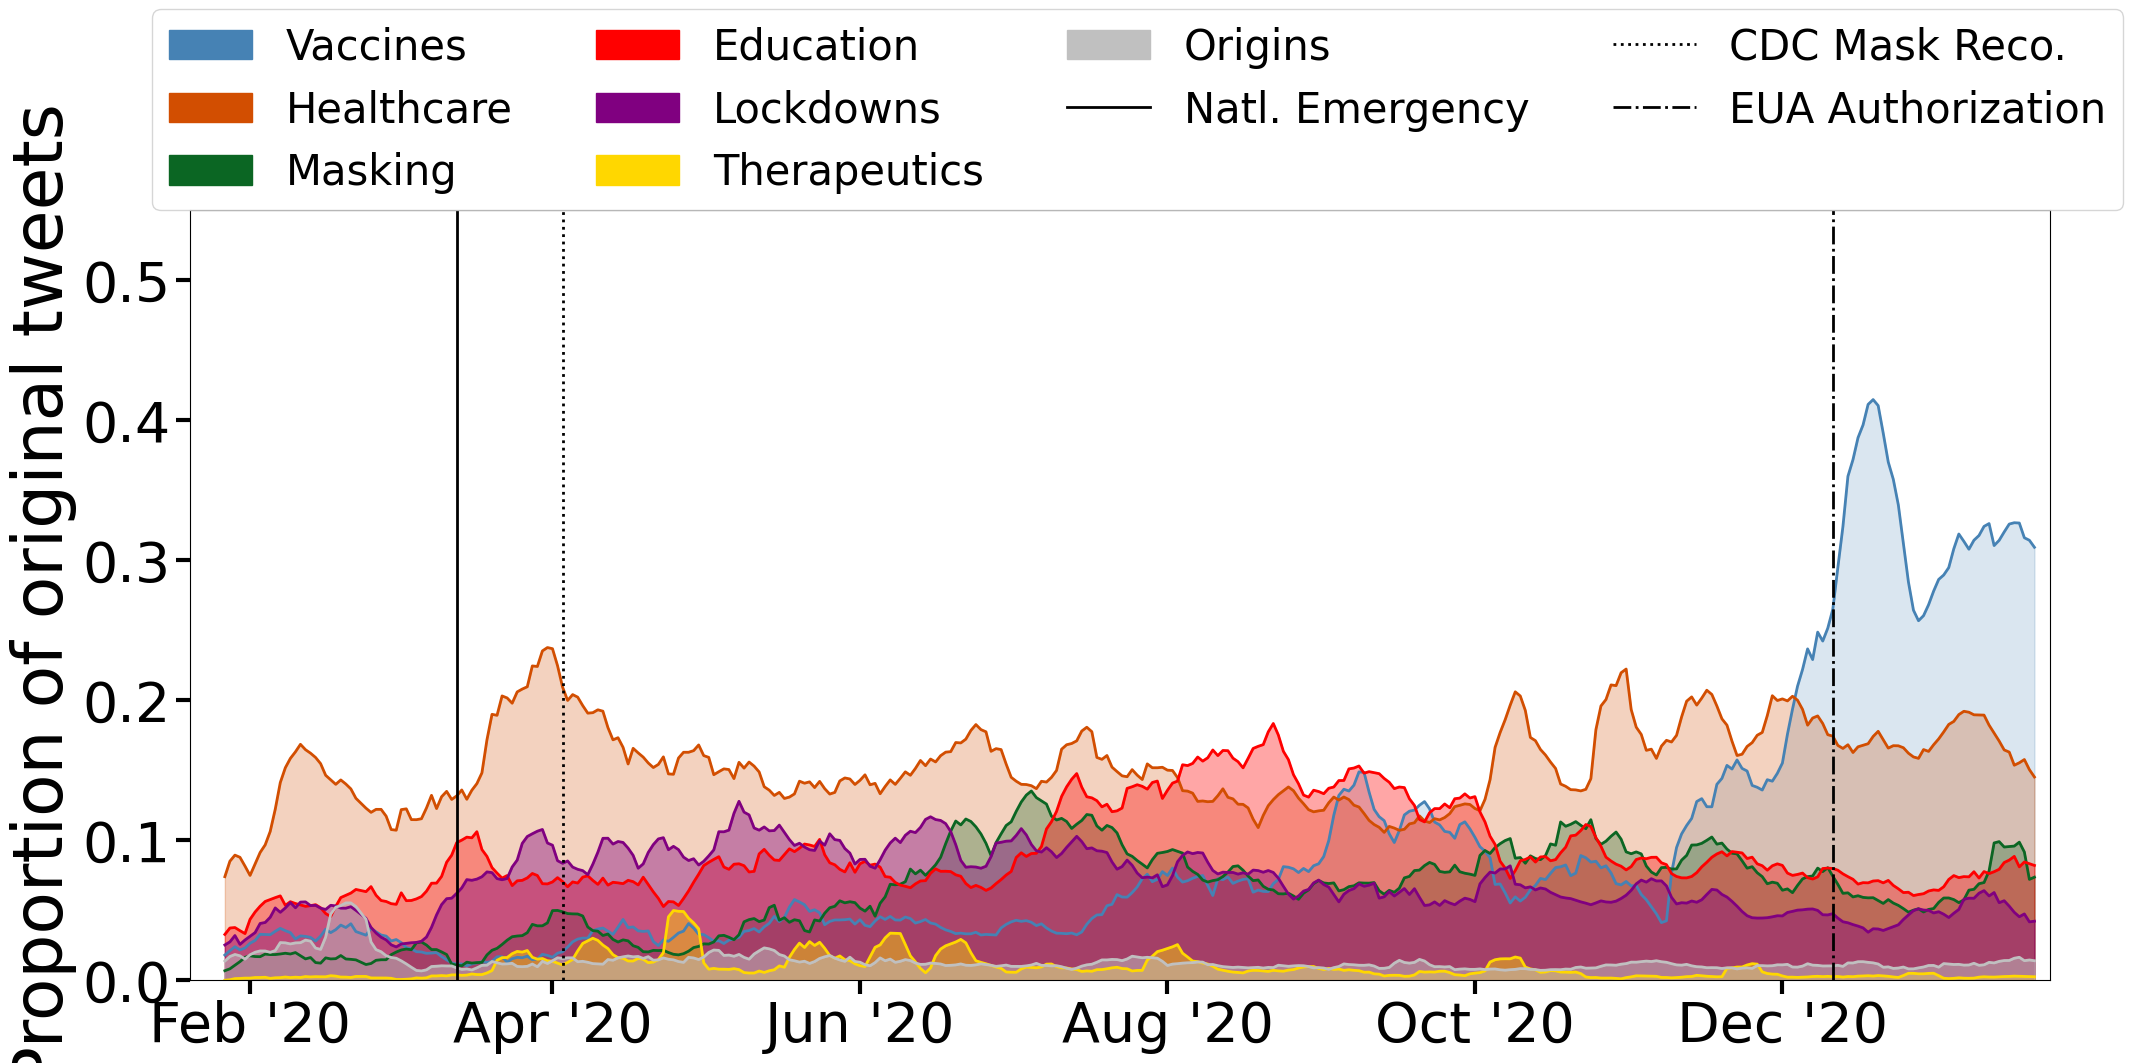

In [21]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.2
for c in order:
    plt.plot(day_mean['date'],smooth(day_mean[c]),color=color_dict[c],lw=2)
    plt.fill_between(day_mean['date'],smooth(day_mean[c]),alpha=ct,label=c.capitalize(),color=color_dict[c])
    ct+=0.05
plt.axvline(datetime.strptime('2020-03-13','%Y-%m-%d'),ymin=0,color='black',linewidth=2,linestyle='solid',label='Natl. Emergency')
plt.axvline(datetime.strptime('2020-04-03','%Y-%m-%d'),ymin=0,color='black',linewidth=2,linestyle='dotted',label='CDC Mask Reco.')
plt.axvline(datetime.strptime('2020-12-11','%Y-%m-%d'),ymin=0,color='black',linewidth=2,linestyle='dashdot',label='EUA Authorization')
#plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='black',linewidth=2,linestyle='dashed',label='WSJ Report')
#plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0.05,color='black',linewidth=2,linestyle='dashed',label='Cut School Funds',dashes=(5, 10))
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(-0.02,1),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=50)
#plt.savefig('/effectcrawl/ashwin/phe_concern_activity.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Emotions and Moral Foundations - PHE

In [22]:
phe_aff

Unnamed: 0              tweetid              userid     screen_name  \
0                0  1220201848495276032            77576779  the_etheropian   
1                1  1220595084309065728          2887865951    K_G_Andersen   
2                2  1220813573334716416            48110818        LizSzabo   
3                3  1221434570714669056          2426189960      T_Inglesby   
4                4  1221455737714565120           299273962  Laurie_Garrett   
...            ...                  ...                 ...             ...   
364470      364470  1352042370074775552            76780096         IHME_UW   
364471      364471  1352042660828221440           191100226     ahandvanish   
364472      364472  1352043061031755776            19087651       DemFromCT   
364473      364473  1352043090396196864            46557945   StevenTDennis   
364474      364474  1352043123451559936  732787392722182144    DelthiaRicks   

             date lang                     location  \
0      2020-01-23   en  DMV→London→Freetown→Chicago   
1      2020-01-24   en                 La Jolla, CA   
2      2020-01-24   en             Washington, D.C.   
3      2020-01-26   en                Baltimore, MD   
4      2020-01-26   en                 New York, NY   
...           ...  ...                          ...   
364470 2021-01-20   en          Seattle, Washington   
364471 2021-01-20   en                          NaN   
364472 2021-01-20   en                  Newtown, CT   
364473 2021-01-20   en               Washington, DC   
364474 2021-01-20   en                     New York   

                                              description place_id place_url  \
0       Work: @HAI_Kovler Child Trauma Center • Resear...      NaN       NaN   
1       Infectious diseases & genomics. Immunologist i...      NaN       NaN   
2       Senior correspondent/enterprise reporter at Ka...      NaN       NaN   
3       Director, Johns Hopkins SPH Center for Health ...      NaN       NaN   
4       Former Sr Fellow @CFR_org. Recipient of Pulitz...      NaN       NaN   
...                                                   ...      ...       ...   
364470  We are a research center at @UW quantifying gl...      NaN       NaN   
364471  Research, generative music, anti-bias in machi...      NaN       NaN   
364472  Contributing editor, Daily Kos. I'm a recently...      NaN       NaN   
364473  @Bloomberg Senate reporter. Previously covered...      NaN       NaN   
364474  Award-winning science writer. Author. Citizen ...      NaN       NaN   

        ...      care      harm  fairness  cheating   loyalty  betrayal  \
0       ...  0.989410  0.002080  0.002198  0.000327  0.001143  0.000168   
1       ...  0.020077  0.050085  0.000747  0.002267  0.001522  0.000740   
2       ...  0.000224  0.991791  0.000094  0.000739  0.000221  0.000726   
3       ...  0.001917  0.001002  0.000333  0.000727  0.004445  0.001011   
4       ...  0.000288  0.000425  0.000151  0.000758  0.000219  0.000104   
...     ...       ...       ...       ...       ...       ...       ...   
364470  ...  0.000369  0.990152  0.000141  0.000452  0.000323  0.000717   
364471  ...  0.006250  0.604732  0.000540  0.001554  0.001473  0.000981   
364472  ...  0.557977  0.000258  0.002470  0.000067  0.008419  0.000294   
364473  ...  0.080800  0.011837  0.054501  0.000096  0.005339  0.000421   
364474  ...  0.001583  0.004850  0.000259  0.000460  0.000763  0.000176   

       authority subversion    purity  degradation  
0       0.000561   0.000115  0.001290     0.000194  
1       0.000291   0.002176  0.001905     0.001191  
2       0.000026   0.000805  0.000072     0.000406  
3       0.000271   0.000609  0.001717     0.000335  
4       0.000081   0.000111  0.000210     0.000167  
...          ...        ...       ...          ...  
364470  0.000034   0.001209  0.000105     0.000455  
364471  0.000150   0.001609  0.000878     0.001278  
364472  0.964613   0.000215  0.002513     0.000102  
364473

In [23]:
emotions=['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness']

mfts=['care',
 'harm',
 'fairness',
 'cheating',
 'loyalty',
 'betrayal',
 'authority',
 'subversion',
 'purity',
 'degradation']

In [24]:
def binner(x):
    if x>0.5:
        return 1
    return 0

In [25]:
for x in emotions+mfts:
    phe_aff[x]=phe_aff[x].apply(binner)

/tmp/ipykernel_3417895/3672707195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff[x]=phe_aff[x].apply(binner)


In [26]:
def smooth(x):
    return x.rolling(window=7).mean()

In [27]:
phe_aff_day=phe_aff[['str_date']+emotions+mfts].groupby('str_date').mean().reset_index()

In [28]:
phe_aff_day['date']=phe_aff_day['str_date'].apply(pd.Timestamp)

In [29]:
positive_emo=['anticipation',
 'joy',
 'love',
 'optimism']

In [30]:
color_dict={
    'anticipation':'#2E3F53',
    'optimism':'#EED9C4',
    'joy':'orange',
    'love':'#FF69B4'
}

/tmp/ipykernel_3417895/2260775056.py:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


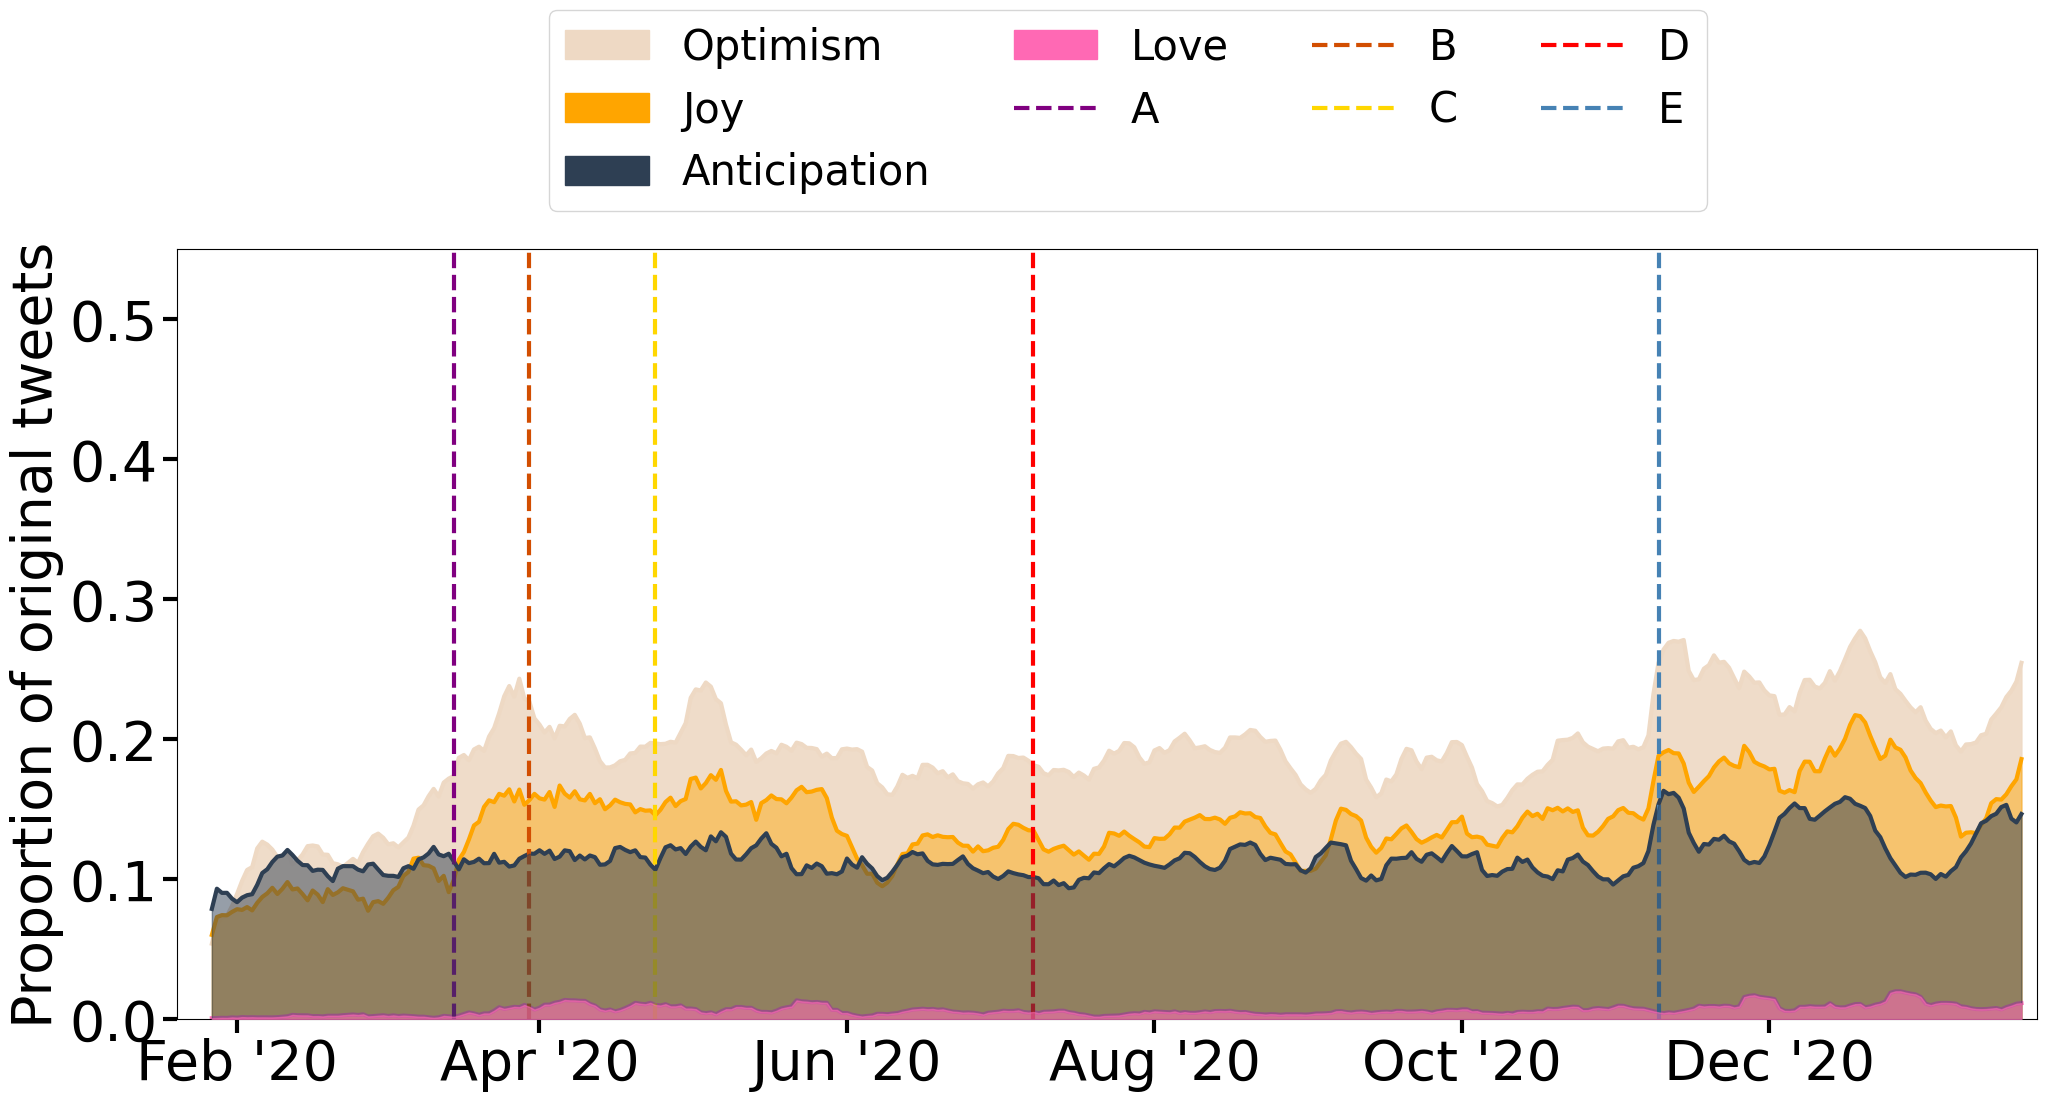

In [31]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in ['optimism','joy','anticipation','love']:
    plt.plot(phe_aff_day['date'],smooth(phe_aff_day[c]),lw=3,color=color_dict[c])
    if c=='optimism':
        plt.fill_between(phe_aff_day['date'],smooth(phe_aff_day[c]),alpha=0.9,label=c.capitalize(),zorder=z,color=color_dict[c])
    else:
        plt.fill_between(phe_aff_day['date'],smooth(phe_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('phe_emotions_positive_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [32]:
negative_emo=['disgust',
 'anger',
 'sadness',
 'fear',
 'pessimism']

In [33]:
color_dict={
    'disgust':'#D1B000',
    'fear':'#40E0D0',
    'sadness':'purple',
    'anger':'#D2042D',
    'pessimism':'#006666'
}

/tmp/ipykernel_3417895/628623762.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


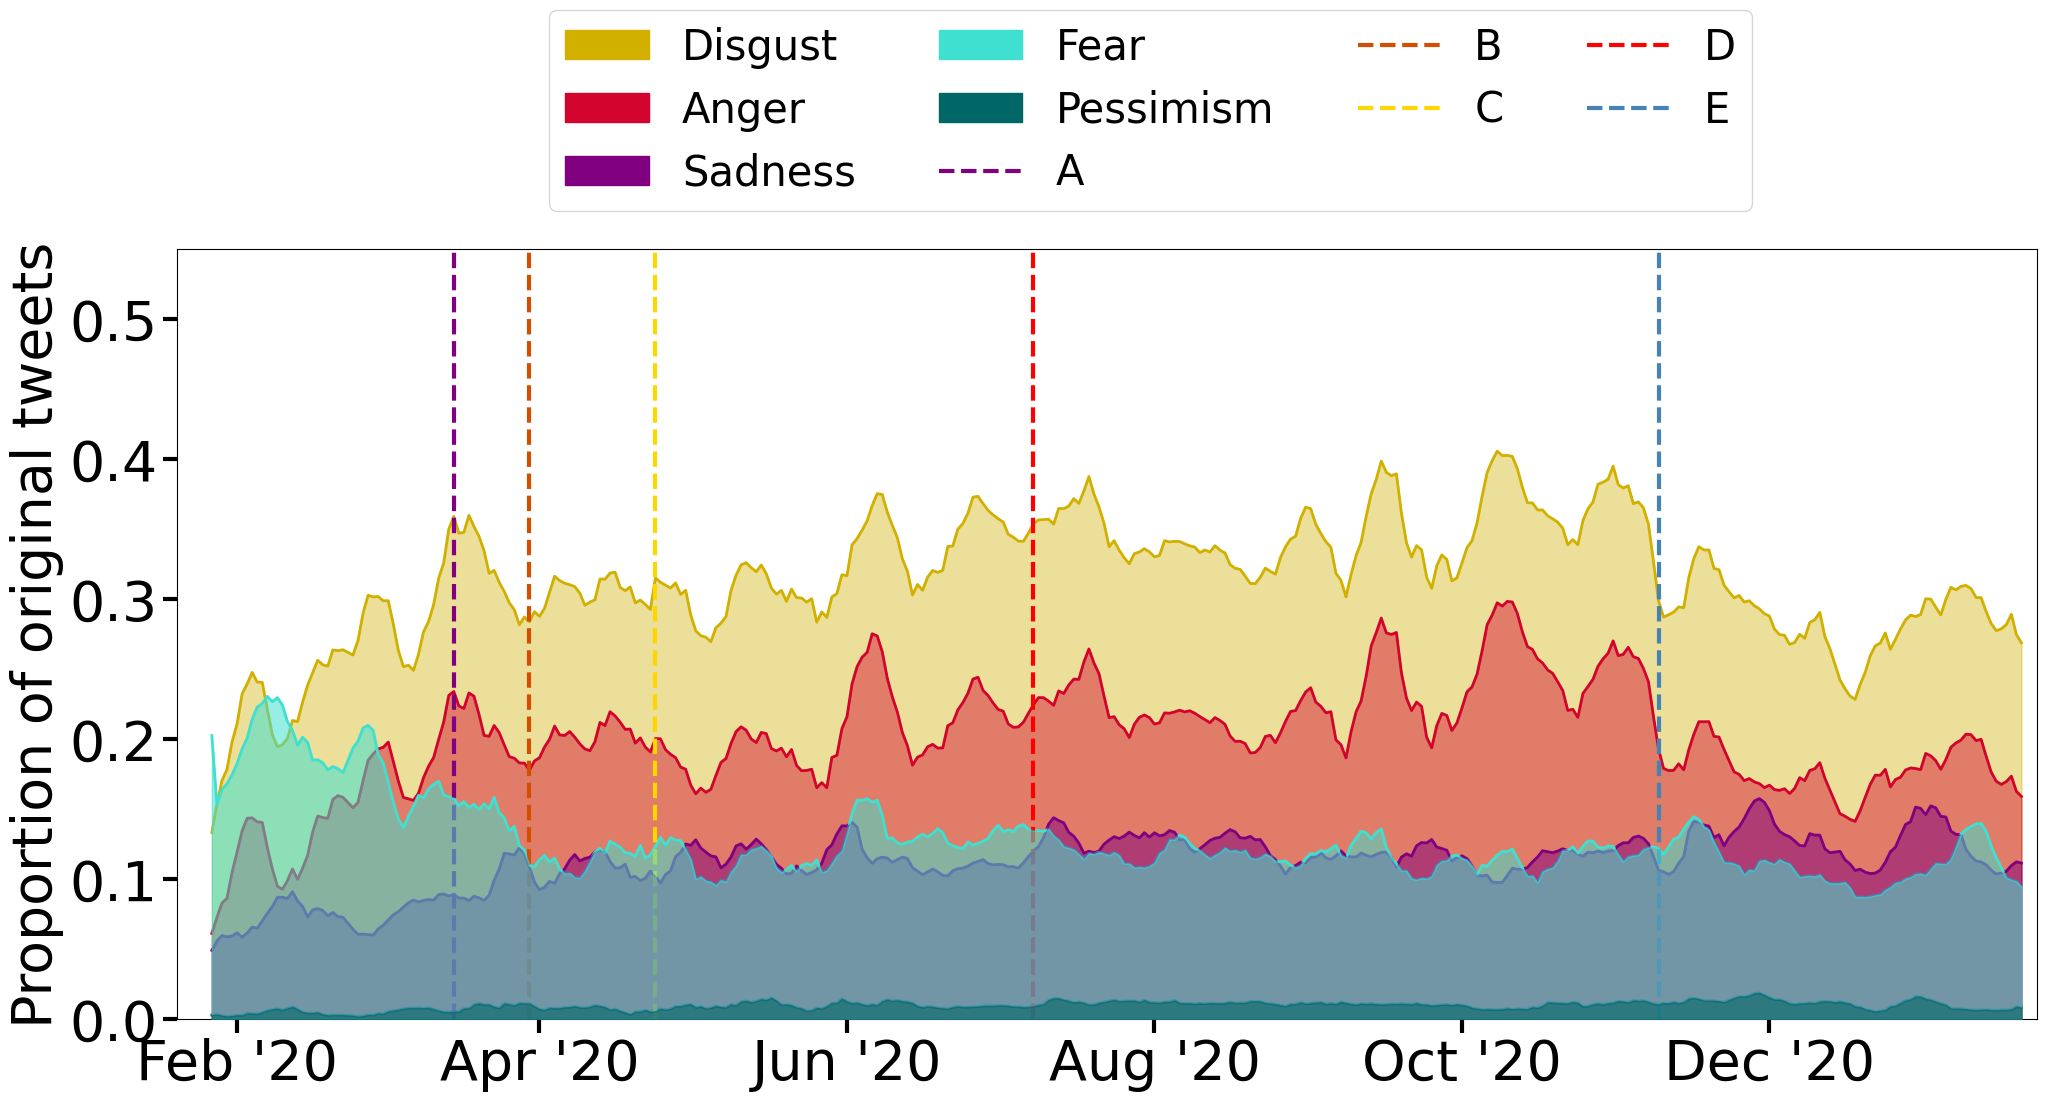

In [34]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in negative_emo:
    plt.plot(phe_aff_day['date'],smooth(phe_aff_day[c]),lw=2,color=color_dict[c])
    plt.fill_between(phe_aff_day['date'],smooth(phe_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('phe_emotions_negative_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Moral Foundations

In [35]:
mfts=['care',
 'harm',
 'fairness',
 'cheating',
 'loyalty',
 'betrayal',
 'authority',
 'subversion',
 'purity',
 'degradation']

pos_mft=['care',
         'loyalty',
         'authority',
         'purity',
                'fairness']

neg_mft=[ 'harm',
 'subversion',
 'cheating',
 'betrayal',
 'degradation']


In [36]:
color_dict={
    'care':'#2E3F53',
    'fairness':'#EED9C4',
    'authority':'orange',
    'loyalty':'#FF69B4',
    'purity':'brown'
}

/tmp/ipykernel_3417895/3948721784.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


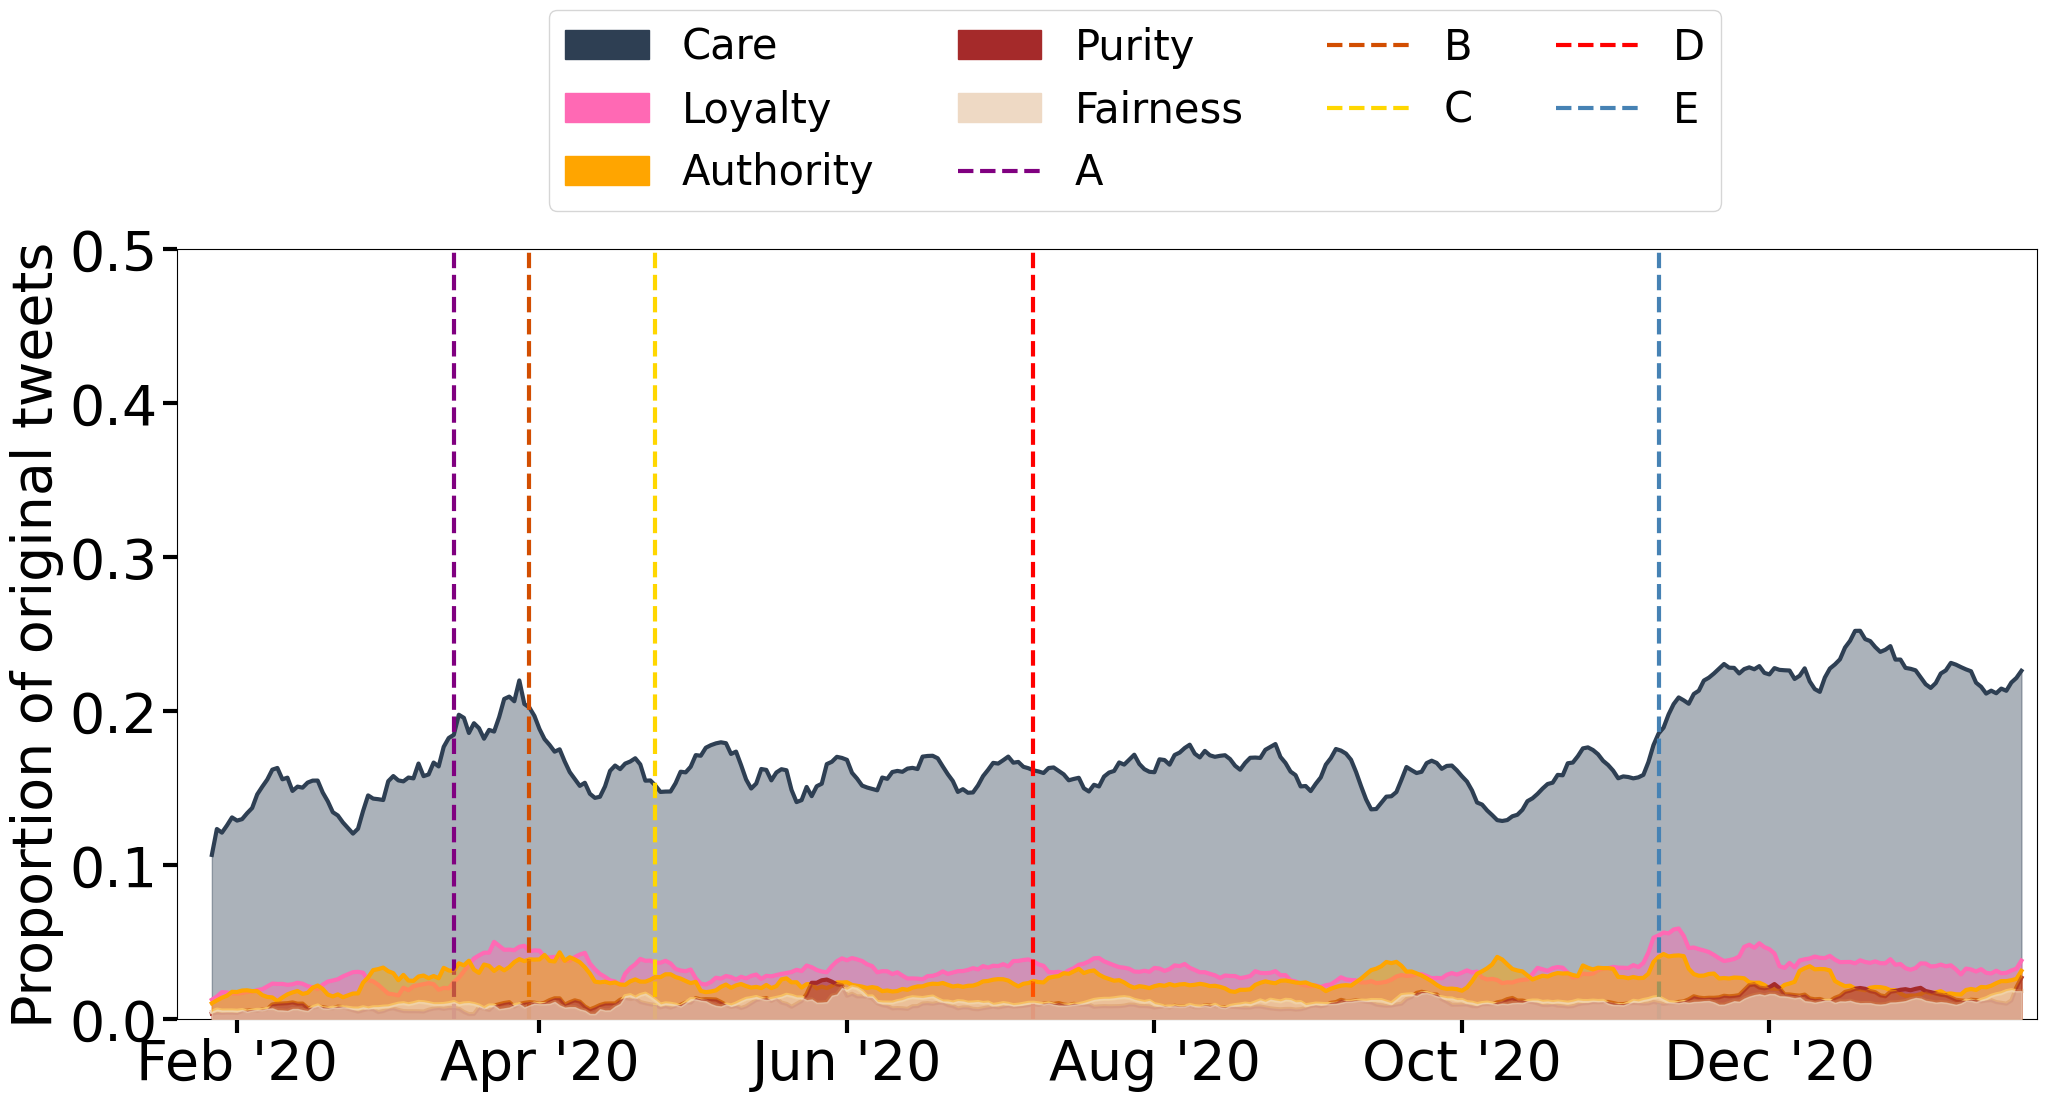

In [37]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in pos_mft:
    plt.plot(phe_aff_day['date'],smooth(phe_aff_day[c]),lw=3,color=color_dict[c])
    plt.fill_between(phe_aff_day['date'],smooth(phe_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')

plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.5)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('phe_mft_positive_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [38]:
color_dict={
    'harm':'#D1B000',
    'subversion':'purple',
    'cheating':'#40E0D0',
    'betrayal':'#006666',
    'degradation':'#D2042D'
}

/tmp/ipykernel_3417895/4048449354.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


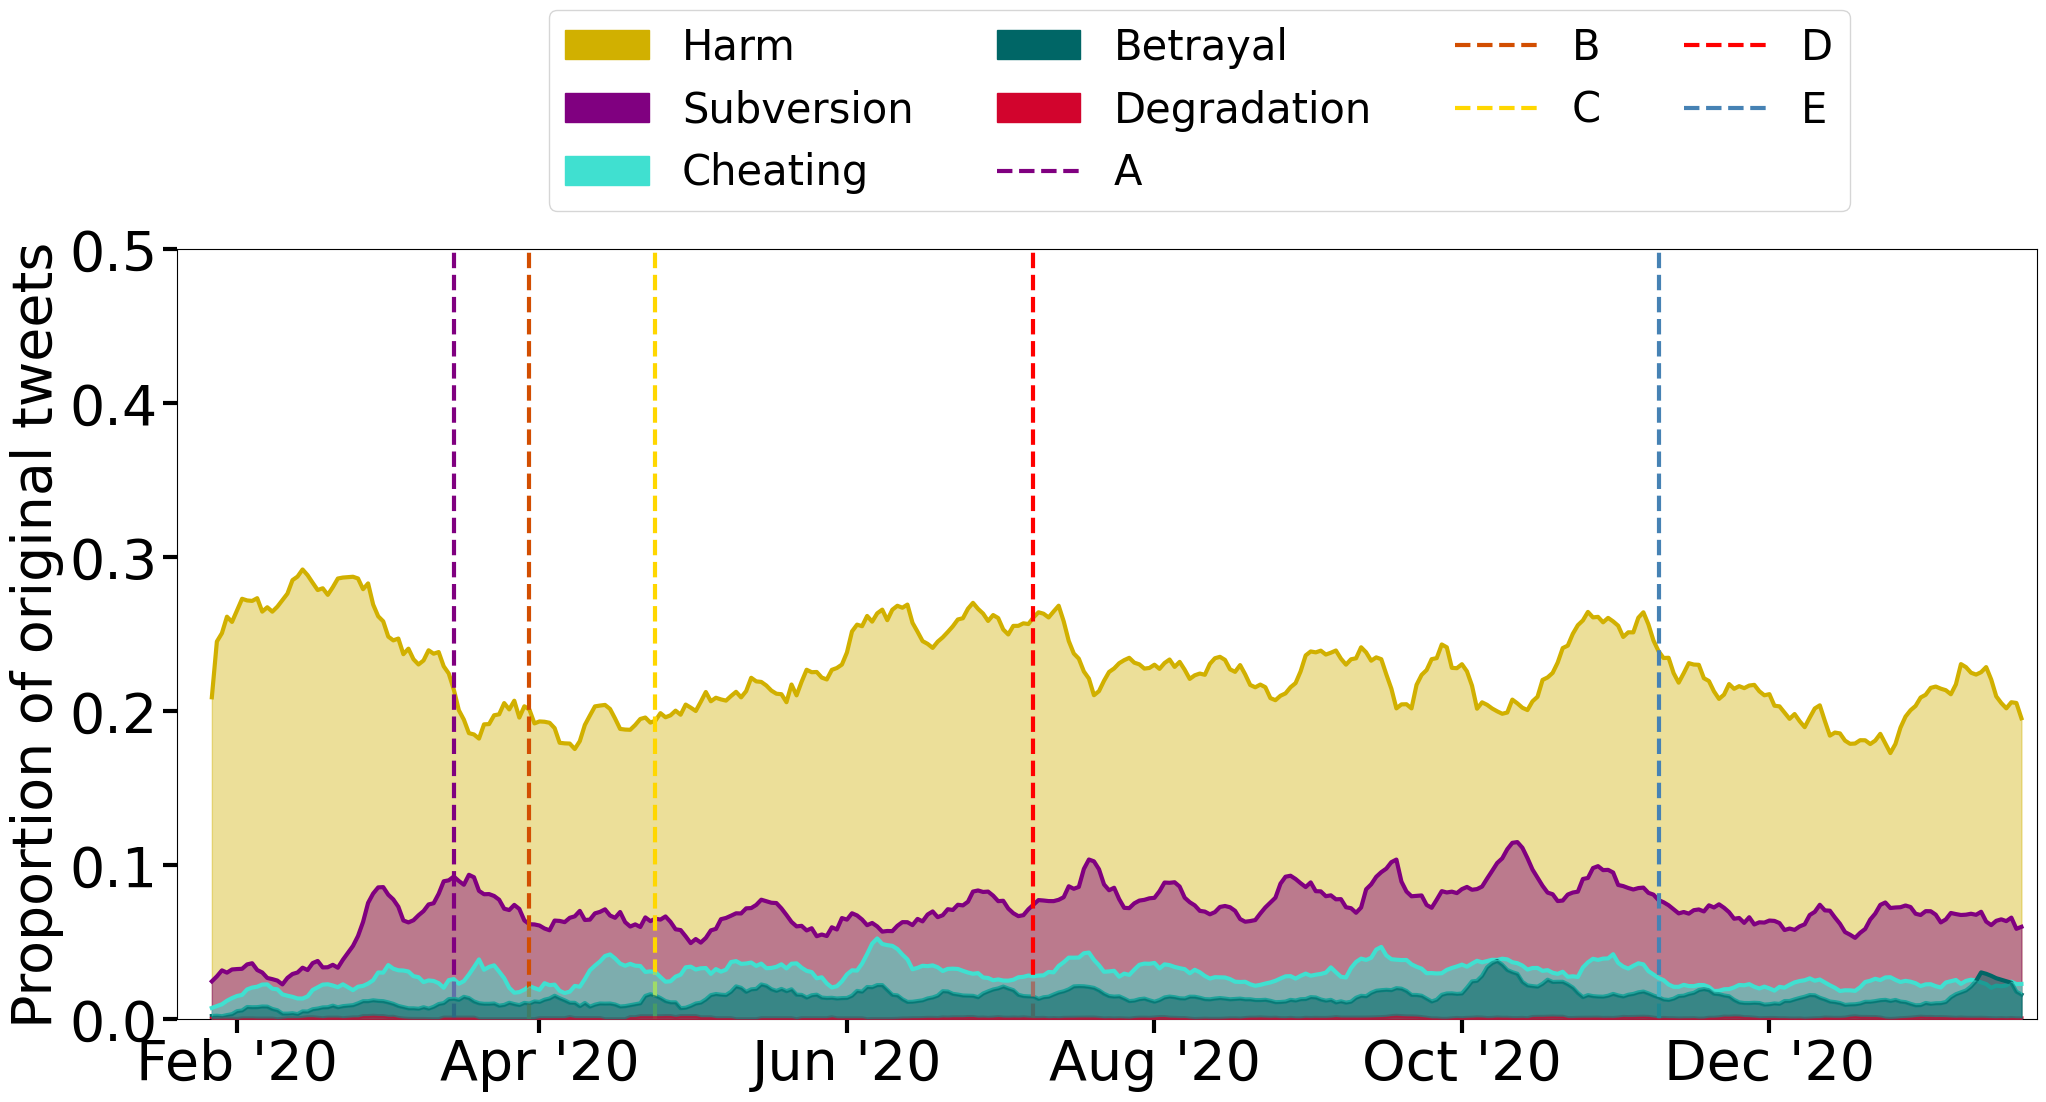

In [39]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in neg_mft:
    plt.plot(phe_aff_day['date'],smooth(phe_aff_day[c]),lw=3,color=color_dict[c])
    plt.fill_between(phe_aff_day['date'],smooth(phe_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')

plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.5)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('phe_mft_negative_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Emotions and Moral Foundations - Pseudo-PHE

In [40]:
pseudo_aff=pd.read_csv('/effectcrawl/ashwin_pseudo_data.csv')
pseudo=pd.read_pickle('/effectcrawl/ashwin/pseudo_data.pkl')

In [41]:
pseudo_aff=pseudo_aff.reset_index()
pseudo=pseudo.reset_index()

In [42]:
pseudo_aff=pseudo_aff[['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust',
 'care',
 'harm',
 'fairness',
 'cheating',
 'loyalty',
 'betrayal',
 'authority',
 'subversion',
 'purity',
 'degradation']]

In [43]:
pseudo_res=pd.concat([pseudo,pseudo_aff],axis=1)
pseudo_res

index                tweetid                 userid  \
0             5    1219823519262896128               34753499   
1             6    1219859556416671744    1111644626694201344   
2             7    1219858076699742208    1205922332432203776   
3             9    1219865245147070465    1013291026755317760   
4            11    1219930852341186560              608310777   
...         ...                    ...                    ...   
369317  1038819  1456409075835543552.0             88303644.0   
369318  1038820  1456409144106258432.0  1108234224664903680.0   
369319  1038821  1456409229699465216.0  1176325494259798016.0   
369320  1038826  1456410221539049472.0           1873244941.0   
369321  1038828  1456410903184773120.0  1108234224664903680.0   

            screen_name                            date lang  \
0        TerryMMayfield  Wed Jan 22 03:26:04 +0000 2020   en   
1             TinaBug23  Wed Jan 22 05:49:16 +0000 2020   en   
2       EpigeneticWhisp  Wed Jan 22 05:43:24 +0000 2020   en   
3           Rectitude20  Wed Jan 22 06:11:53 +0000 2020   en   
4            SciInsider  Wed Jan 22 10:32:35 +0000 2020   en   
...                 ...                             ...  ...   
369317    Abettervision  Thu Nov 04 23:52:37 +0000 2021   en   
369318    philomathyjen  Thu Nov 04 23:52:53 +0000 2021   en   
369319    Musex58475389  Thu Nov 04 23:53:13 +0000 2021   en   
369320  roderickburrell  Thu Nov 04 23:57:10 +0000 2021   en   
369321    philomathyjen  Thu Nov 04 23:59:52 +0000 2021   en   

                           location  \
0                      Arizona, USA   
1       In the trenches for Freedom   
2                               NaN   
3                               NaN   
4                      New York, NY   
...                             ...   
369317                       Canada   
369318                          NaN   
369319                          NaN   
369320           West Hollywood, CA   
369321                          NaN   

                                              description place_id place_url  \
0       Blathering #Blogger • #LymeDisease #MCAS #MECF...      NaN       NaN   
1       Freedom Keeper #wedid 🌷 God is Good, #woke & #...      NaN       NaN   
2       Three things cannot be long hidden: the sun, t...      NaN       NaN   
3                   Uncovering the truth behind vaccines.      NaN       NaN   
4         Science news, opinion, amazing GIFs and videos.      NaN       NaN   
...                                                   ...      ...       ...   
369317  Co-author new "UNPRECEDENTED CRIME: Climate Sc...      NaN       NaN   
369318                   Politics, Information & Research      NaN       NaN   
369319  OPM is the opium of the socialist communist De...      NaN       NaN   
369320                                                NaN      NaN       NaN   
369321                   Politics, Information & Research      NaN       NaN   

        ...      care      harm  fairness  cheating   loyalty  betrayal  \
0       ...  0.000892  0.000596  0.000825  0.000332  0.000623  0.000387   
1       ...  0.002634  0.210044  0.000585  0.000521  0.002153  0.000879   
2       ...  0.000528  0.973791  0.000305  0.001244  0.000700  0.001713   
3       ...  0.013541  0.930289  0.001518  0.002345  0.002166  0.003679   
4       ...  0.000122  0.992032  0.000065  0.000656  0.000145  0.000557   
...     ...       ...       ...       ...       ...       ...       ...   
369317  ...  0.001455  0.103218  0.000477  0.003034  0.000993  0.001101   
369318  ...  0.001094  0.001698  0.000633  0.003651  0.001856  0.003069   
369319  ...  0.002131  0.749196  0.000551  0.001444  0.002247  0.006438   
369320  ...  0.000911  0.941349  0.000678  0.000695  0.000370  0.001815   
369321  ...  0.640434  0.480411  0.012401  0.000258  0.004276  0.001107   

       authority subversion    purity degradation  
0       0.000412   0.004682  0.000414    0.000640  
1       0.000208   0.0011

In [44]:
pseudo_aff=pseudo_res

In [45]:
from datetime import datetime
def convert_date(x):
    return datetime.strftime(pd.Timestamp(x),"%Y-%m-%d")

tqdm.pandas()
pseudo_aff['str_date']=pseudo_aff['date'].progress_apply(convert_date)

100%|█████████████████████████████████| 369322/369322 [00:54<00:00, 6773.03it/s]


In [46]:
pseudo_aff['date']=pseudo_aff['str_date'].apply(pd.Timestamp)
pseudo_aff=pseudo_aff[pseudo_aff['date']<=pd.Timestamp('2021-01-20')]
pseudo_aff

index                tweetid                 userid      screen_name  \
0            5    1219823519262896128               34753499   TerryMMayfield   
1            6    1219859556416671744    1111644626694201344        TinaBug23   
2            7    1219858076699742208    1205922332432203776  EpigeneticWhisp   
3            9    1219865245147070465    1013291026755317760      Rectitude20   
4           11    1219930852341186560              608310777       SciInsider   
...        ...                    ...                    ...              ...   
174958  521714  1352039077076320256.0  1174099964642746368.0         DrTessaT   
174959  521719  1352040480557551616.0  1174099964642746368.0         DrTessaT   
174960  521720  1352040564229873664.0             47791337.0      R_H_Ebright   
174961  521725  1352040951280144384.0  1174099964642746368.0         DrTessaT   
174962  521730  1352041779579633664.0  1174099964642746368.0         DrTessaT   

             date lang                     location  \
0      2020-01-22   en                 Arizona, USA   
1      2020-01-22   en  In the trenches for Freedom   
2      2020-01-22   en                          NaN   
3      2020-01-22   en                          NaN   
4      2020-01-22   en                 New York, NY   
...           ...  ...                          ...   
174958 2021-01-20   en                          NaN   
174959 2021-01-20   en                          NaN   
174960 2021-01-20   en              New Jersey, USA   
174961 2021-01-20   en                          NaN   
174962 2021-01-20   en                          NaN   

                                              description place_id place_url  \
0       Blathering #Blogger • #LymeDisease #MCAS #MECF...      NaN       NaN   
1       Freedom Keeper #wedid 🌷 God is Good, #woke & #...      NaN       NaN   
2       Three things cannot be long hidden: the sun, t...      NaN       NaN   
3                   Uncovering the truth behind vaccines.      NaN       NaN   
4         Science news, opinion, amazing GIFs and videos.      NaN       NaN   
...                                                   ...      ...       ...   
174958  I block everyone who is anti-informed consent ...      NaN       NaN   
174959  I block everyone who is anti-informed consent ...      NaN       NaN   
174960  Board of Governors Professor of Chemistry and ...      NaN       NaN   
174961  I block everyone who is anti-informed consent ...      NaN       NaN   
174962  I block everyone who is anti-informed consent ...      NaN       NaN   

        ...      harm  fairness  cheating   loyalty  betrayal authority  \
0       ...  0.000596  0.000825  0.000332  0.000623  0.000387  0.000412   
1       ...  0.210044  0.000585  0.000521  0.002153  0.000879  0.000208   
2       ...  0.973791  0.000305  0.001244  0.000700  0.001713  0.000073   
3       ...  0.930289  0.001518  0.002345  0.002166  0.003679  0.001056   
4       ...  0.992032  0.000065  0.000656  0.000145  0.000557  0.000015   
...     ...       ...       ...       ...       ...       ...       ...   
174958  ...  0.040565  0.007146  0.001055  0.034506  0.002254  0.001176   
174959  ...  0.000768  0.000231  0.000220  0.000307  0.000103  0.000086   
174960  ...  0.000379  0.001526  0.000429  0.982355  0.000225  0.048401   
174961  ...  0.001185  0.000880  0.000976  0.000751  0.000116  0.000222   
174962  ...  0.449141  0.001847  0.002149  0.004058  0.000893  0.000353   

       subversion    purity degradation    str_date  
0        0.004682  0.000414    0.000640  2020-01-22  
1        0.001189  0.001140    0.001137  2020-01-22  
2        0.001738  0.000225    0.001043  2020-01-22  
3        0.007435  0.002877    0.003865  2020-01-22  
4        0.000643  0.000046    0.000377  2020-01-22  
...           ...       ...         ...         ...  
174958   0.049869  0.005551    0.000759  2021-01-20  
174959   0.000221  0.000265    0.000228  2021-01-20  
174960   0.000470  0.000619

In [47]:
pseudo=pd.read_csv('pseudo_users.csv')['screen_name'].tolist()
pseudo.remove('mcuban')

In [48]:
#pseudo_em=pd.read_csv('/effectcrawl/ashwin/ashwin_all_non_phe_data_emot_mf.csv')

In [49]:
# pseudo_em=pseudo_em[list(pseudo_em)[2:]]
# pseudo_em

In [50]:
# pseudo_aff=pseudo_aff.reset_index()
# pseudo_em=pseudo_em.reset_index()

In [51]:
# pseudo_aff=pd.concat([pseudo_aff,pseudo_em],axis=1)
# pseudo_aff

In [52]:
pseudo_aff=pseudo_aff[pseudo_aff['screen_name'].isin(pseudo)]
pseudo_aff

index                tweetid                 userid      screen_name  \
0            5    1219823519262896128               34753499   TerryMMayfield   
1            6    1219859556416671744    1111644626694201344        TinaBug23   
2            7    1219858076699742208    1205922332432203776  EpigeneticWhisp   
3            9    1219865245147070465    1013291026755317760      Rectitude20   
4           11    1219930852341186560              608310777       SciInsider   
...        ...                    ...                    ...              ...   
174958  521714  1352039077076320256.0  1174099964642746368.0         DrTessaT   
174959  521719  1352040480557551616.0  1174099964642746368.0         DrTessaT   
174960  521720  1352040564229873664.0             47791337.0      R_H_Ebright   
174961  521725  1352040951280144384.0  1174099964642746368.0         DrTessaT   
174962  521730  1352041779579633664.0  1174099964642746368.0         DrTessaT   

             date lang                     location  \
0      2020-01-22   en                 Arizona, USA   
1      2020-01-22   en  In the trenches for Freedom   
2      2020-01-22   en                          NaN   
3      2020-01-22   en                          NaN   
4      2020-01-22   en                 New York, NY   
...           ...  ...                          ...   
174958 2021-01-20   en                          NaN   
174959 2021-01-20   en                          NaN   
174960 2021-01-20   en              New Jersey, USA   
174961 2021-01-20   en                          NaN   
174962 2021-01-20   en                          NaN   

                                              description place_id place_url  \
0       Blathering #Blogger • #LymeDisease #MCAS #MECF...      NaN       NaN   
1       Freedom Keeper #wedid 🌷 God is Good, #woke & #...      NaN       NaN   
2       Three things cannot be long hidden: the sun, t...      NaN       NaN   
3                   Uncovering the truth behind vaccines.      NaN       NaN   
4         Science news, opinion, amazing GIFs and videos.      NaN       NaN   
...                                                   ...      ...       ...   
174958  I block everyone who is anti-informed consent ...      NaN       NaN   
174959  I block everyone who is anti-informed consent ...      NaN       NaN   
174960  Board of Governors Professor of Chemistry and ...      NaN       NaN   
174961  I block everyone who is anti-informed consent ...      NaN       NaN   
174962  I block everyone who is anti-informed consent ...      NaN       NaN   

        ...      harm  fairness  cheating   loyalty  betrayal authority  \
0       ...  0.000596  0.000825  0.000332  0.000623  0.000387  0.000412   
1       ...  0.210044  0.000585  0.000521  0.002153  0.000879  0.000208   
2       ...  0.973791  0.000305  0.001244  0.000700  0.001713  0.000073   
3       ...  0.930289  0.001518  0.002345  0.002166  0.003679  0.001056   
4       ...  0.992032  0.000065  0.000656  0.000145  0.000557  0.000015   
...     ...       ...       ...       ...       ...       ...       ...   
174958  ...  0.040565  0.007146  0.001055  0.034506  0.002254  0.001176   
174959  ...  0.000768  0.000231  0.000220  0.000307  0.000103  0.000086   
174960  ...  0.000379  0.001526  0.000429  0.982355  0.000225  0.048401   
174961  ...  0.001185  0.000880  0.000976  0.000751  0.000116  0.000222   
174962  ...  0.449141  0.001847  0.002149  0.004058  0.000893  0.000353   

       subversion    purity degradation    str_date  
0        0.004682  0.000414    0.000640  2020-01-22  
1        0.001189  0.001140    0.001137  2020-01-22  
2        0.001738  0.000225    0.001043  2020-01-22  
3        0.007435  0.002877    0.003865  2020-01-22  
4        0.000643  0.000046    0.000377  2020-01-22  
...           ...       ...         ...         ...  
174958   0.049869  0.005551    0.000759  2021-01-20  
174959   0.000221  0.000265    0.000228  2021-01-20  
174960   0.000470  0.000619

In [53]:
emotions=['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness']

mfts=['care',
 'harm',
 'fairness',
 'cheating',
 'loyalty',
 'betrayal',
 'authority',
 'subversion',
 'purity',
 'degradation']

In [54]:
def binner(x):
    if x>0.5:
        return 1
    return 0

In [55]:
for x in emotions+mfts:
    pseudo_aff[x]=pseudo_aff[x].apply(binner)

/tmp/ipykernel_3417895/2803818358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff[x]=pseudo_aff[x].apply(binner)


In [56]:
def smooth(x):
    return x.rolling(window=7).mean()

In [57]:
pseudo_aff_day=pseudo_aff[['str_date']+emotions+mfts].groupby('str_date').mean().reset_index()

In [58]:
pseudo_aff_day['date']=pseudo_aff_day['str_date'].apply(pd.Timestamp)

In [59]:
master_list=['education',
 'healthcare',
 'lockdowns',
 'masking',
 'origins',
 'therapeutics',
 'vaccines']

nlp = spacy.load('en_core_web_md',disable=['ner','parser'])

def lemmatize(words):
    doc=nlp(words,disable=['parser','ner'])
    return ' '.join([tok.lemma_ for tok in doc])


cpath='/nas/home/ashreyas/ashwin/Coronavirus/Domain-Analysis/Covid_Concerns/Final_Keywords'
cfiles=os.listdir(cpath)
concerns={}
for file in cfiles:
    name=file.split('.csv')[0]
    words=pd.read_csv(os.path.join(cpath,file))['words'].tolist()
    words=[lemmatize(word) for word in words]
    concerns[name]=words

concerns['lockdowns'].extend(['stopthespread','distancing','stayhome'])
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

def check_concern(tweet):
    c_list=[]
    for c in concerns:
        words=concerns[c]
        tweet_words=tweet.split()
        res=[]
        for t in tweet_words:
            for w in words:
                if t.startswith(w):
                    res.append(w)
        if len(res)>0:
            c_list.append(c)
    return c_list

import re
irrelevant_chars="~?!./\:;+=&^%$@(,)[]_*"
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

from string import digits
def deep_clean(x):
    x=x.lower()
    x=re.sub(r'http\S+', '', x)
    remove_digits = str.maketrans(' ', ' ', digits)
    remove_chars = str.maketrans(' ', ' ', irrelevant_chars)
    x = x.translate(remove_digits)
    x = x.translate(remove_chars)
    x = emoji_pattern.sub(r'', x)
    return check_concern(x)

tqdm.pandas()
pseudo_aff['concerns_new']=pseudo_aff['text'].progress_apply(deep_clean)

concerns=['origins','lockdowns','masking','healthcare','education','therapeutics','vaccines']
def mapper(li,concern):
    if concern in li:
        return 1
    return 0

for c in concerns:
    pseudo_aff[c]=pseudo_aff['concerns_new'].apply(mapper,args=(c,))
pseudo_aff

100%|█████████████████████████████████| 173123/173123 [02:09<00:00, 1334.15it/s]
/tmp/ipykernel_3417895/3560157237.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['concerns_new']=pseudo_aff['text'].progress_apply(deep_clean)
/tmp/ipykernel_3417895/3560157237.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff[c]=pseudo_aff['concerns_new'].apply(mapper,args=(c,))
/tmp/ipykernel_3417895/3560157237.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

index                tweetid                 userid      screen_name  \
0            5    1219823519262896128               34753499   TerryMMayfield   
1            6    1219859556416671744    1111644626694201344        TinaBug23   
2            7    1219858076699742208    1205922332432203776  EpigeneticWhisp   
3            9    1219865245147070465    1013291026755317760      Rectitude20   
4           11    1219930852341186560              608310777       SciInsider   
...        ...                    ...                    ...              ...   
174958  521714  1352039077076320256.0  1174099964642746368.0         DrTessaT   
174959  521719  1352040480557551616.0  1174099964642746368.0         DrTessaT   
174960  521720  1352040564229873664.0             47791337.0      R_H_Ebright   
174961  521725  1352040951280144384.0  1174099964642746368.0         DrTessaT   
174962  521730  1352041779579633664.0  1174099964642746368.0         DrTessaT   

             date lang                     location  \
0      2020-01-22   en                 Arizona, USA   
1      2020-01-22   en  In the trenches for Freedom   
2      2020-01-22   en                          NaN   
3      2020-01-22   en                          NaN   
4      2020-01-22   en                 New York, NY   
...           ...  ...                          ...   
174958 2021-01-20   en                          NaN   
174959 2021-01-20   en                          NaN   
174960 2021-01-20   en              New Jersey, USA   
174961 2021-01-20   en                          NaN   
174962 2021-01-20   en                          NaN   

                                              description place_id place_url  \
0       Blathering #Blogger • #LymeDisease #MCAS #MECF...      NaN       NaN   
1       Freedom Keeper #wedid 🌷 God is Good, #woke & #...      NaN       NaN   
2       Three things cannot be long hidden: the sun, t...      NaN       NaN   
3                   Uncovering the truth behind vaccines.      NaN       NaN   
4         Science news, opinion, amazing GIFs and videos.      NaN       NaN   
...                                                   ...      ...       ...   
174958  I block everyone who is anti-informed consent ...      NaN       NaN   
174959  I block everyone who is anti-informed consent ...      NaN       NaN   
174960  Board of Governors Professor of Chemistry and ...      NaN       NaN   
174961  I block everyone who is anti-informed consent ...      NaN       NaN   
174962  I block everyone who is anti-informed consent ...      NaN       NaN   

        ... degradation    str_date            concerns_new origins lockdowns  \
0       ...           0  2020-01-22                      []       0         0   
1       ...           0  2020-01-22                      []       0         0   
2       ...           0  2020-01-22                      []       0         0   
3       ...           0  2020-01-22              [vaccines]       0         0   
4       ...           0  2020-01-22                      []       0         0   
...     ...         ...         ...                     ...     ...       ...   
174958  ...           0  2021-01-20   [education, vaccines]       0         0   
174959  ...           0  2021-01-20                      []       0         0   
174960  ...           0  2021-01-20                      []       0         0   
174961  ...           0  2021-01-20                      []       0         0   
174962  ...           0  2021-01-20  [vaccines, healthcare]       0         0   

       masking healthcare education therapeutics vaccines  
0            0          0         0            0        0  
1            0          0         0            0        0  
2            0          0         0            0        0  
3            0          0         0            0        1  
4            0          0         0            0        0  
...        ...        ...       ...          ...      ...  
174958       0       

In [60]:
pseudo_day_mean=pseudo_aff[['str_date']+concerns]
pseudo_day_mean=pseudo_day_mean.groupby('str_date').mean().reset_index()
pseudo_day_mean

str_date   origins  lockdowns   masking  healthcare  education  \
0    2020-01-22  0.000000   0.000000  0.000000    0.000000   0.000000   
1    2020-01-23  0.000000   0.044444  0.022222    0.033333   0.055556   
2    2020-01-24  0.012579   0.050314  0.000000    0.069182   0.031447   
3    2020-01-25  0.029762   0.017857  0.011905    0.059524   0.029762   
4    2020-01-26  0.011834   0.029586  0.005917    0.041420   0.023669   
..          ...       ...        ...       ...         ...        ...   
359  2021-01-16  0.009368   0.111241  0.038642    0.186183   0.114754   
360  2021-01-17  0.013235   0.200000  0.047059    0.092647   0.025000   
361  2021-01-18  0.026270   0.101576  0.049037    0.113835   0.059545   
362  2021-01-19  0.017391   0.100870  0.083478    0.118261   0.022609   
363  2021-01-20  0.008791   0.098901  0.070330    0.101099   0.032967   

     therapeutics  vaccines  
0        0.000000  0.236842  
1        0.011111  0.144444  
2        0.006289  0.132075  
3        0.000000  0.077381  
4        0.000000  0.094675  
..            ...       ...  
359      0.064403  0.197892  
360      0.035294  0.173529  
361      0.036778  0.122592  
362      0.024348  0.187826  
363      0.019780  0.171429  

[364 rows x 8 columns]

In [61]:
pseudo_day_mean['date']=pseudo_day_mean['str_date'].apply(pd.Timestamp)

In [62]:
day_mean['group']='PHE'
pseudo_day_mean['group']='Pseudo Experts'
res=pd.concat([day_mean,pseudo_day_mean],ignore_index=False)
del res['str_date']
del res['date']
box_df=pd.DataFrame()
for c in concerns:
    tmp=res[[c,'group']]
    tmp['concern']=c
    tmp=tmp.rename(columns={c:'value'})
    box_df=pd.concat([box_df,tmp])
box_df

/tmp/ipykernel_3417895/779416759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['concern']=c
/tmp/ipykernel_3417895/779416759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['concern']=c
/tmp/ipykernel_3417895/779416759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

value           group   concern
0    0.000000             PHE   origins
1    0.006993             PHE   origins
2    0.021978             PHE   origins
3    0.027972             PHE   origins
4    0.014684             PHE   origins
..        ...             ...       ...
359  0.197892  Pseudo Experts  vaccines
360  0.173529  Pseudo Experts  vaccines
361  0.122592  Pseudo Experts  vaccines
362  0.187826  Pseudo Experts  vaccines
363  0.171429  Pseudo Experts  vaccines

[5103 rows x 3 columns]

In [63]:
box_df['zip']=list(zip(box_df['concern'],box_df['group']))
pairs=list(set(box_df['zip'].tolist()))
pairs

[('healthcare', 'PHE'),
 ('vaccines', 'Pseudo Experts'),
 ('masking', 'Pseudo Experts'),
 ('education', 'Pseudo Experts'),
 ('masking', 'PHE'),
 ('education', 'PHE'),
 ('lockdowns', 'PHE'),
 ('therapeutics', 'PHE'),
 ('origins', 'PHE'),
 ('lockdowns', 'Pseudo Experts'),
 ('therapeutics', 'Pseudo Experts'),
 ('origins', 'Pseudo Experts'),
 ('vaccines', 'PHE'),
 ('healthcare', 'Pseudo Experts')]

In [64]:
box_df['concern']=box_df['concern'].str.title()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

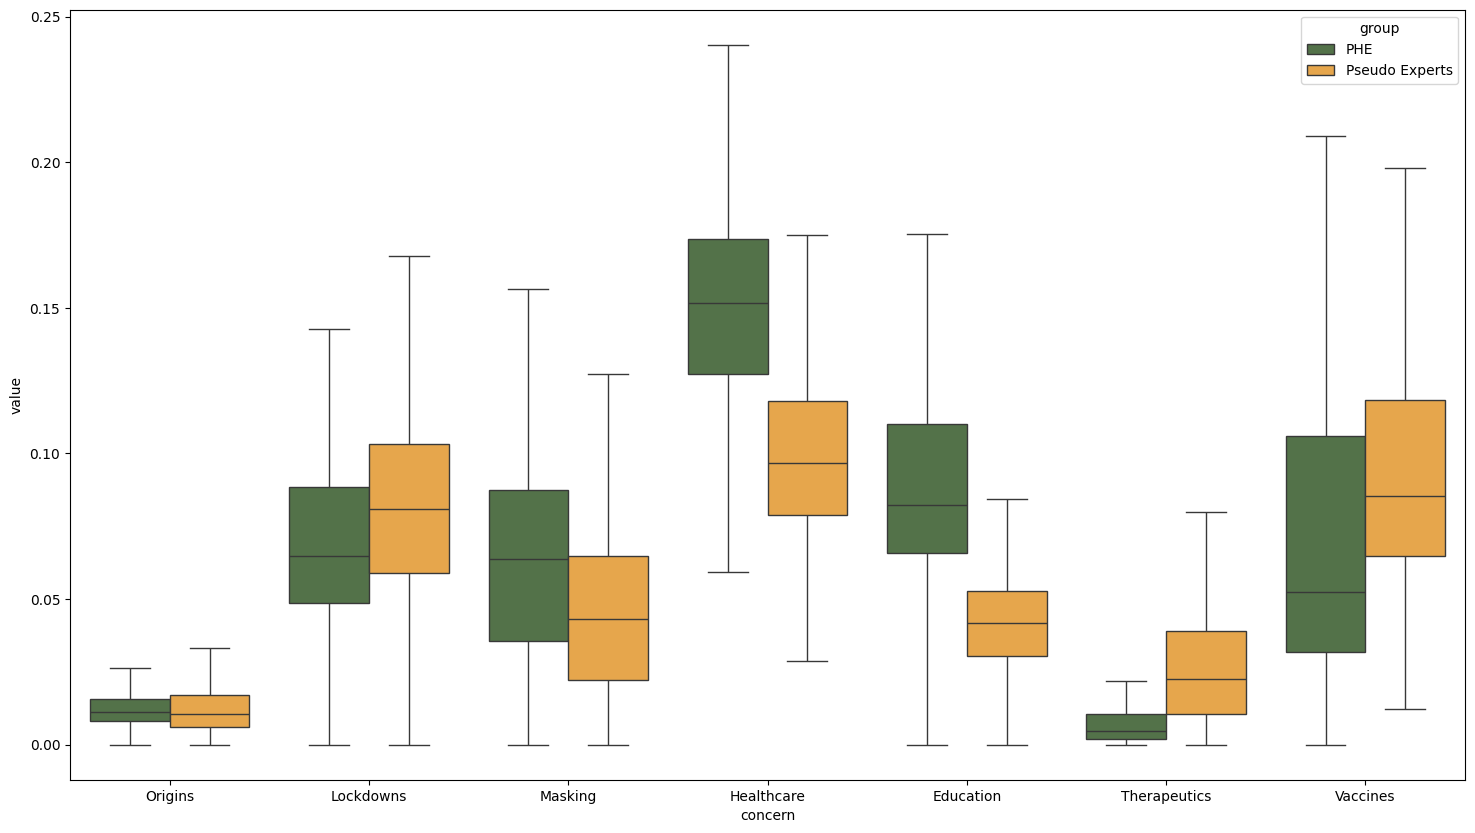

In [65]:
import seaborn as sns
from statannot import add_stat_annotation
box_pairs=[(('Origins',"PHE"),('Origins','Pseudo Experts')),
          (('Lockdowns',"PHE"),('Lockdowns','Pseudo Experts')),
          (('Masking',"PHE"),('Masking','Pseudo Experts')),
          (('Education',"PHE"),('Education','Pseudo Experts')),
          (('Healthcare',"PHE"),('Healthcare','Pseudo Experts')),
          (('Therapeutics',"PHE"),('Therapeutics','Pseudo Experts')),
          (('Vaccines',"PHE"),('Vaccines','Pseudo Experts'))]
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=box_df, x='concern', y='value', hue='group',showfliers=False,palette=['#4F7942','#FFAA33'])
add_stat_annotation(ax, data=box_df, x='concern', y='value', hue='group', box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2,fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.legend(fontsize=25)
plt.yticks([0,0.2,0.4,0.6],fontsize=25)
plt.ylim((-0.01,0.6))
plt.xticks(fontsize=22)
plt.xlabel(None)
plt.ylabel('Mean Daily Proportion',fontsize=25)
plt.savefig('concern_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
phe_aff['sum']=phe_aff['origins']+phe_aff['lockdowns']+phe_aff['masking']+phe_aff['healthcare']+phe_aff['education']+phe_aff['therapeutics']+phe_aff['vaccines']
phe_aff['sum']=phe_aff['sum']>0
phe_aff['sum'].mean()

/tmp/ipykernel_3417895/3492995054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['sum']=phe_aff['origins']+phe_aff['lockdowns']+phe_aff['masking']+phe_aff['healthcare']+phe_aff['education']+phe_aff['therapeutics']+phe_aff['vaccines']
/tmp/ipykernel_3417895/3492995054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['sum']=phe_aff['sum']>0


0.4312329464066697

In [67]:
phe_aff['vaccines'].mean(),pseudo_aff['vaccines'].mean()

(0.12164719919808364, 0.10634057866372464)

In [68]:
from string import digits
def deep_clean(x):
    x=re.sub(r'http\S+', '', x)
    remove_chars = str.maketrans(' ', ' ', irrelevant_chars)
    x = x.translate(remove_chars)
    x = emoji_pattern.sub(r'', x)
    return ''.join(char for char in x if ord(char) < 128)

In [69]:
# concern_date={}
# for c in concerns:
#     tmp=day_mean[['str_date',c+'_diff']]
#     tmp=tmp.sort_values(c+'_diff',ascending=False)
#     tmp=tmp[:5]
#     print(c,tmp['str_date'])
#     concern_date[c]={}
#     for d in tmp['str_date'].tolist():
#         t=phe_aff[(phe_aff['str_date']==d)&(phe_aff[c]==1)]
#         try:
#             t=t.sample(n=10,random_state=23)['text'].tolist()
#             concat=''
#             for x in t:
#                 concat=concat+x+'. '
#             concern_date[c][d]=deep_clean(concat)
#         except:
#             continue

In [70]:
# from transformers import AutoTokenizer, AutoModelForCausalLM
# import os
# tokenizer = AutoTokenizer.from_pretrained("google/gemma-7b",use_auth_token=True)
# model = AutoModelForCausalLM.from_pretrained("google/gemma-7b",use_auth_token=True)

In [71]:
# def summarize(x):
#     x=x+'. Summarize the main theme of the tweets above.'
#     input_ids = tokenizer(x, return_tensors="pt",padding=True, truncation=True, max_length=256)
#     outputs = model.generate(**input_ids, max_length=512)
#     return tokenizer.decode(outputs[0])

In [72]:
# for c in concerns:
#     print(c,concern_date[c].keys())

In [73]:
order=['vaccines','healthcare','masking','education','lockdowns','therapeutics','origins']
colors=['steelblue','#d24e01','#0B6623','red','purple','gold','#36454F']
color_dict={} 
ct=0
for c in order:
    color_dict[c]=colors[ct]
    ct+=1

/tmp/ipykernel_3417895/3034872830.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


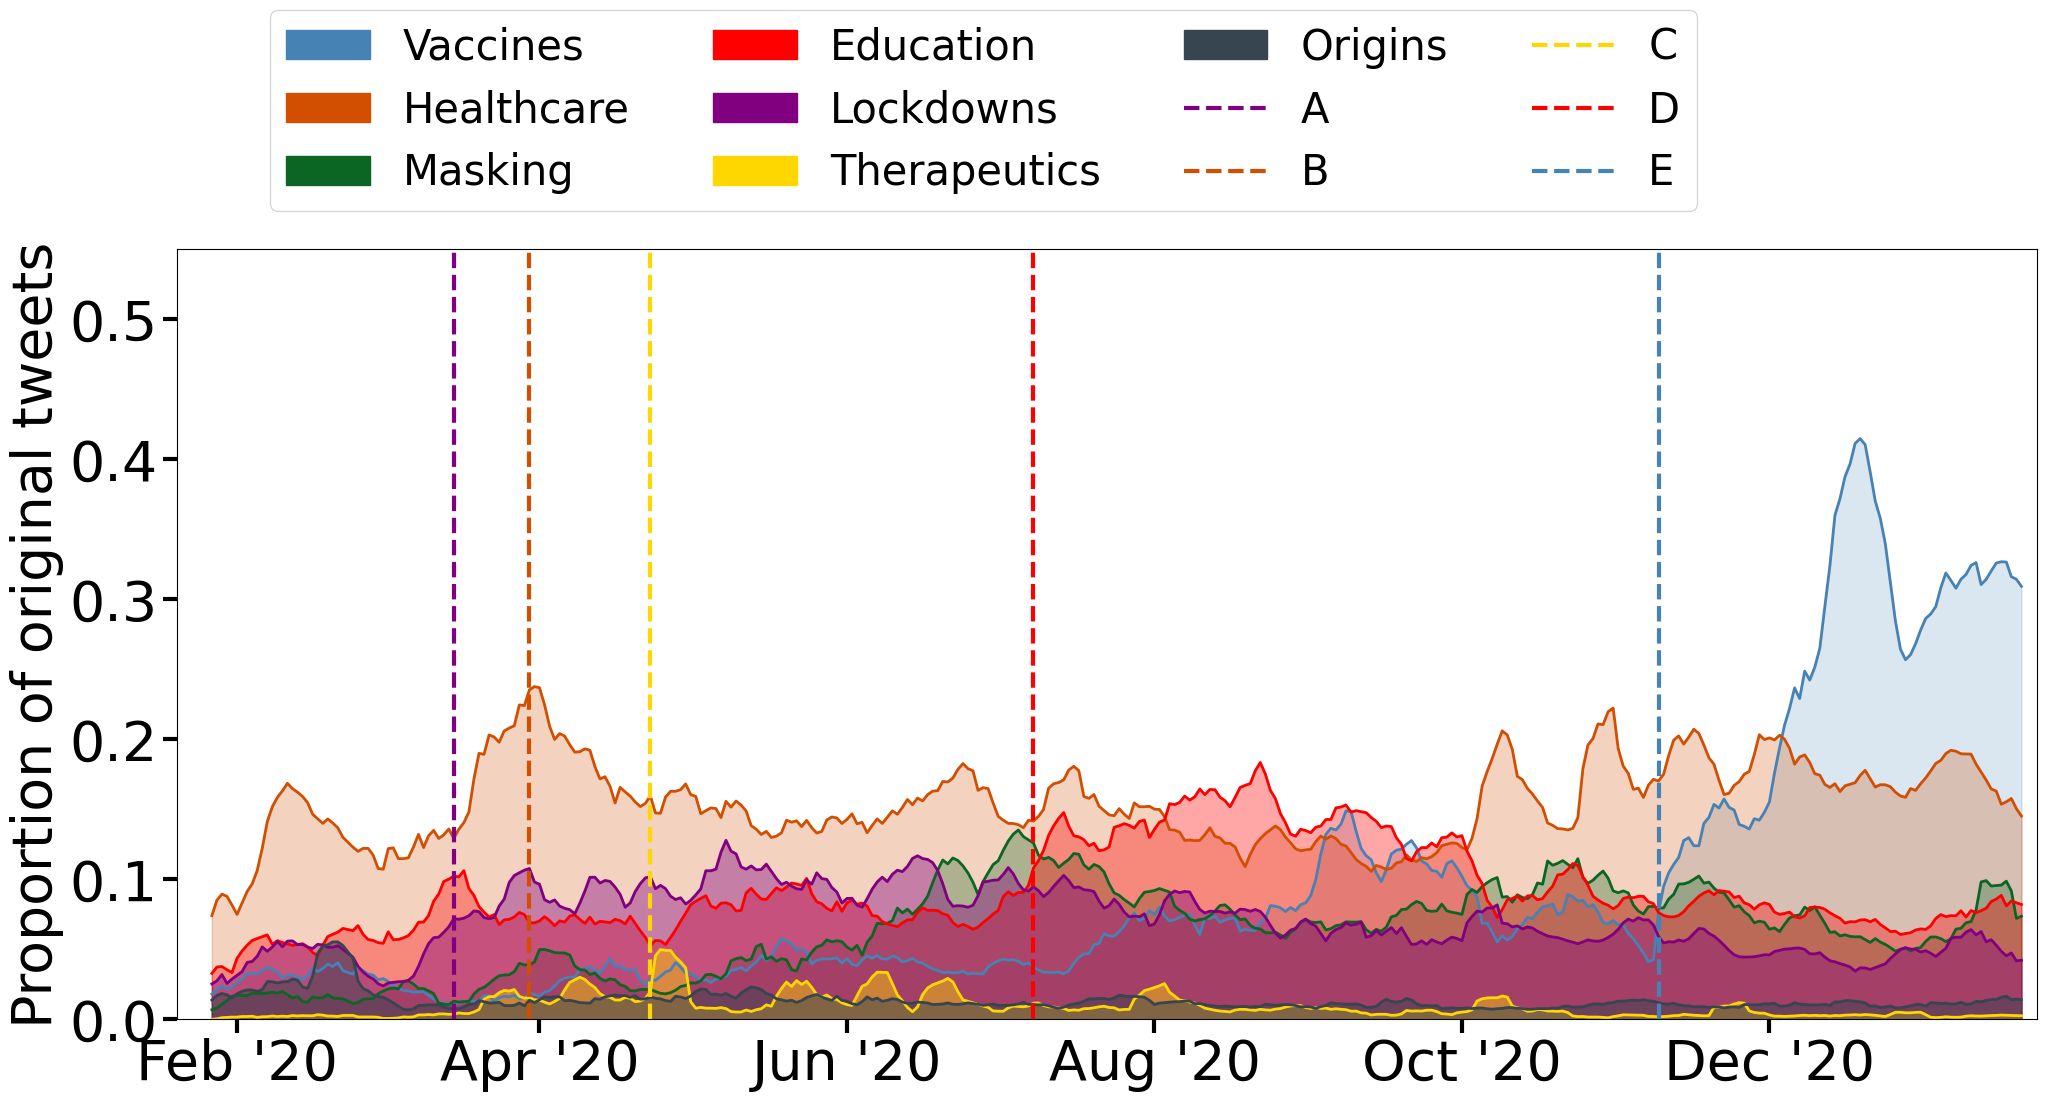

In [74]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.2
for c in order:
    plt.plot(day_mean['date'],smooth(day_mean[c]),color=color_dict[c],lw=2)
    plt.fill_between(day_mean['date'],smooth(day_mean[c]),alpha=ct,label=c.capitalize(),color=color_dict[c])
    ct+=0.05
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-23','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')

plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(0.05,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('phe_concern_activity.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [75]:
def smooth(x):
    return x.rolling(window=7).mean()

In [76]:
order=['vaccines','healthcare','masking','education','lockdowns','therapeutics','origins']

In [77]:
colors=['steelblue','#d24e01','#0B6623','red','purple','gold','#36454F']
color_dict={} 
ct=0
for c in order:
    color_dict[c]=colors[ct]
    ct+=1

In [78]:
order=['vaccines','healthcare','lockdowns','masking','education','therapeutics','origins']

In [79]:
# for c in concerns:
#     pseudo_day_mean[c+'_diff']=pseudo_day_mean[c].diff(periods=3)
# pseudo_day_mean

In [80]:
from string import digits
def deep_clean(x):
    x=re.sub(r'http\S+', '', x)
    x=re.sub(r'https\S+', '', x)
    remove_chars = str.maketrans(' ', ' ', irrelevant_chars)
    x = x.translate(remove_chars)
    x = emoji_pattern.sub(r'', x)
    return ''.join(char for char in x if ord(char) < 128)

In [81]:
# concern_date={}
# for c in concerns:
#     tmp=pseudo_day_mean[['str_date',c+'_diff']]
#     tmp=tmp.sort_values(c+'_diff',ascending=False)
#     tmp=tmp[:5]
#     print(c,tmp['str_date'])
#     concern_date[c]={}
#     for d in tmp['str_date'].tolist():
#         t=pseudo_aff[(pseudo_aff['str_date']==d)&(pseudo_aff[c]==1)]
#         try:
#             t=t.sample(n=10,random_state=23)['text'].tolist()
#             concat=''
#             for x in t:
#                 concat=concat+x+'. '
#             concern_date[c][d]=deep_clean(concat)
#         except:
#             continue

In [82]:
# for c in concerns:
#     print(c,concern_date[c].keys())

/tmp/ipykernel_3417895/1551614121.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


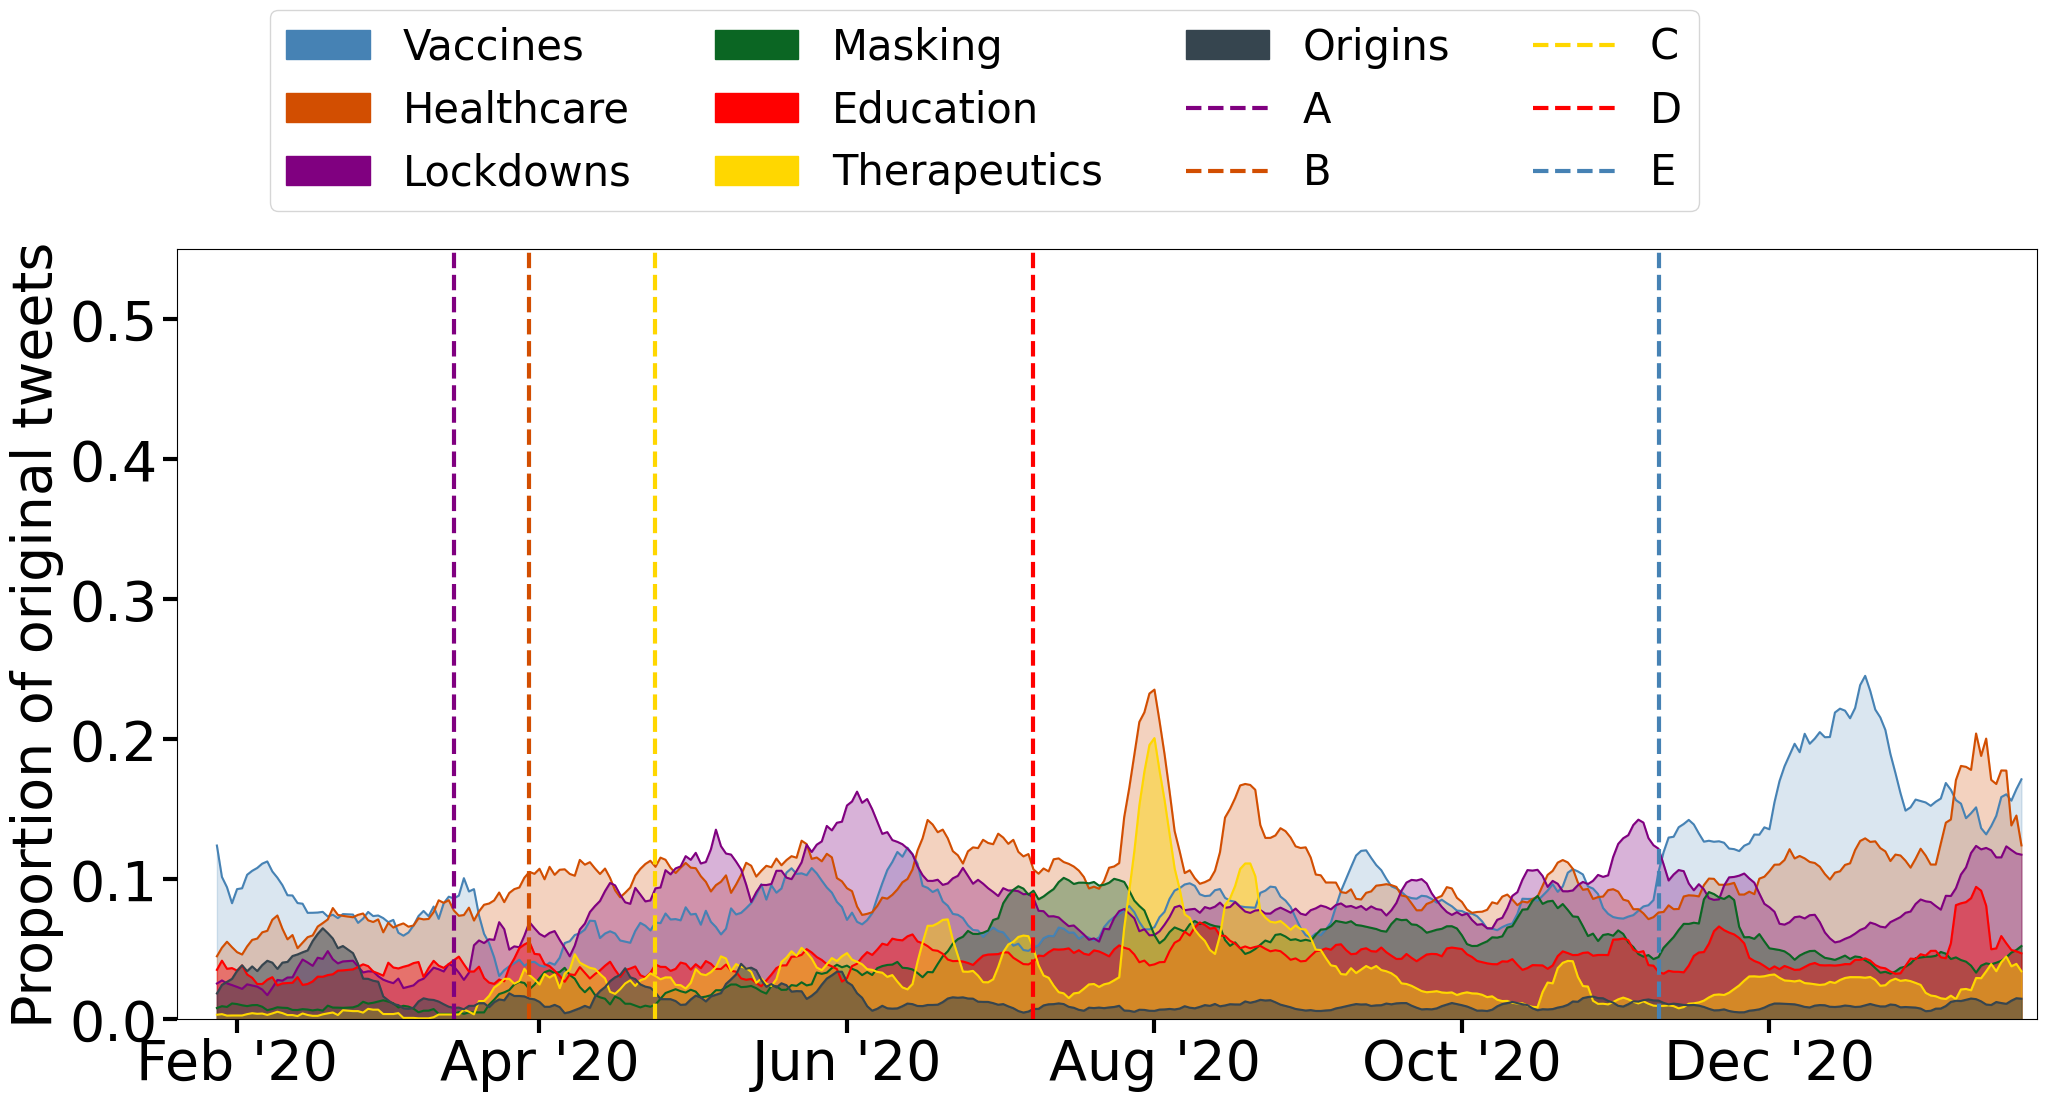

In [83]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.2
for c in order:
    plt.plot(pseudo_day_mean['date'],smooth(pseudo_day_mean[c]),color=color_dict[c])
    plt.fill_between(pseudo_day_mean['date'],smooth(pseudo_day_mean[c]),alpha=ct,label=c.capitalize(),color=color_dict[c])
    ct+=0.05
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(0.05,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('pseudo_phe_concern_activity.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [84]:
res=[]
for c in concerns:
    res.append([c,np.round(phe_aff[c].sum(),2),np.round(pseudo_aff[c].sum(),2),np.round(phe_aff[c].mean(),2),np.round(pseudo_aff[c].mean(),2)])
res_df=pd.DataFrame(columns=['Issue','Health Expert Total','Pseudo Expert Total','Pseudo Expert Prop.','Pseudo Expert Prop.'],data=res)
res_df

Issue  Health Expert Total  Pseudo Expert Total  \
0       origins                 3850                 1977   
1     lockdowns                21478                14546   
2       masking                24697                 9788   
3    healthcare                50941                19147   
4     education                31652                 7972   
5  therapeutics                 2372                 6444   
6      vaccines                40169                18410   

   Pseudo Expert Prop.  Pseudo Expert Prop.  
0                 0.01                 0.01  
1                 0.07                 0.08  
2                 0.07                 0.06  
3                 0.15                 0.11  
4                 0.10                 0.05  
5                 0.01                 0.04  
6                 0.12                 0.11

In [85]:
with pd.option_context("max_colwidth", 1000):
    print (res_df.to_latex())

\begin{tabular}{llrrrr}
\toprule
 & Issue & Health Expert Total & Pseudo Expert Total & Pseudo Expert Prop. & Pseudo Expert Prop. \\
\midrule
0 & origins & 3850 & 1977 & 0.010000 & 0.010000 \\
1 & lockdowns & 21478 & 14546 & 0.070000 & 0.080000 \\
2 & masking & 24697 & 9788 & 0.070000 & 0.060000 \\
3 & healthcare & 50941 & 19147 & 0.150000 & 0.110000 \\
4 & education & 31652 & 7972 & 0.100000 & 0.050000 \\
5 & therapeutics & 2372 & 6444 & 0.010000 & 0.040000 \\
6 & vaccines & 40169 & 18410 & 0.120000 & 0.110000 \\
\bottomrule
\end{tabular}



In [86]:
len(phe_aff),len(pseudo_aff)

(330209, 173123)

In [95]:
emotions

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness']

In [101]:
phe_data_dict={}
for c in tqdm(concerns):
    iss=phe_aff[phe_aff[c]==1]
    iss=iss[['str_date']+emotions+mfts]
    iss_ct=iss.groupby('str_date').sum().reset_index()
    ct=iss.groupby('str_date').size().reset_index(name='count')
    iss=iss_ct.merge(ct,on='str_date')
    phe_data_dict[c]=iss

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 14.61it/s]


In [102]:
pseudo_data_dict={}
for c in tqdm(concerns):
    iss=pseudo_aff[pseudo_aff[c]==1]
    iss=iss[['str_date']+emotions+mfts]
    iss_ct=iss.groupby('str_date').sum().reset_index()
    ct=iss.groupby('str_date').size().reset_index(name='count')
    iss=iss_ct.merge(ct,on='str_date')
    pseudo_data_dict[c]=iss

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 14.71it/s]


In [115]:
for c in phe_data_dict:
    phe_data_dict[c].to_csv('/effectcrawl/ashwin/Proposal_Data/phe_'+c+'.csv',index=False)
    pseudo_data_dict[c].to_csv('/effectcrawl/ashwin/Proposal_Data/pseudo_'+c+'.csv',index=False)

## Whose handles get expressed on certain moral attitudes

In [119]:
phe_day=phe_aff.groupby(['str_date','tweet_type']).size().reset_index(name='count')
pseudo_day=pseudo_aff.groupby(['str_date','tweet_type']).size().reset_index(name='count')

In [120]:
phe_day['date']=phe_day['str_date'].apply(pd.Timestamp)
pseudo_day['date']=pseudo_day['str_date'].apply(pd.Timestamp)

In [121]:
def smooth(x):
    return x.rolling(window=7).mean()

In [122]:
ls=['-','--','-.',':']

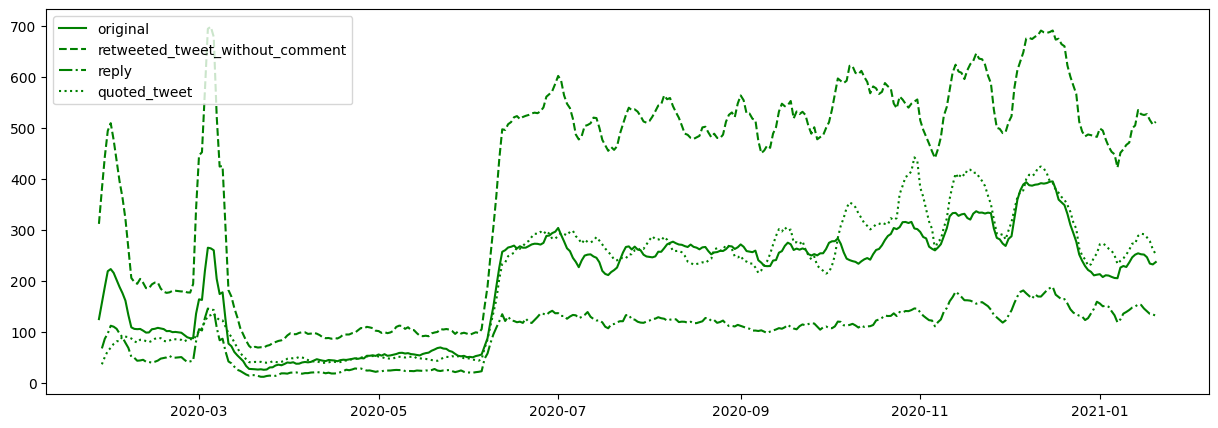

In [123]:
plt.figure(figsize=(15,5))
ct=0
for t in ['original','retweeted_tweet_without_comment','reply','quoted_tweet']:
    tmp=phe_day[phe_day['tweet_type']==t]
    plt.plot(tmp['date'],smooth(tmp['count']),color='green',linestyle=ls[ct],label=t)
    ct+=1
plt.legend()
plt.show()

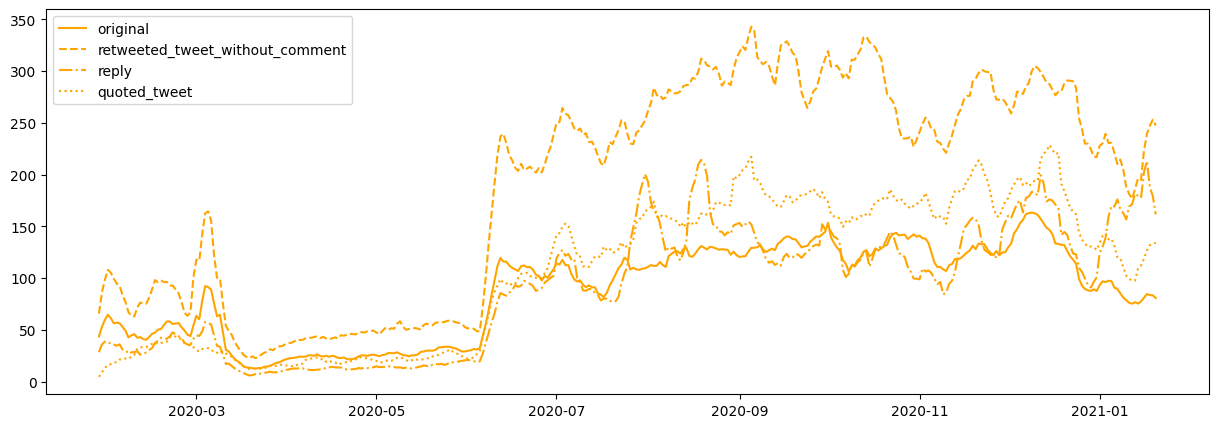

In [124]:
plt.figure(figsize=(15,5))
ct=0
for t in ['original','retweeted_tweet_without_comment','reply','quoted_tweet']:
    tmp=pseudo_day[pseudo_day['tweet_type']==t]
    plt.plot(tmp['date'],smooth(tmp['count']),color='orange',linestyle=ls[ct],label=t)
    ct+=1
plt.legend()
plt.show()

In [125]:
def get_str_id(x):
    try:
        return str(np.int64(x))
    except:
        return None

In [126]:
def binner(x):
    if x<0:
        return -1
    return 1

In [127]:
elite_df=pd.read_csv('./cleaned_elites.csv')
elite_df=elite_df[['screen_name','ideo','phi']]
# other=other[['screen_name','ideo','phi']]
# elite_df=pd.concat([elite_df,other],ignore_index=True)
# elite_df=elite_df.drop_duplicates(subset='screen_name')
# elite_df=elite_df.reset_index()
elite_df['screen_name']=elite_df['screen_name'].str.lower()
elite_df

screen_name   ideo       phi
0         _andyhowes   True -0.584329
1          _sjpeace_   True -0.883084
2        _sonofisaac   True -0.845320
3     _theghettomonk   True -0.846658
4      _waleedshahid   True -0.843254
...              ...    ...       ...
2017    zei_squirrel   True -0.852798
2018  zephyrteachout   True -0.815157
2019  zerlinamaxwell   True -0.859852
2020          zeynep   True -0.786310
2021     zigmanfreud  False  0.661510

[2022 rows x 3 columns]

In [128]:
elite_df['ideo']=elite_df['ideo'].map({True:-1,False:1})
lib_elites=elite_df[elite_df['ideo']==-1]['screen_name'].tolist()
con_elites=elite_df[elite_df['ideo']==1]['screen_name'].tolist()

In [129]:
elites=elite_df['screen_name'].tolist()

In [130]:
import string
def rem_punc(s):
    s=s.rstrip(string.punctuation)
    return s.lower()

In [131]:
def handler(x):
    x_arr=x.split()
    x_arr=[a.replace('@','') for a in x_arr if a.startswith('@')]
    x_arr=[a.strip() for a in x_arr]
    if not x.startswith('RT'):
        return [rem_punc(a) for a in x_arr if rem_punc(a) in elites]
    else:
        return [rem_punc(a) for a in x_arr if rem_punc(a) in elites][1:]

In [132]:
phe_aff['handles']=phe_aff['text'].progress_apply(handler)
pseudo_aff['handles']=pseudo_aff['text'].progress_apply(handler)

100%|██████████| 330209/330209 [00:13<00:00, 25097.17it/s]
<ipython-input-132-6360276a2096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['handles']=phe_aff['text'].progress_apply(handler)
100%|██████████| 173123/173123 [00:07<00:00, 23713.05it/s]
<ipython-input-132-6360276a2096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['handles']=pseudo_aff['text'].progress_apply(handler)


In [133]:
phe_aff['len']=phe_aff['handles'].apply(len)
pseudo_aff['len']=pseudo_aff['handles'].apply(len)

<ipython-input-133-a5488b1f8c26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['len']=phe_aff['handles'].apply(len)
<ipython-input-133-a5488b1f8c26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['len']=pseudo_aff['handles'].apply(len)


In [134]:
def get_lib(li):
    if len(li)>0:
        li=[l for l in li if l in lib_elites]
        if len(li)>0:
            return len(li)
    return 0
def get_con(li):
    if len(li)>0:
        li=[l for l in li if l in con_elites]
        if len(li)>0:
            return len(li)
    return 0

In [135]:
phe_aff['lib_flag']=phe_aff['handles'].apply(get_lib)
phe_aff['con_flag']=phe_aff['handles'].apply(get_con)
phe_aff['date']=phe_aff['str_date'].apply(pd.Timestamp)
phe_aff_lib=phe_aff[phe_aff['lib_flag']>phe_aff['con_flag']]
phe_aff_con=phe_aff[phe_aff['lib_flag']<phe_aff['con_flag']]

<ipython-input-135-7492879e78ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['lib_flag']=phe_aff['handles'].apply(get_lib)
<ipython-input-135-7492879e78ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['con_flag']=phe_aff['handles'].apply(get_con)
<ipython-input-135-7492879e78ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [136]:
# phe_aff_lib=phe_aff_lib[phe_aff_lib['tweet_type']=='original']
# phe_aff_con=phe_aff_con[phe_aff_con['tweet_type']=='original']

In [137]:
pseudo_aff['lib_flag']=pseudo_aff['handles'].apply(get_lib)
pseudo_aff['con_flag']=pseudo_aff['handles'].apply(get_con)
pseudo_aff['date']=pseudo_aff['str_date'].apply(pd.Timestamp)
ignore=['gatewaypundit','joshrogin','Sheril_','apsmunro','DrCJohns','BallouxFrancois','APatientXchange','Mkennedycuomo','paulg','PulmCrit','Mike_Pence']
pseudo_aff=pseudo_aff[~pseudo_aff['screen_name'].isin(ignore)]
pseudo_aff_lib=pseudo_aff[pseudo_aff['lib_flag']>pseudo_aff['con_flag']]
pseudo_aff_con=pseudo_aff[pseudo_aff['lib_flag']<pseudo_aff['con_flag']]

<ipython-input-137-b69848e680b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['lib_flag']=pseudo_aff['handles'].apply(get_lib)
<ipython-input-137-b69848e680b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['con_flag']=pseudo_aff['handles'].apply(get_con)
<ipython-input-137-b69848e680b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [138]:
# pseudo_aff_lib=pseudo_aff_lib[pseudo_aff_lib['tweet_type']=='original']
# pseudo_aff_con=pseudo_aff_con[pseudo_aff_con['tweet_type']=='original']

In [139]:
interactions=['PHE-Lib','PHE-Con']

data_li=[phe_aff_lib,phe_aff_con]
tmp_li=[]
for a in emotions+mfts:
    ct=0
    for d in data_li:
        tmp=pd.DataFrame()
        tmp['value']=d[a].tolist()
        tmp['affect']=a
        tmp['interaction']=interactions[ct]
        tmp_li.append(tmp[['affect','value','interaction']])
        ct+=1

In [140]:
tmp0=pd.concat(tmp_li,ignore_index=True)
tmp0

affect  value interaction
0             anger      0     PHE-Lib
1             anger      0     PHE-Lib
2             anger      0     PHE-Lib
3             anger      0     PHE-Lib
4             anger      1     PHE-Lib
...             ...    ...         ...
261910  degradation      0     PHE-Con
261911  degradation      0     PHE-Con
261912  degradation      0     PHE-Con
261913  degradation      0     PHE-Con
261914  degradation      0     PHE-Con

[261915 rows x 3 columns]

In [141]:
interactions=['Pseudo-Lib','Pseudo-Con']

data_li=[pseudo_aff_lib,pseudo_aff_con]
tmp_li=[]
for a in emotions+mfts:
    ct=0
    for d in data_li:
        tmp=pd.DataFrame()
        tmp['value']=d[a].tolist()
        tmp['affect']=a
        tmp['interaction']=interactions[ct]
        tmp_li.append(tmp[['affect','value','interaction']])
        ct+=1

In [142]:
tmp1=pd.concat(tmp_li,ignore_index=True)
tmp1

affect  value interaction
0             anger      0  Pseudo-Lib
1             anger      1  Pseudo-Lib
2             anger      0  Pseudo-Lib
3             anger      0  Pseudo-Lib
4             anger      0  Pseudo-Lib
...             ...    ...         ...
138961  degradation      0  Pseudo-Con
138962  degradation      0  Pseudo-Con
138963  degradation      0  Pseudo-Con
138964  degradation      0  Pseudo-Con
138965  degradation      0  Pseudo-Con

[138966 rows x 3 columns]

In [143]:
tmp_res=pd.concat([tmp0,tmp1],ignore_index=True)
tmp_res

affect  value interaction
0             anger      0     PHE-Lib
1             anger      0     PHE-Lib
2             anger      0     PHE-Lib
3             anger      0     PHE-Lib
4             anger      1     PHE-Lib
...             ...    ...         ...
400876  degradation      0  Pseudo-Con
400877  degradation      0  Pseudo-Con
400878  degradation      0  Pseudo-Con
400879  degradation      0  Pseudo-Con
400880  degradation      0  Pseudo-Con

[400881 rows x 3 columns]

<ipython-input-144-099ea0c29d12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['affect']=sub['affect'].str.title()


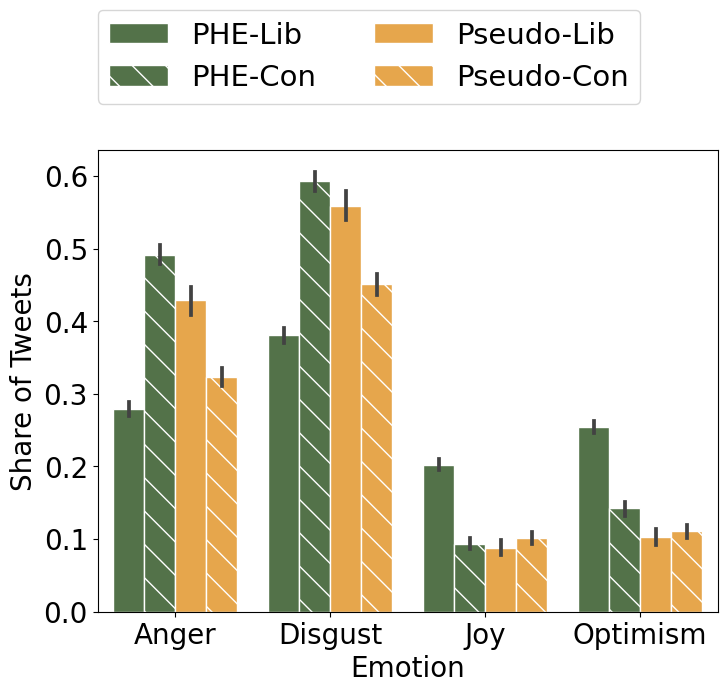

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

sub=tmp_res[tmp_res['affect'].isin(['anger','disgust','joy','optimism'])]
plt.figure(figsize=(8,6))
sub['affect']=sub['affect'].str.title()
bar=sns.barplot(data=sub, y='value', x='affect', hue='interaction',palette=['#4F7942','#4F7942','#FFAA33','#FFAA33'])
hatches = ['-','\\']
bc=0
for i,thisbar in enumerate(bar.patches):
    if i in [4,5,6,7,12,13,14,15]:
        thisbar.set_hatch(hatches[1])
        thisbar.set_edgecolor('white')
    else:
        thisbar.set_edgecolor('white')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Share of Tweets',fontsize=20)
plt.xlabel('Emotion',fontsize=20)
plt.legend(loc=(0,1.1),ncols=2,fontsize=21)
plt.grid(False)
plt.savefig('compare_lib_con.pdf',dpi=300,bbox_inches='tight')
plt.show()

<ipython-input-145-797ff63160c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['affect']=sub['affect'].str.title()


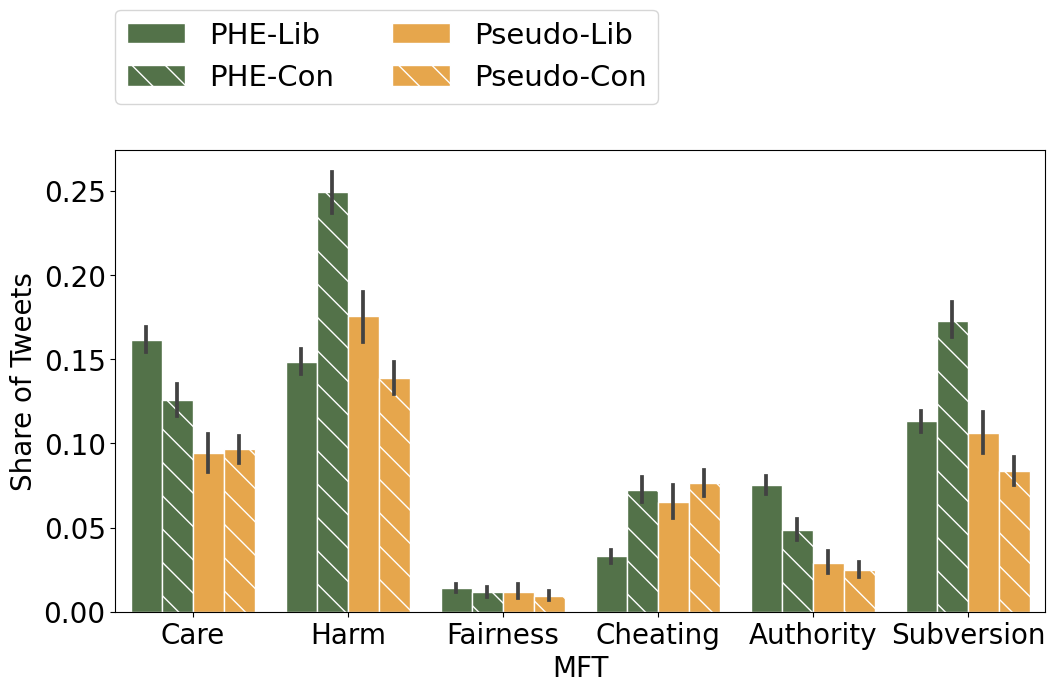

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
sub=tmp_res[tmp_res['affect'].isin(['care','harm','fairness','cheating','authority','subversion'])]
plt.figure(figsize=(12,6))
sub['affect']=sub['affect'].str.title()
bar=sns.barplot(data=sub, y='value', x='affect', hue='interaction',palette=['#4F7942','#4F7942','#FFAA33','#FFAA33'])
hatches = ['\\']
bc=0
for i,thisbar in enumerate(bar.patches):
    if i in [6,7,8,9,10,11,18,19,20,21,22,23]:
        thisbar.set_hatch(hatches[0])
        thisbar.set_edgecolor('white')
    else:
        thisbar.set_edgecolor('white')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Share of Tweets',fontsize=20)
plt.xlabel('MFT',fontsize=20)
plt.legend(loc=(0,1.1),ncols=2,fontsize=21)
plt.savefig('compare_lib_con_mft.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [146]:
phe_joy=phe_aff[(phe_aff['joy']==1)|(phe_aff['optimism']==1)]['handles'].tolist()
phe_joy=[b for a in phe_joy for b in a]
phe_angry=phe_aff[(phe_aff['anger']==1)|(phe_aff['disgust']==1)]['handles'].tolist()
phe_angry=[b for a in phe_angry for b in a]

In [147]:
pseudo_joy=pseudo_aff[(pseudo_aff['joy']==1)|(pseudo_aff['optimism']==1)]['handles'].tolist()
pseudo_joy=[b for a in pseudo_joy for b in a]
pseudo_angry=pseudo_aff[(pseudo_aff['anger']==1)|(pseudo_aff['disgust']==1)]['handles'].tolist()
pseudo_angry=[b for a in pseudo_angry for b in a]

In [148]:
phe_virtue=phe_aff[(phe_aff['care']==1)|(phe_aff['fairness']==1)|(phe_aff['authority']==1)|(phe_aff['loyalty']==1)]['handles'].tolist()
phe_virtue=[b for a in phe_virtue for b in a]
phe_vice=phe_aff[(phe_aff['harm']==1)|(phe_aff['cheating']==1)|(phe_aff['subversion']==1)|(phe_aff['betrayal']==1)]['handles'].tolist()
phe_vice=[b for a in phe_vice for b in a]

In [149]:
pseudo_virtue=pseudo_aff[(pseudo_aff['care']==1)|(pseudo_aff['fairness']==1)|(pseudo_aff['authority']==1)|(pseudo_aff['loyalty']==1)]['handles'].tolist()
pseudo_virtue=[b for a in pseudo_virtue for b in a]
pseudo_vice=pseudo_aff[(pseudo_aff['harm']==1)|(pseudo_aff['cheating']==1)|(pseudo_aff['subversion']==1)|(pseudo_aff['betrayal']==1)]['handles'].tolist()
pseudo_vice=[b for a in pseudo_vice for b in a]

In [150]:
from collections import Counter
import math
def calculate_log_odds(list1, list2, min_occurrence=50):
    # Count occurrences of elements in both lists
    counter1 = Counter(list1)
    counter2 = Counter(list2)

    # Get unique elements from both lists
    all_elements = set(list1 + list2)

    log_odds = {}

    for element in all_elements:
        # Check if occurrence is above the minimum threshold
        if counter1.get(element, 0) < min_occurrence or counter2.get(element, 0) < min_occurrence:
            continue

        # Calculate probability of occurrence for each element in both lists
        p1 = counter1[element] / len(list1)
        p2 = counter2[element] / len(list2)

        # Calculate log odds of occurrence
        if p1 == 0:
            p1 = 0.0001
        if p2 == 0:
            p2 = 0.0001

        log_odds[element] = math.log(p1 / p2)

    return log_odds


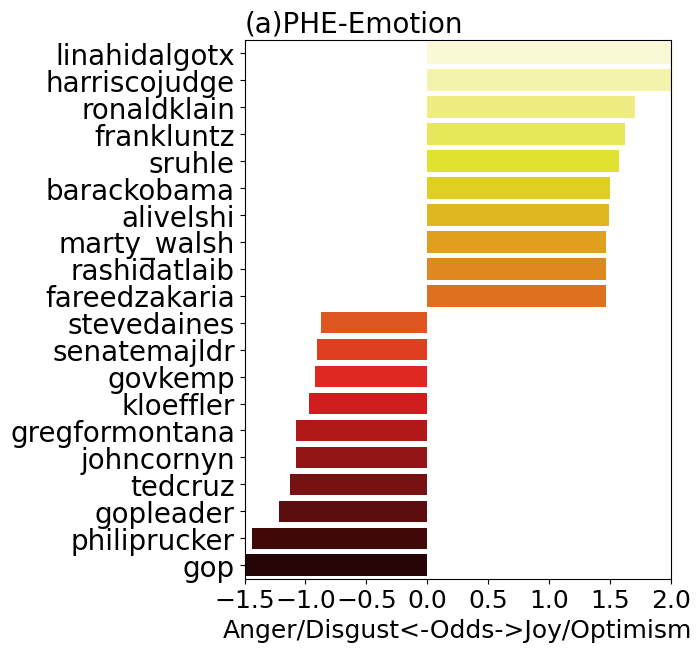

In [151]:
log_odds = calculate_log_odds(phe_joy, phe_angry, min_occurrence=5)
log_odds=dict(Counter(log_odds).most_common()[:10]+Counter(log_odds).most_common()[-10:])
plt.figure(figsize=(5.5, 7))
sns.barplot(list(log_odds.values()), list(log_odds.keys()), palette='hot_r')
plt.title('(a)PHE-Emotion',fontsize=20,loc='left')
plt.xticks(rotation=0)
plt.yticks(fontsize=20)
plt.xlim([-1.5,2])
plt.xticks(fontsize=18)
#plt.xticks([-1.5,-0.75,0,0.75,1.5],fontsize=20)
plt.xlabel('Anger/Disgust<-Odds->Joy/Optimism',fontsize=18)
plt.savefig('phe_emotion_odds.pdf',dpi=300,bbox_inches='tight')
plt.show()

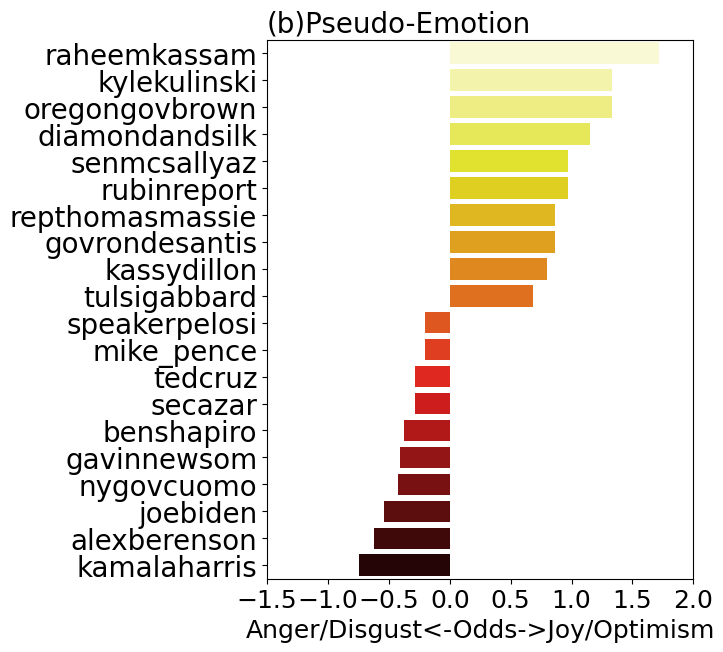

In [152]:
log_odds = calculate_log_odds(pseudo_joy, pseudo_angry, min_occurrence=5)
log_odds=dict(Counter(log_odds).most_common()[:10]+Counter(log_odds).most_common()[-10:])
plt.figure(figsize=(5.5, 7))
sns.barplot(list(log_odds.values()), list(log_odds.keys()), palette='hot_r')
plt.xticks(rotation=0)
plt.title('(b)Pseudo-Emotion',fontsize=20,loc='left')
plt.yticks(fontsize=20)
plt.xlim([-1.5,2])
plt.xticks(fontsize=18)
# plt.xticks([-1.5,-0.75,0,0.75,1.5],fontsize=20)
plt.xlabel('Anger/Disgust<-Odds->Joy/Optimism',fontsize=18)
plt.savefig('pseudo_emotion_odds.pdf',dpi=300,bbox_inches='tight')
plt.show()


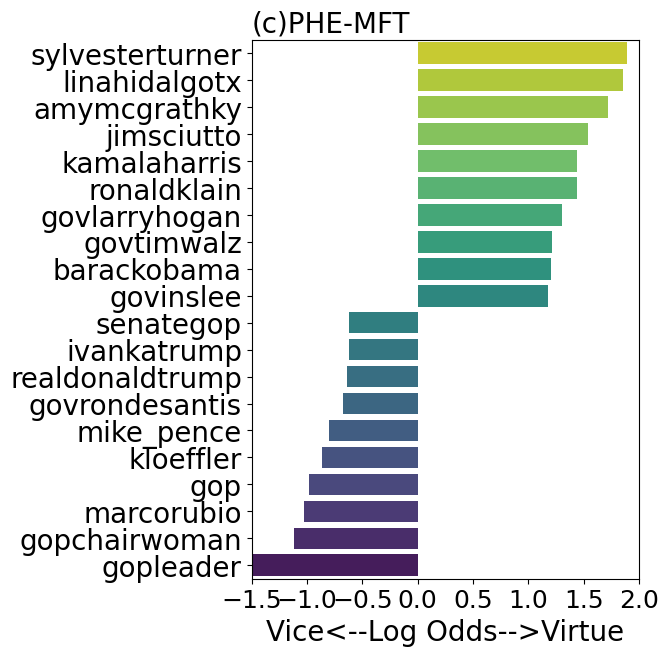

In [153]:
log_odds = calculate_log_odds(phe_virtue, phe_vice, min_occurrence=5)
log_odds=dict(Counter(log_odds).most_common()[:10]+Counter(log_odds).most_common()[-10:])
plt.figure(figsize=(5, 7))
sns.barplot(list(log_odds.values()), list(log_odds.keys()), palette='viridis_r')
plt.xticks(rotation=0)
plt.title('(c)PHE-MFT',fontsize=20,loc='left')
plt.yticks(fontsize=20)
plt.xlim([-1.5,2])
plt.xticks(fontsize=18)
plt.xlabel('Vice<--Log Odds-->Virtue',fontsize=20)
plt.savefig('phe_mft_odds.pdf',dpi=300,bbox_inches='tight')
plt.show()

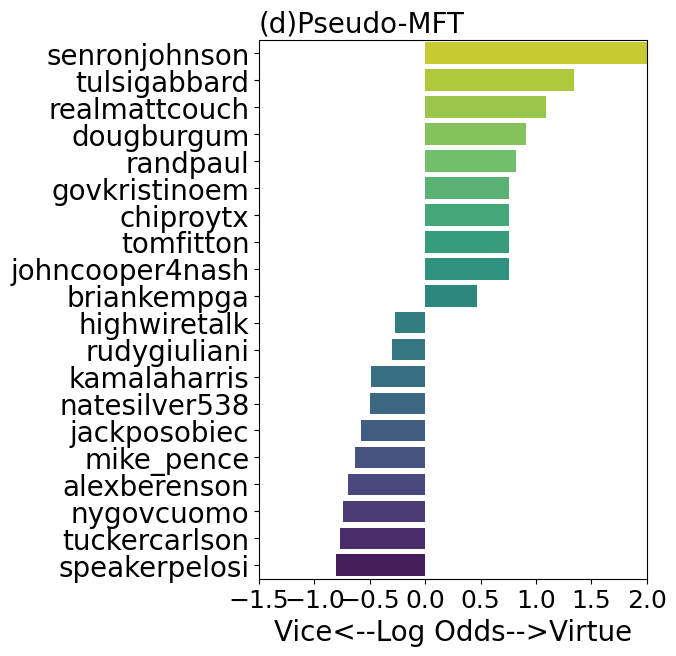

In [154]:
log_odds = calculate_log_odds(pseudo_virtue, pseudo_vice, min_occurrence=5)
log_odds=dict(Counter(log_odds).most_common()[:10]+Counter(log_odds).most_common()[-10:])
plt.figure(figsize=(5, 7))
sns.barplot(list(log_odds.values()), list(log_odds.keys()), palette='viridis_r')
plt.xticks(rotation=0)
plt.title('(d)Pseudo-MFT',fontsize=20,loc='left')
plt.yticks(fontsize=20)
plt.xlim([-1.5,2])
plt.xticks(fontsize=18)
plt.xlabel('Vice<--Log Odds-->Virtue',fontsize=20)
plt.savefig('pseudo_mft_odds.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Retweet Network

## Issue Discussions

In [148]:
concern_tweets={}
for c in tqdm(concerns):
    phe_tweets=phe_aff[phe_aff[c]==1].sample(n=25,random_state=50)['text'].tolist()
    pseudo_tweets=pseudo_aff[pseudo_aff[c]==1].sample(n=25,random_state=50)['text'].tolist()
    phe_tweets=[deep_clean(x) for x in phe_tweets]
    pseudo_tweets_tweets=[deep_clean(x) for x in pseudo_tweets]
    phe_tweets='.'.join(phe_tweets)
    pseudo_tweets='.'.join(pseudo_tweets)
    concern_tweets[c]={'phe':phe_tweets.replace('\\','').replace('"',''),'pseudo':pseudo_tweets.replace('\\','').replace('"','')}

100%|██████████| 7/7 [00:01<00:00,  3.75it/s]


In [150]:
gpt_results={'vaccines':{
    'pseudo':"The tweets cover a wide range of perspectives and concerns about vaccines, including adverse reactions, skepticism about their effectiveness and safety, potential long-term risks, concerns about coercion, and issues with data integrity in clinical trials. Some highlight specific incidents of adverse reactions or alleged vaccine-related deaths, while others express skepticism about the motives of pharmaceutical companies and government policies regarding vaccination. There's also discussion about the efficacy of vaccines, potential side effects, and ongoing research and testing.",
    'phe':"The tweets cover a wide range of perspectives on COVID-19 vaccines, including discussions about vaccine effectiveness, breakthrough cases, concerns about vaccine distribution, and misinformation. They highlight instances of vaccine hesitancy, breakthrough infections among unvaccinated individuals, and the importance of vaccination for pregnant individuals. Additionally, there are discussions about vaccine mandates for healthcare workers and the potential need for booster vaccines. The tweets also address concerns about vaccine safety, including debunking myths about vaccine impact on fertility and clarifying the absence of evidence regarding vaccine-related adverse effects."
},
    'masking':{
        'pseudo':"The tweets present a variety of opinions and arguments regarding the effectiveness, necessity, and societal impact of wearing masks. Most tweets express skepticism about the efficacy of masks in preventing the spread of COVID-19, citing studies and personal beliefs. Others criticize mask mandates and question the motives behind enforcing them, while some highlight instances of mask enforcement or incidents related to mask-wearing. Additionally, there are mentions of government policies and public health recommendations regarding mask-wearing, as well as discussions about individual freedoms and government overreach.",
        'phe': "The tweets highlight various perspectives and discussions surrounding the use of masks in the context of the COVID-19 pandemic. Some tweets report on individuals testing positive for the virus and emphasize the importance of continued mask-wearing and social distancing measures to mitigate the spread of COVID-19. Others mention the effectiveness of masks in preventing transmission and advocate for their widespread use, especially in areas with high transmission rates or among unvaccinated individuals. Additionally, there are mentions of policy changes regarding mask mandates in schools and public spaces, as well as discussions about the potential impact of mask-wearing on reducing COVID-19 deaths. Overall, the tweets reflect ongoing debates and efforts to promote mask usage as a preventive measure against COVID-19."
    },
    
    'lockdowns':{
        'pseudo':"Some tweets criticize lockdowns, calling them ineffective and highlighting instances where they have been ruled unconstitutional or have failed to prevent the spread of the virus. Others question the necessity of lockdowns and suggest that they have negative effects on children's health and well-being. Additionally, there are mentions of politicians signaling that lockdowns are not on the table for future measures and instances where lockdowns have been lifted or challenged. Overall, the tweets reflect ongoing debates and skepticism surrounding the effectiveness and consequences of lockdown measures.",
        'phe':'tweets primarily focus on various aspects of pandemic response, including the reopening of schools, concerns about COVID-19 cases and variants, calls for continued vigilance, updates on cases, and recommendations for safety measures like mask-wearing and social distancing.'
    },
             
    'education':{
        'pseudo':"They discuss the impacts of school closures and remote learning on students, highlighting concerns about academic setbacks, mental health issues, and the effectiveness of virtual education. Debates arise regarding the reopening of schools, with differing opinions on the risks involved and the appropriate measures needed to ensure safety. Additionally, there are critiques of teachers' unions, government policies, and media coverage related to education during the pandemic. Overall, the tweets reflect the complex and polarizing discussions surrounding education and online schooling amidst the ongoing public health crisis.",
        'phe':"They cover various aspects such as the challenges faced by schools in reopening safely, debates surrounding COVID-19 safety protocols in schools, and the impact of the pandemic on students' education and well-being. Concerns about COVID-19 outbreaks in educational institutions, the efficacy of symptom-based screening in containing outbreaks, and the effectiveness of COVID-19 vaccines in preventing severe illness among students are also highlighted. Additionally, there are discussions about the need for innovative solutions to address the educational challenges posed by the pandemic and the importance of prioritizing students' safety and well-being in decision-making processes."
    },
             
    'therapeutics':{
        'pseudo':"Some sources advocate for their use, citing studies and trials that suggest their effectiveness in treating COVID-19. They argue that HCQ, when combined with zinc and azithromycin, has shown positive outcomes in reducing hospitalizations and mortality rates. Similarly, ivermectin is promoted as a potential treatment, with proponents highlighting its benefits in preventing and treating COVID-19 infections, particularly when administered alongside other medications. These proponents criticize media censorship and bureaucratic obstruction of these treatments, emphasizing the need for further research and widespread adoption. Conversely, skeptics caution against relying solely on HCQ and ivermectin, noting the lack of conclusive evidence supporting their efficacy.",
        'phe':"These tweets caution against their widespread adoption due to insufficient scientific support and potential risks. Instances of misinformation and controversy, such as the promotion of unproven treatments like oleandrin and the widespread use of ivermectin in veterinary medicine, are also highlighted. Additionally, there are warnings against self-administering medications like dexamethasone without medical supervision, as well as calls for responsible reporting and adherence to evidence-based practices in treating COVID-19."
    },
    
    'origins':{
        'pseudo':"Some individuals and sources express skepticism about the official narrative, questioning the likelihood of the virus originating naturally and suggesting the possibility of a lab leak or intentional release. Criticism is directed towards individuals like Peter Daszak, who have ties to controversial experiments in China and are involved in investigating the virus's origins. There are also concerns raised about potential conflicts of interest and the credibility of investigations led by organizations like the WHO. Some voices call for thorough investigations into the origins of the virus, advocating for sanctions on Chinese research institutions and funding restrictions on certain types of research until a full investigation is conducted",
        'phe':"Individuals express skepticism about the virus originating from natural zoonotic transmission, citing former CDC Director Dr. Redfield's doubts and concerns about the virus's efficient human-to-human transmission. Others advocate for thorough investigations into the origins of emerging diseases like COVID-19, recognizing the importance of understanding the source to prevent future pandemics. "
    },
             
    'healthcare':{
        'pseudo':"Some tweets highlight success stories and alternative treatments, such as Mexico City's distribution of IVM kits and Swiss doctor Klaus Schustereder's home treatment approach. Others express skepticism or criticism of mainstream approaches, including concerns about vaccine efficacy, medical ethics violations, and government directives. There are also mentions of specific incidents, such as lawsuits over clinical trial reactions and the controversial directive in New York to return COVID-positive patients to nursing homes.",
        'phe':" Some emphasize the effectiveness of vaccines in reducing the risk of severe illness and death, while others discuss concerns about long COVID and the potential impact on public health. There are also mentions of challenges faced by healthcare workers, such as infections among medical staff and the importance of vaccinating frontline providers. Additionally, the tweets touch on issues related to pandemic communication, hospital capacity, and vaccination efforts in different regions."
    }
             
}

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [151]:
gpt_results

{'vaccines': {'pseudo': "The tweets cover a wide range of perspectives and concerns about vaccines, including adverse reactions, skepticism about their effectiveness and safety, potential long-term risks, concerns about coercion, and issues with data integrity in clinical trials. Some highlight specific incidents of adverse reactions or alleged vaccine-related deaths, while others express skepticism about the motives of pharmaceutical companies and government policies regarding vaccination. There's also discussion about the efficacy of vaccines, potential side effects, and ongoing research and testing.",
  'phe': 'The tweets cover a wide range of perspectives on COVID-19 vaccines, including discussions about vaccine effectiveness, breakthrough cases, concerns about vaccine distribution, and misinformation. They highlight instances of vaccine hesitancy, breakthrough infections among unvaccinated individuals, and the importance of vaccination for pregnant individuals. Additionally, there

In [ ]:
gpt_df=pd.DataFrame(columns=['Issue','Health Experts','Pseudo Experts'])
gpt_df['Issue']=list(gpt_results.keys())

l1=[]
l2=[]
for c in gpt_results:
    l1.append(gpt_results[c]['phe'])
    l2.append(gpt_results[c]['pseudo'])
gpt_df['Health Experts']=l1
gpt_df['Pseudo Experts']=l2
gpt_df

In [ ]:
with pd.option_context("max_colwidth", 1000):
    print (gpt_df.to_latex())

## Positive Emotions

In [161]:
positive_emo=['anticipation',
 'joy',
 'love',
 'optimism']

In [162]:
color_dict={
    'anticipation':'#2E3F53',
    'optimism':'#EED9C4',
    'joy':'orange',
    'love':'#FF69B4'
}

<ipython-input-163-971ad8b5f334>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


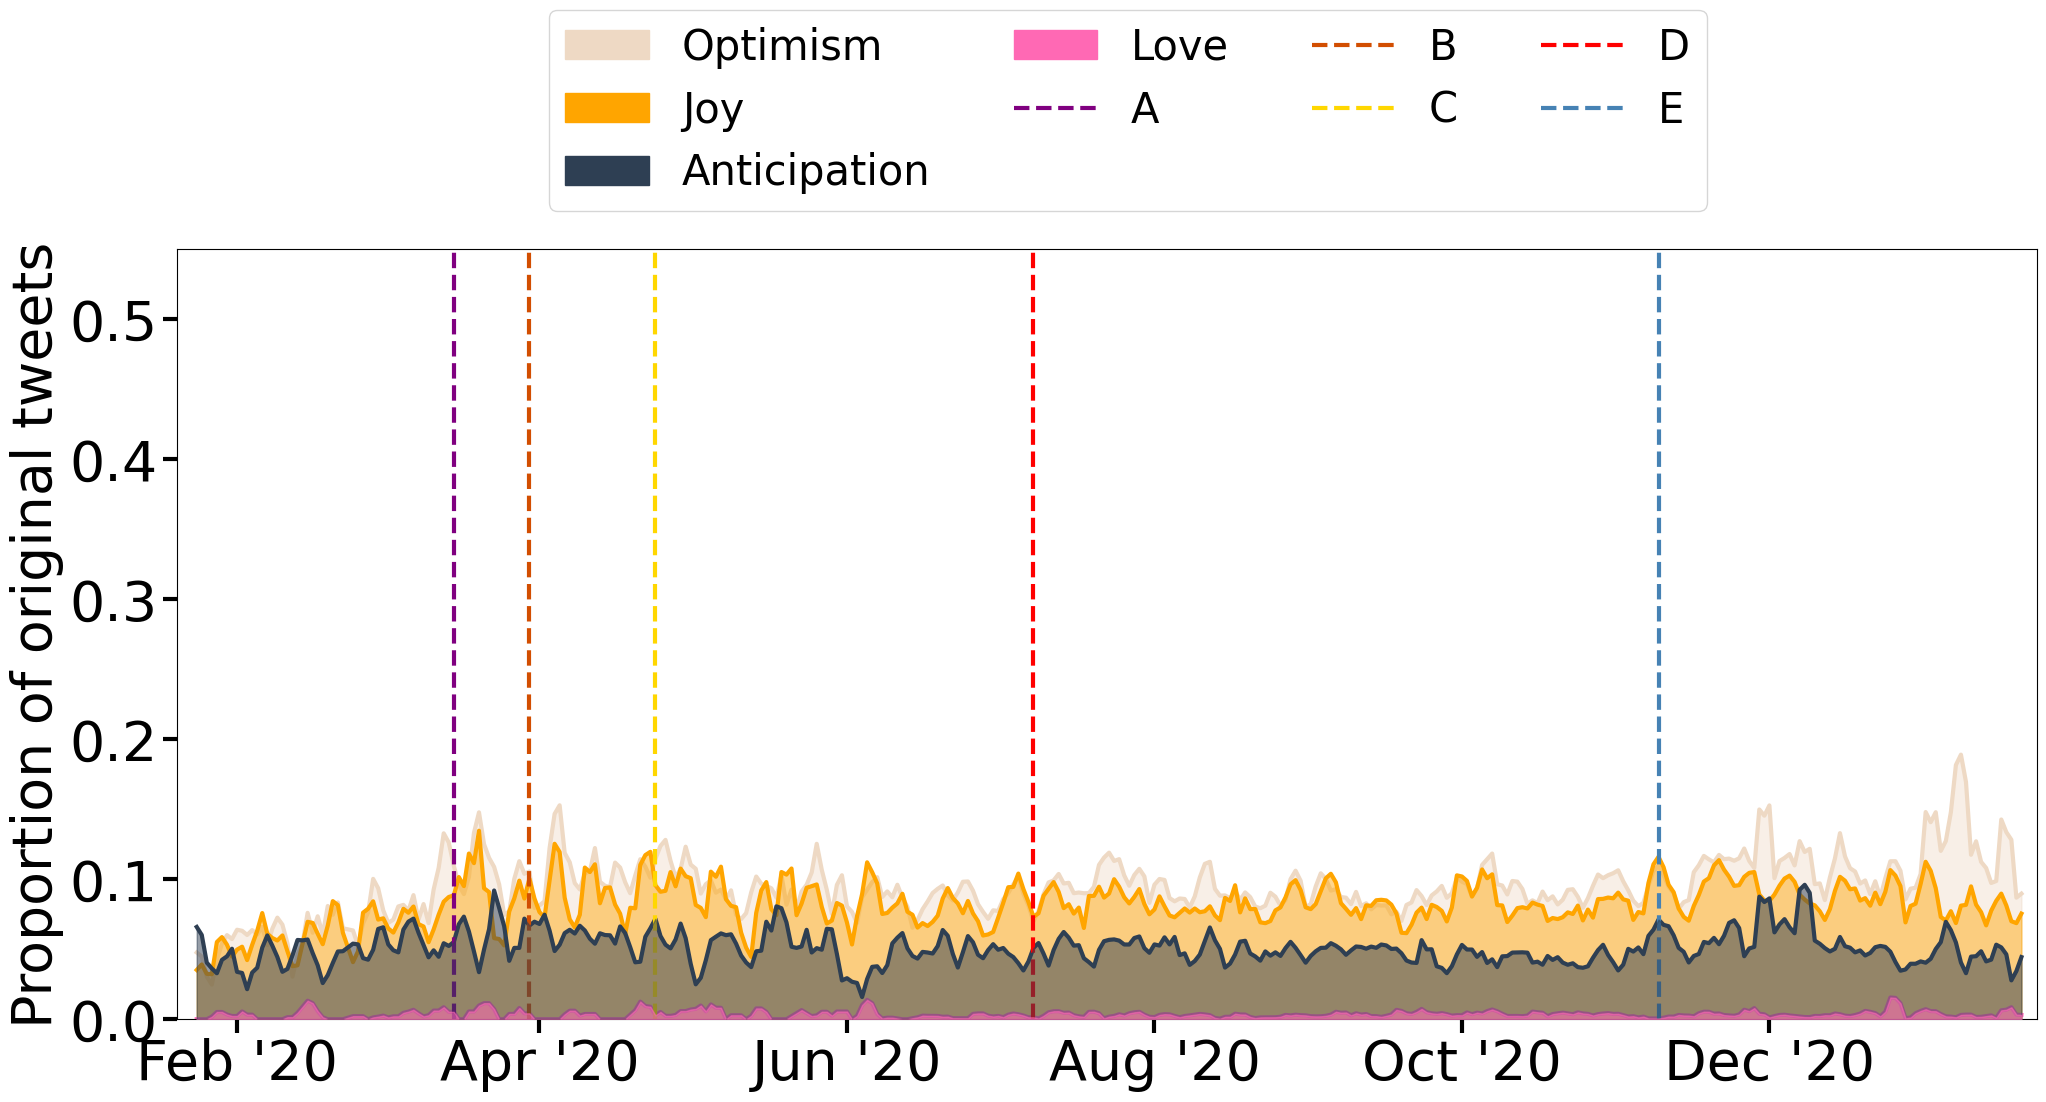

In [163]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in ['optimism','joy','anticipation','love']:
    plt.plot(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),lw=3,color=color_dict[c])
    plt.fill_between(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('pseudo_phe_emotions_positive_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Negative emotions

In [164]:
negative_emo=['disgust',
 'anger',
 'sadness',
 'fear',
 'pessimism']

In [165]:
color_dict={
    'disgust':'#D1B000',
    'fear':'#40E0D0',
    'sadness':'purple',
    'anger':'#D2042D',
    'pessimism':'#006666'
}

<ipython-input-166-77170979a37c>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


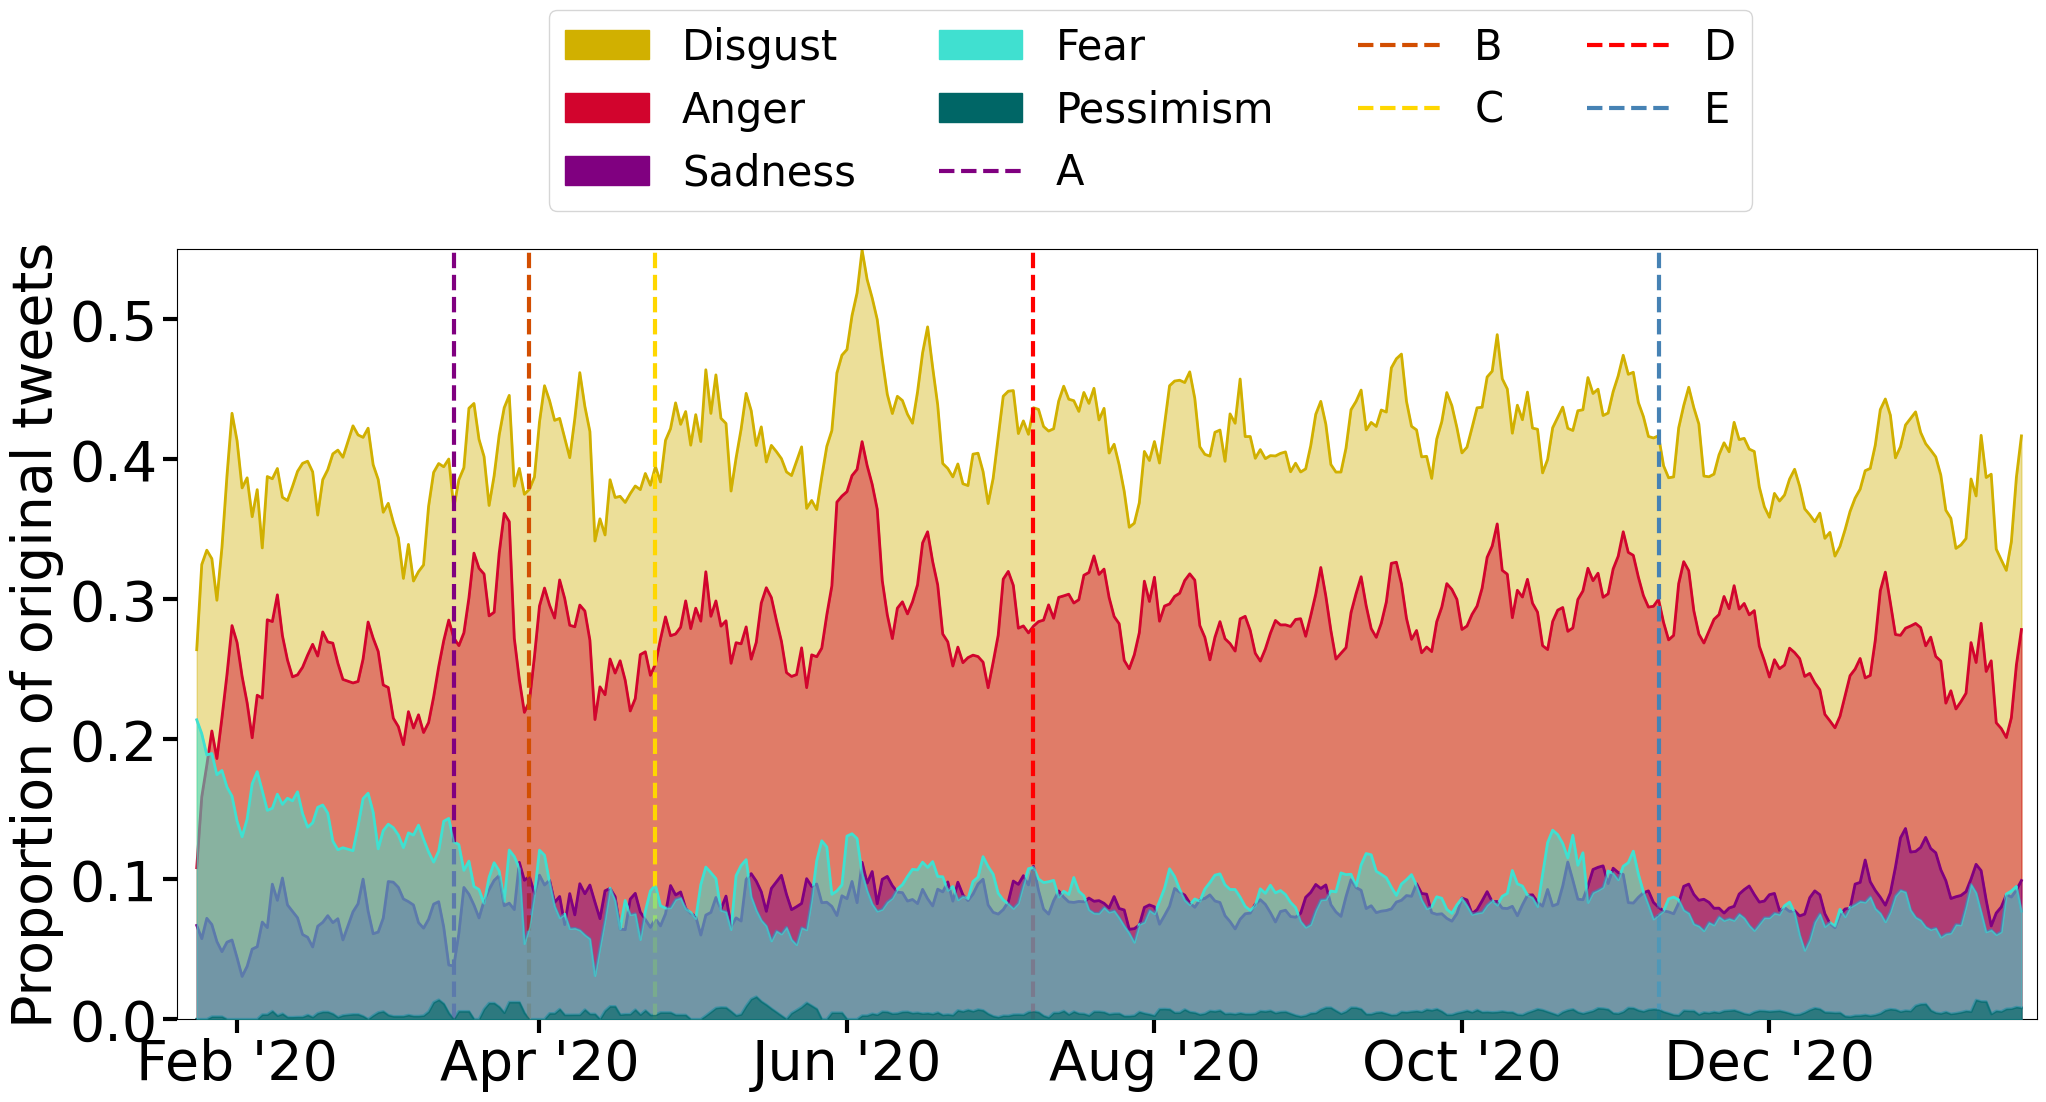

In [166]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in negative_emo:
    plt.plot(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),lw=2,color=color_dict[c])
    plt.fill_between(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
#plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
#plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.55)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('pseudo_phe_emotions_negative_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Moral Foundations

In [167]:
mfts=['care',
 'harm',
 'fairness',
 'cheating',
 'loyalty',
 'betrayal',
 'authority',
 'subversion',
 'purity',
 'degradation']

pos_mft=['care',
         'loyalty',
         'authority',
         'purity',
                'fairness']

neg_mft=[ 'harm',
 'subversion',
 'cheating',
 'betrayal',
 'degradation']


In [168]:
color_dict={
    'care':'#2E3F53',
    'fairness':'#EED9C4',
    'authority':'orange',
    'loyalty':'#FF69B4',
    'purity':'brown'
}

<ipython-input-169-c8c0f83bea65>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


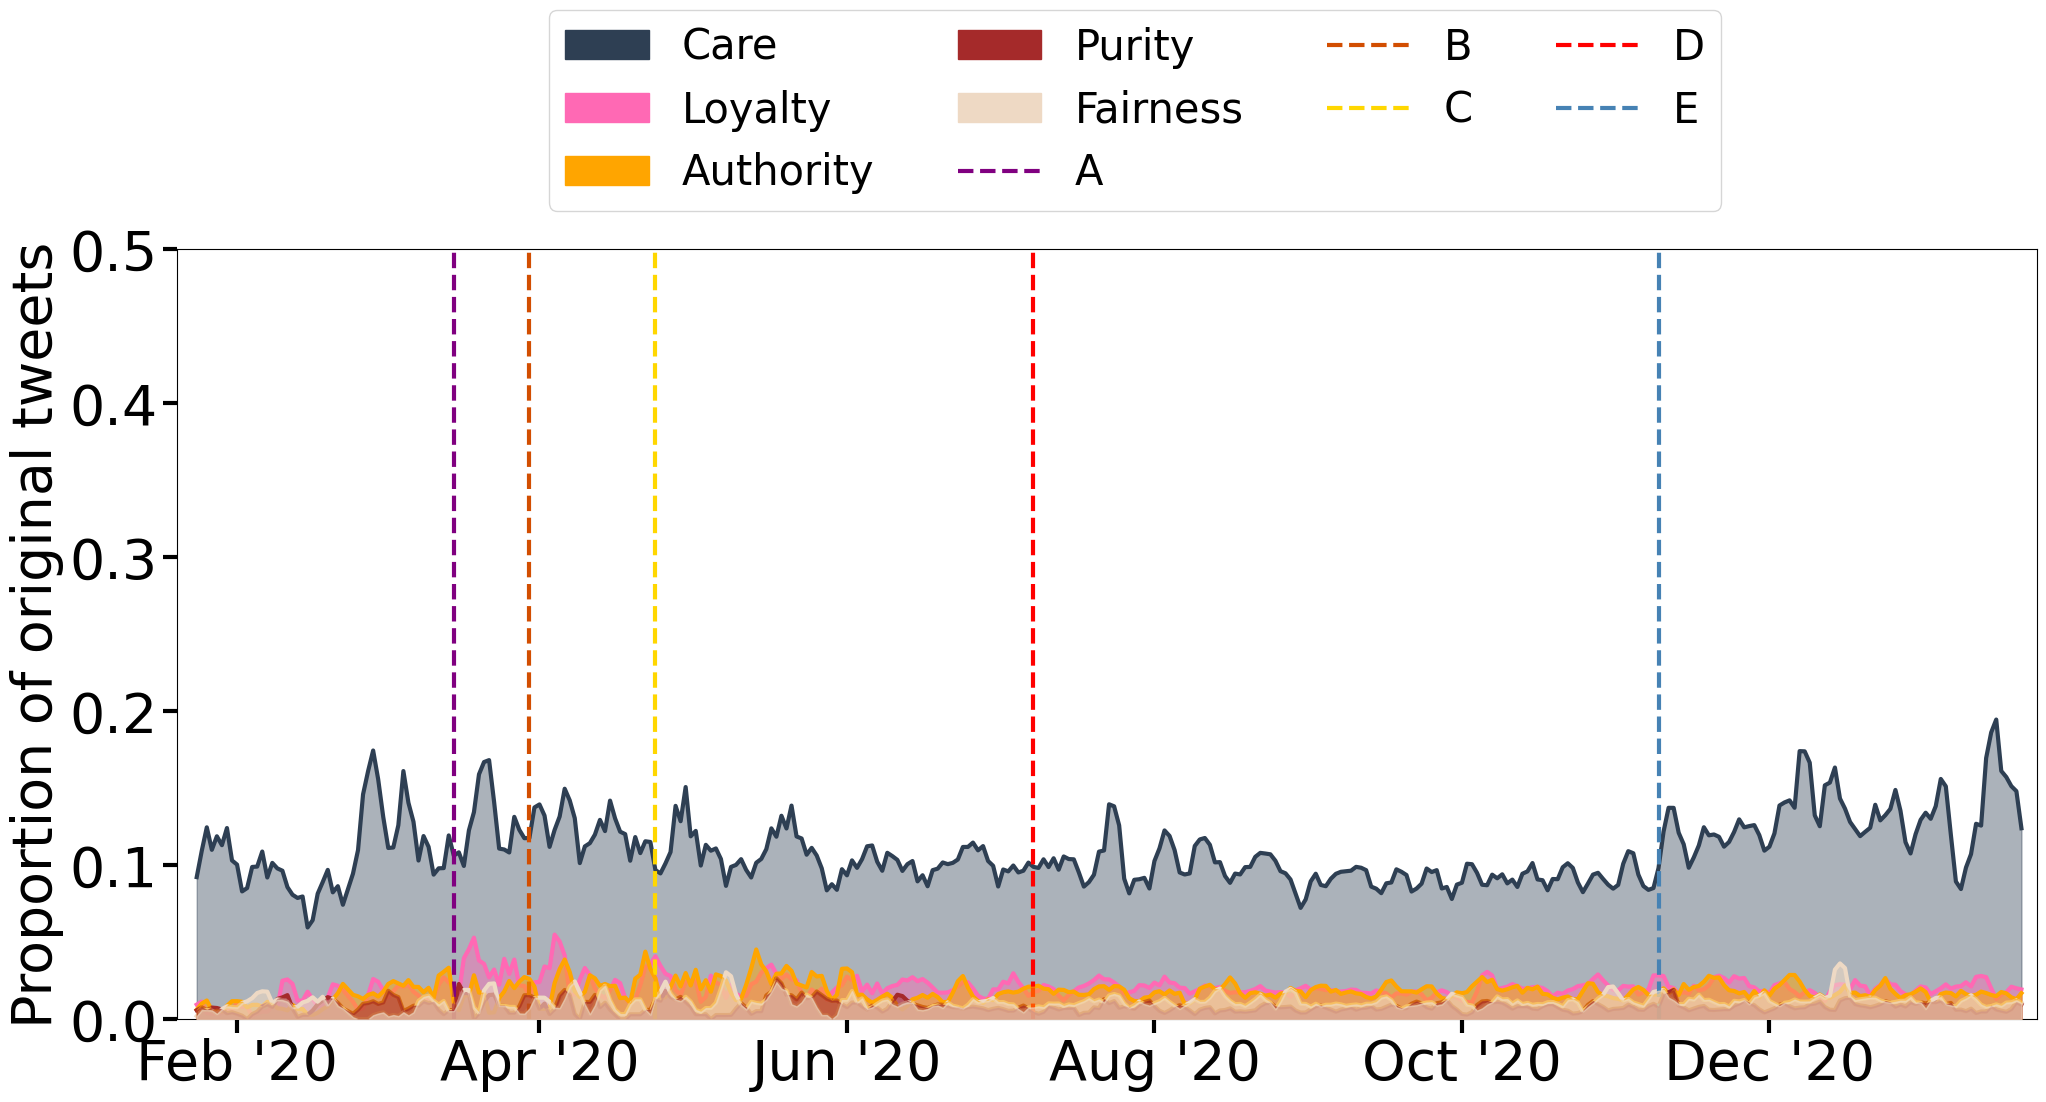

In [169]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in pos_mft:
    plt.plot(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),lw=3,color=color_dict[c])
    plt.fill_between(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
#plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
#plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.5)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('pseudo_phe_mft_positive_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

### Negative 

In [170]:
color_dict={
    'harm':'#D1B000',
    'subversion':'purple',
    'cheating':'#40E0D0',
    'betrayal':'#006666',
    'degradation':'#D2042D'
}

<ipython-input-171-f6c8c0d79977>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


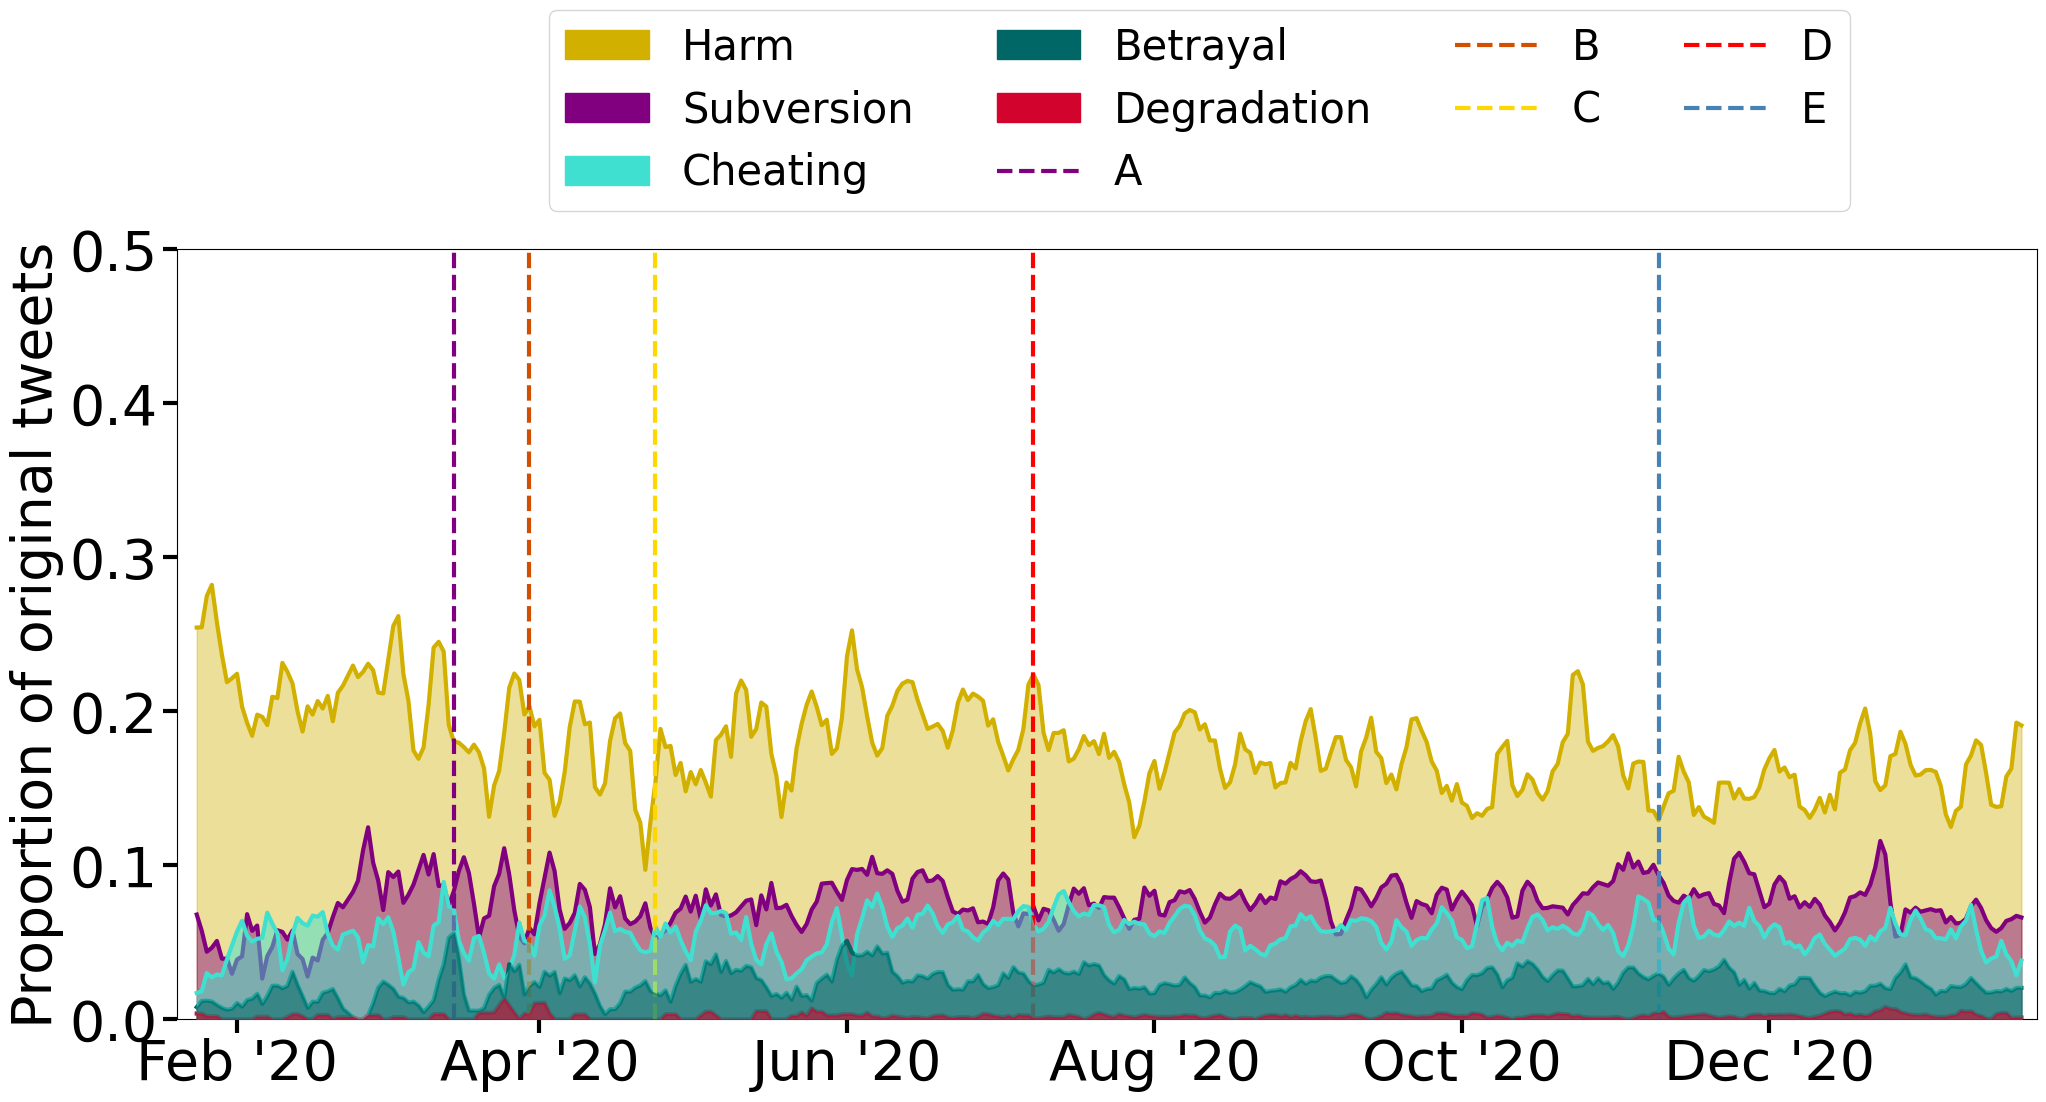

In [171]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,10))
ct=0.4
z=1
for c in neg_mft:
    plt.plot(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),lw=3,color=color_dict[c])
    plt.fill_between(pseudo_aff_day['date'],smooth(pseudo_aff_day[c]),alpha=ct,label=c.capitalize(),zorder=z,color=color_dict[c])
    ct+=0.05
    z+=1
plt.axvline(datetime.strptime('2020-03-15','%Y-%m-%d'),ymin=0,color='purple',linewidth=3,linestyle='--',label='A')
plt.axvline(datetime.strptime('2020-03-30','%Y-%m-%d'),ymin=0,color='#d24e01',linewidth=3,linestyle='--',label='B')
plt.axvline(datetime.strptime('2020-04-24','%Y-%m-%d'),ymin=0,color='gold',linewidth=3,linestyle='--',label='C')
plt.axvline(datetime.strptime('2020-07-08','%Y-%m-%d'),ymin=0,color='red',linewidth=3,linestyle='--',label='D')
plt.axvline(datetime.strptime('2020-11-09','%Y-%m-%d'),ymin=0,color='steelblue',linewidth=3,linestyle='--',label='E')
# plt.axvline(datetime.strptime('2021-05-14','%Y-%m-%d'),ymin=0,color='#0B6623',linewidth=3,linestyle='--',label='F')
# plt.axvline(datetime.strptime('2021-05-23','%Y-%m-%d'),ymin=0,color='gray',linewidth=3,linestyle='--',label='G')
plt.xlim(pd.Timestamp('2020-01-20'),pd.Timestamp('2021-01-23'))
plt.ylim(0,0.5)
legend=plt.legend(loc=(0.2,1.05),fontsize=30,ncol=4)
for lh in legend.legendHandles: 
    lh.set_alpha(1)
plt.xticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-06-01'),pd.Timestamp('2020-08-01'),pd.Timestamp('2020-10-01'),pd.Timestamp('2020-12-01')])
date_format = mdates.DateFormatter("%b '%y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.tick_params(length=10,width=3)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel('Proportion of original tweets',fontsize=40)
plt.savefig('pseudo_phe_mft_negative_all.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [151]:
phe_users=list(set(phe_aff['screen_name'].tolist()))
pseudo_users=list(set(pseudo_aff['screen_name'].tolist()))

In [152]:
with open('/effectcrawl/ashwin/phe_users_rt_graph.pkl','wb') as f:
    pickle.dump(phe_users,f)

In [153]:
with open('/effectcrawl/ashwin/pseudo_users_rt_graph.pkl','wb') as f:
    pickle.dump(pseudo_users,f)

In [154]:
len(phe_users),len(pseudo_users)

(491, 353)


## Emotions by issue

In [280]:
from scipy.stats import mannwhitneyu

In [281]:
res=pd.read_csv('new_results_latest.csv')
res['PHE_Est']=res['PHE_Est'].apply(np.exp)
res['Pseudo_Est']=res['Pseudo_Est'].apply(np.exp)
res

Issue       Emotion   PHE_Est  Pseudo_Est     PHE_Std  Pseudo_Std
0        origins         anger  0.900028    0.568412    0.101402    0.151308
1      lockdowns         anger  1.462566    2.557496    0.037451    0.052769
2        masking         anger  1.273165    1.349632    0.038862    0.063196
3     healthcare         anger  0.892747    0.658542    0.029845    0.051399
4      education         anger  0.769156    0.858995    0.036138    0.065493
5   therapeutics         anger  1.198936    0.481848    0.117850    0.144985
6       vaccines         anger  0.408696    0.463912    0.038520    0.055793
7        origins       disgust  0.947106    0.725403    0.082491    0.124116
8      lockdowns       disgust  1.549372    3.087143    0.032231    0.050338
9        masking       disgust  1.167361    1.509054    0.033625    0.058165
10    healthcare       disgust  1.080189    0.809595    0.023851    0.043238
11     education       disgust  0.918646    1.035059    0.028338    0.056254
12  therapeutics       disgust  1.298971    0.427239    0.098819    0.123369
13      vaccines       disgust  0.404350    0.524751    0.030098    0.045383
14       origins          fear  1.157838    0.895064    0.105773    0.171778
15     lockdowns          fear  1.177933    1.141449    0.044753    0.068643
16       masking          fear  0.870683    1.056373    0.049601    0.084718
17    healthcare          fear  1.247298    1.097925    0.031167    0.059144
18     education          fear  1.041683    1.535861    0.037699    0.072895
19  therapeutics          fear  0.338494    0.217048    0.223596    0.283956
20      vaccines          fear  0.491856    1.144583    0.042036    0.061287
21       origins       sadness  0.968467    0.509981    0.115123    0.232583
22     lockdowns       sadness  1.134505    1.824119    0.046154    0.070527
23       masking       sadness  0.415574    0.676394    0.067505    0.116502
24    healthcare       sadness  1.692399    1.555424    0.029605    0.060929
25     education       sadness  1.022533    1.349969    0.038660    0.084241
26  therapeutics       sadness  0.356512    0.378347    0.223607    0.277495
27      vaccines       sadness  0.266714    0.486380    0.054754    0.087770
28       origins     pessimism  0.959818    0.686641    0.357178    0.796976
29     lockdowns     pessimism  1.200849    1.768079    0.137068    0.243251
30       masking     pessimism  0.393489    0.366950    0.226901    0.554585
31    healthcare     pessimism  1.517338    1.506109    0.090240    0.222712
32     education     pessimism  1.300711    2.469572    0.108344    0.249422
33  therapeutics     pessimism  0.000006    0.342080  111.516306  111.518577
34      vaccines     pessimism  0.219633    0.198034    0.199583    0.460998
35       origins  anticipation  0.852831    1.043023    0.116259    0.215432
36     lockdowns  anticipation  0.827952    0.683433    0.049409    0.101179
37       masking  anticipation  0.647024    0.562134    0.054204    0.136891
38    healthcare  anticipation  0.684330    0.679826    0.036353    0.091685
39     education  anticipation  1.575653    1.463640    0.033145    0.093449
40  therapeutics  anticipation  0.454247    0.972413    0.192111    0.234287
41      vaccines  anticipation  2.799745    2.077692    0.026593    0.060477
42       origins           joy  1.004276    0.955101    0.107457    0.199228
43     lockdowns           joy  0.900656    0.774140    0.047125    0.088433
44       masking           joy  1.099280    0.999798    0.044306    0.098979
45    healthcare           joy  0.653842    0.920501    0.036190    0.076262
46     education           joy  1.385834    1.443930    0.033667    0.085659
47  therapeutics           joy  0.481130    1.096523    0.183538    0.216070
48      vaccines           joy  0.975575    0.601506    0.032424    0.076260
49       origins      optimism  0.777585    1.071498    0.104392    0.175863
50     lockdowns      optimism  1.197206    0.828715    0.038658    0.074941
51     

In [282]:
emotions=['anger','disgust','sadness','fear','optimism','joy']

In [283]:
order=['origins','lockdowns','masking','education','healthcare','therapeutics','vaccines']

In [284]:
issues=['origins','lockdowns','masking','education','healthcare','therapeutics','vaccines']

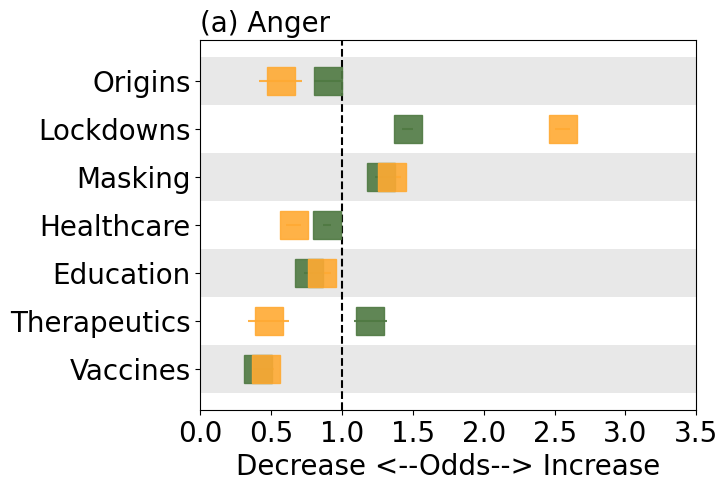

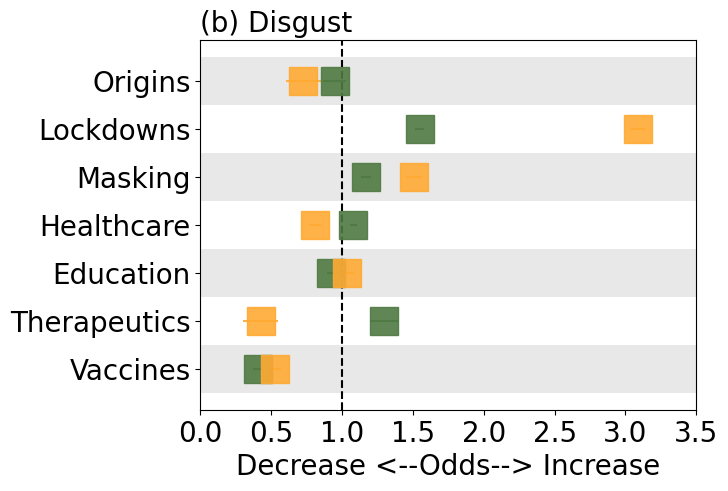

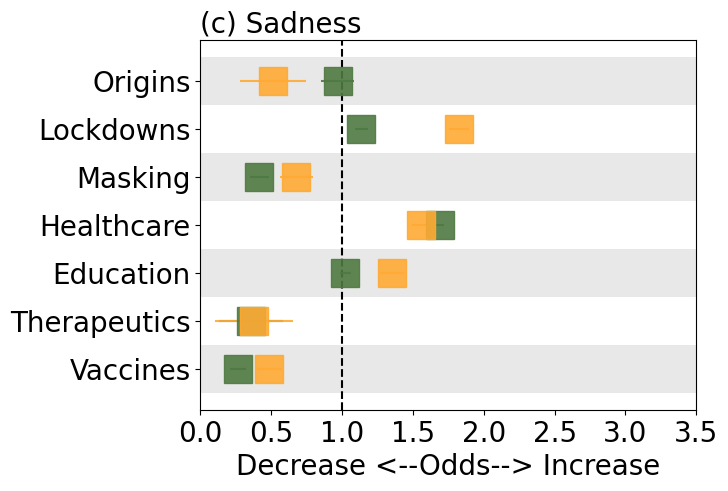

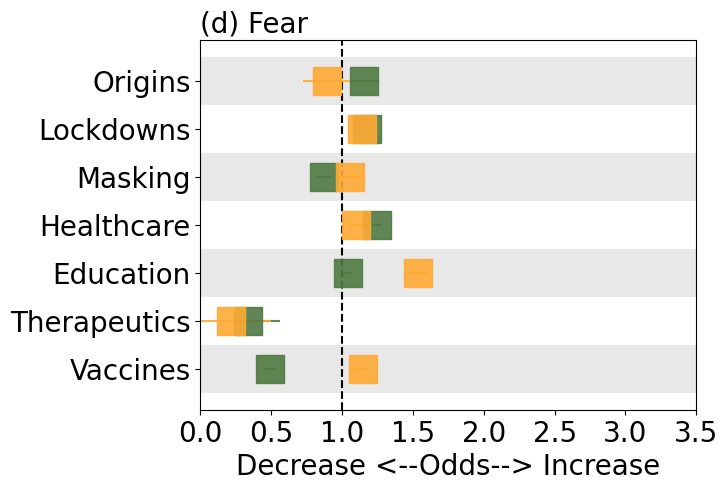

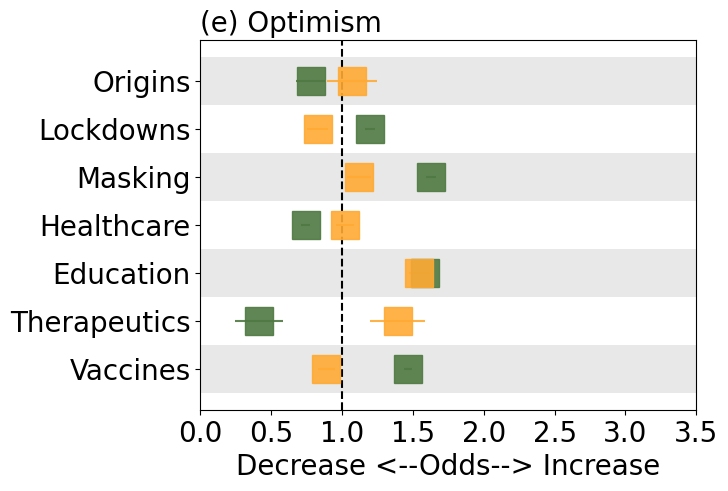

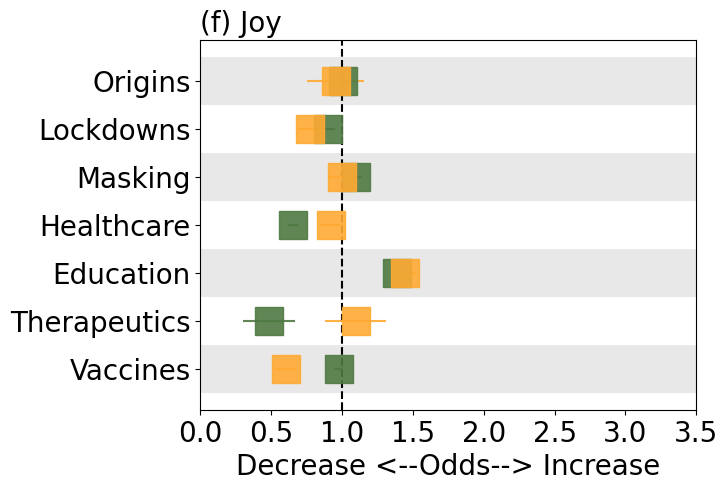

In [286]:
num=['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
ct=0
for e in emotions:
    plt.title(num[ct]+' '+e.capitalize(),loc='left',fontsize=20)
    tmp=res[res['Emotion']==e]
    tmp=tmp[tmp['Issue'].isin(order)][::-1]
    tmp['Issue']=tmp['Issue'].str.title()
    plt.axvline(1,linestyle='--',color='black')   
    plt.errorbar(tmp['PHE_Est'],tmp['Issue'],xerr=tmp['PHE_Std'],color='#4F7942',fmt='s',markersize=20,alpha=0.9,label='PHEs')
    plt.errorbar(tmp['Pseudo_Est'],tmp['Issue'],xerr=tmp['Pseudo_Std'],color='#FFAA33',fmt='s',markersize=20,alpha=0.9,label='Pseudo Experts')
    
#     if iss =='education':
#         plt.xticks([-0.05,0,0.05,0.1,0.15],fontsize=16)
#     elif iss=='therapeutics':
#         plt.xticks([-0.10,-0.05,0,0.05],fontsize=16)
#     else:
    plt.xlim([0,3.5])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Decrease <--Odds--> Increase",fontsize=20)
    for i in range(0, len(tmp), 2):
        plt.axhspan(i-0.5, i+0.5, facecolor='lightgray', alpha=0.5)
    #plt.legend(loc=(0.2,1),ncols=2)
    
    #plt.legend(loc=(0,1.1),ncols=2,fontsize=20)
    ct+=1
    plt.savefig(e+'_regression.pdf',dpi=300,bbox_inches='tight')
    plt.show()

In [265]:
phe_aff_day=phe_aff[concerns+emotions+mfts+['tweet_type']]
pseudo_aff_day=pseudo_aff[concerns+emotions+mfts+['tweet_type']]
phe_aff_day=phe_aff_day[phe_aff_day['tweet_type']=='original']
pseudo_aff_day=pseudo_aff_day[pseudo_aff_day['tweet_type']=='original']
phe_aff_day['group']='PHE'
pseudo_aff_day['group']='Pseudo-PHE'
res=pd.concat([phe_aff_day,pseudo_aff_day],ignore_index=True)
del res['tweet_type']
res

origins  lockdowns  masking  healthcare  education  therapeutics  \
0             0          0        0           1          0             0   
1             0          0        0           0          0             0   
2             0          0        0           0          0             0   
3             0          0        0           0          0             0   
4             0          0        0           0          0             0   
...         ...        ...      ...         ...        ...           ...   
107149        0          0        0           0          0             0   
107150        0          0        0           1          0             0   
107151        0          0        1           0          0             0   
107152        0          0        1           0          0             0   
107153        0          0        0           0          0             0   

        vaccines  anger  anticipation  disgust  ...  harm  fairness  cheating  \
0              0      0             0        0  ...     0         0         0   
1              0      0             0        0  ...     0         0         0   
2              0      0             0        1  ...     1         0         0   
3              0      0             0        0  ...     0         0         0   
4              0      0             0        0  ...     0         0         0   
...          ...    ...           ...      ...  ...   ...       ...       ...   
107149         0      0             0        0  ...     0         0         0   
107150         0      0             0        0  ...     0         0         0   
107151         0      1             0        1  ...     0         0         0   
107152         0      1             0        1  ...     0         0         0   
107153         0      0             1        0  ...     0         0         0   

        authority  subversion  loyalty  betrayal  purity  degradation  \
0               0           0        0         0       0            0   
1               0           0        0         0       0            0   
2               0           0        0         0       0            0   
3               0           0        0         0       0            0   
4               0           0        0         0       0            0   
...           ...         ...      ...       ...     ...          ...   
107149          0           0        0         0       0            0   
107150          1           0        0         0       0            0   
107151          1           0        0         0       0            0   
107152          1           0        0         0       0            0   
107153          0           0        0         0       0            0   

             group  
0              PHE  
1              PHE  
2              PHE  
3              PHE  
4              PHE  
...            ...  
107149  Pseudo-PHE  
107150  Pseudo-PHE  
107151  Pseudo-PHE  
107152  Pseudo-PHE  
107153  Pseudo-PHE  

[107154 rows x 27 columns]

In [266]:
res.to_csv('data_latest.csv',index=False)

## Morality by issue

In [288]:
from scipy.stats import mannwhitneyu

In [289]:
res=pd.read_csv('new_results_mft_latest.csv')
res

Issue          MFT    PHE_Est  Pseudo_Est     PHE_Std  Pseudo_Std
0        origins         care  -0.299739   -1.071455    0.104784    0.224266
1      lockdowns         care   0.556228   -0.218842    0.035162    0.067111
2        masking         care   0.670780    0.215930    0.034531    0.073377
3     healthcare         care   0.149789    0.273656    0.027164    0.054740
4      education         care   0.145487    0.347657    0.031310    0.070541
..           ...          ...        ...         ...         ...         ...
65       masking  degradation   0.349268   -1.153368    0.521980    1.136935
66    healthcare  degradation   0.099751   -0.190770    0.408392    0.623191
67     education  degradation -14.335033    0.017745  348.301545  348.302053
68  therapeutics  degradation -11.242265    0.195484  303.132757  303.133616
69      vaccines  degradation  -0.501566    0.183599    0.521845    0.637914

[70 rows x 6 columns]

In [290]:
res['PHE_Est']=res['PHE_Est'].apply(np.exp)
res['Pseudo_Est']=res['Pseudo_Est'].apply(np.exp)
res

Issue          MFT       PHE_Est  Pseudo_Est     PHE_Std  \
0        origins         care  7.410117e-01    0.342510    0.104784   
1      lockdowns         care  1.744081e+00    0.803449    0.035162   
2        masking         care  1.955763e+00    1.241015    0.034531   
3     healthcare         care  1.161589e+00    1.314763    0.027164   
4      education         care  1.156603e+00    1.415746    0.031310   
..           ...          ...           ...         ...         ...   
65       masking  degradation  1.418029e+00    0.315572    0.521980   
66    healthcare  degradation  1.104896e+00    0.826323    0.408392   
67     education  degradation  5.948048e-07    1.017903  348.301545   
68  therapeutics  degradation  1.310830e-05    1.215899  303.132757   
69      vaccines  degradation  6.055817e-01    1.201534    0.521845   

    Pseudo_Std  
0     0.224266  
1     0.067111  
2     0.073377  
3     0.054740  
4     0.070541  
..         ...  
65    1.136935  
66    0.623191  
67  348.302053  
68  303.133616  
69    0.637914  

[70 rows x 6 columns]

In [291]:
mfts=['care',
      'harm',
      'fairness',
      'cheating',
      'authority',
      'subversion',
      'loyalty',
      'betrayal',
      'purity',
      'degradation'
]

In [292]:
res['MFT'] = pd.Categorical(res['MFT'], categories=mfts, ordered=True)
res = res.sort_values(by='MFT')
res

Issue          MFT       PHE_Est  Pseudo_Est     PHE_Std  Pseudo_Std
0      origins         care  7.410117e-01    0.342510    0.104784    0.224266
1    lockdowns         care  1.744081e+00    0.803449    0.035162    0.067111
2      masking         care  1.955763e+00    1.241015    0.034531    0.073377
3   healthcare         care  1.161589e+00    1.314763    0.027164    0.054740
4    education         care  1.156603e+00    1.415746    0.031310    0.070541
..         ...          ...           ...         ...         ...         ...
64   lockdowns  degradation  3.299648e-01    0.535110    1.009147    1.171519
65     masking  degradation  1.418029e+00    0.315572    0.521980    1.136935
66  healthcare  degradation  1.104896e+00    0.826323    0.408392    0.623191
67   education  degradation  5.948048e-07    1.017903  348.301545  348.302053
69    vaccines  degradation  6.055817e-01    1.201534    0.521845    0.637914

[70 rows x 6 columns]

In [293]:
res=res[~res['MFT'].isin(['purity','degradation'])]

In [294]:
res['PHE_Est'].iloc[-6]=res['PHE_Est'].iloc[-6]-2
res['Pseudo_Est'].iloc[-6]=res['Pseudo_Est'].iloc[-6]-2

<ipython-input-294-4862dcd148db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['PHE_Est'].iloc[-6]=res['PHE_Est'].iloc[-6]-2
<ipython-input-294-4862dcd148db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Pseudo_Est'].iloc[-6]=res['Pseudo_Est'].iloc[-6]-2


In [295]:
mfts=['care','harm','fairness','cheating','authority','subversion','loyalty','betrayal']

In [296]:
order=['origins','lockdowns','masking','education','healthcare','therapeutics','vaccines']

In [297]:
issues=['origins','lockdowns','masking','education','healthcare','therapeutics','vaccines']

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


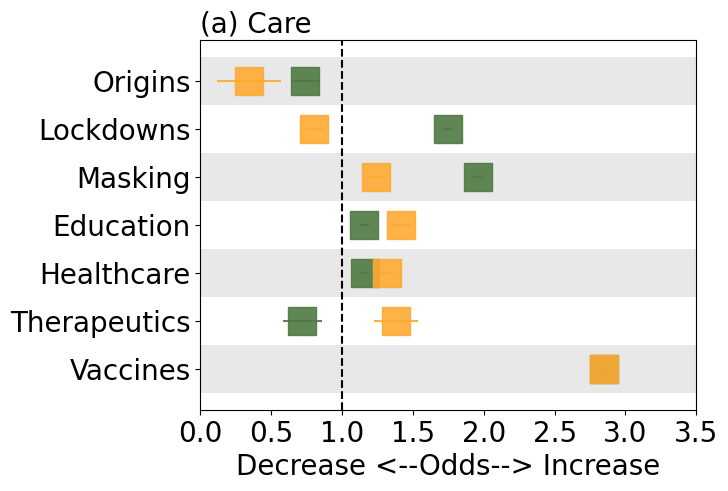

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


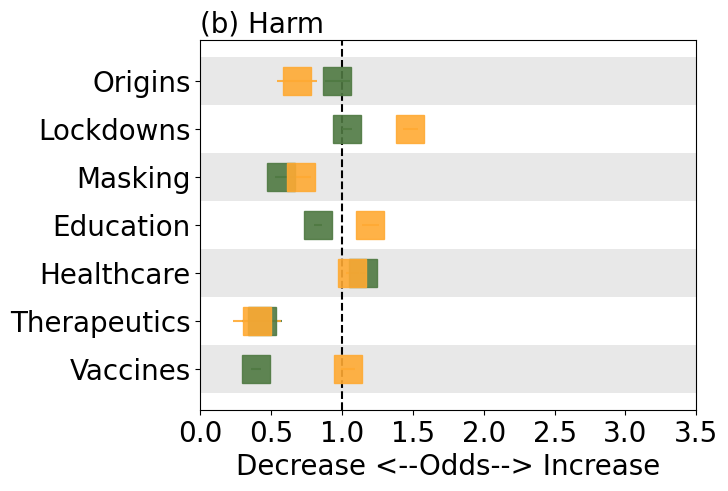

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


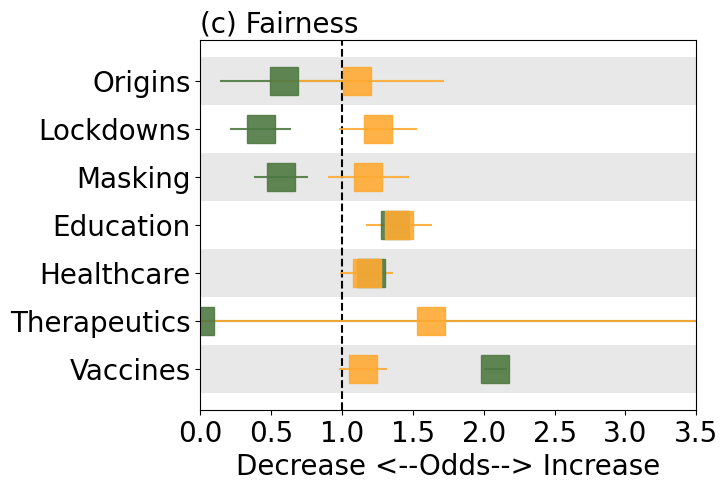

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


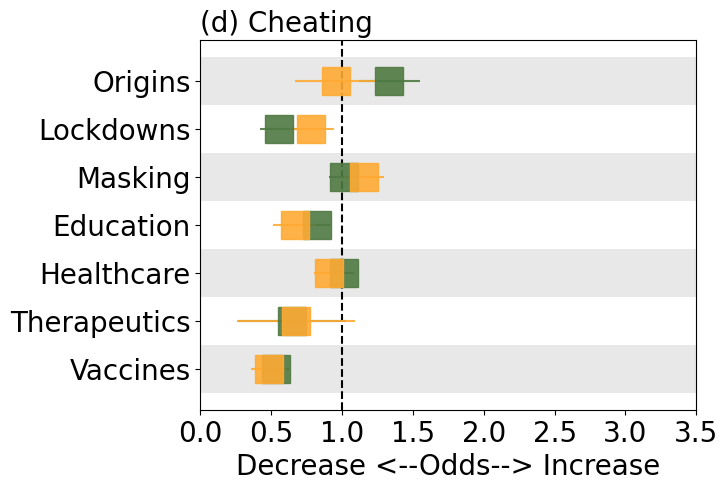

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


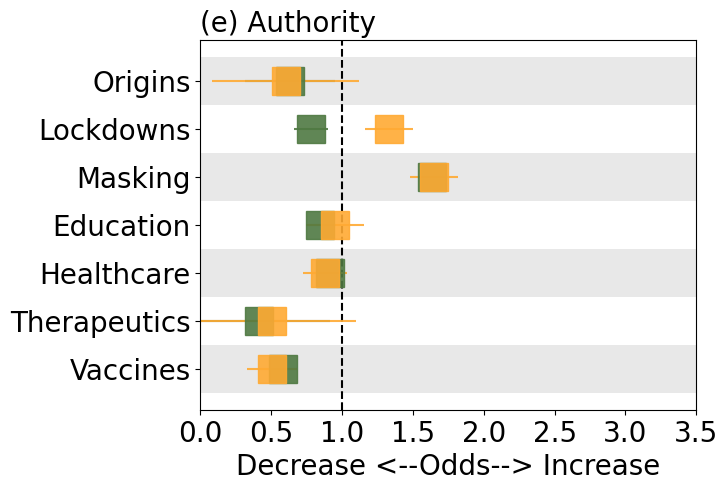

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


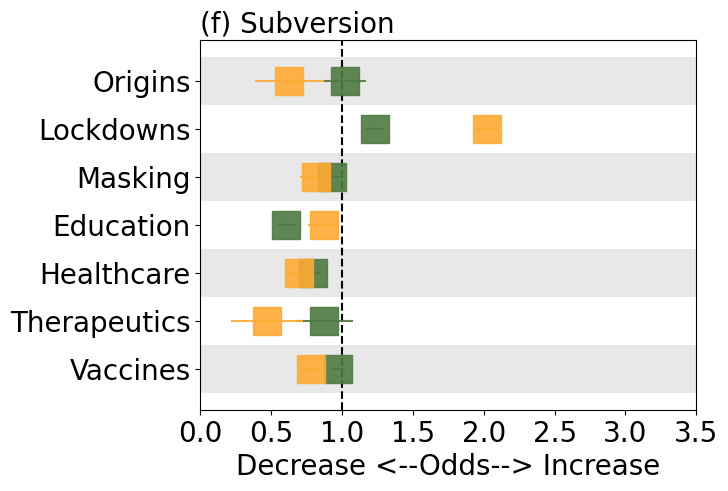

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


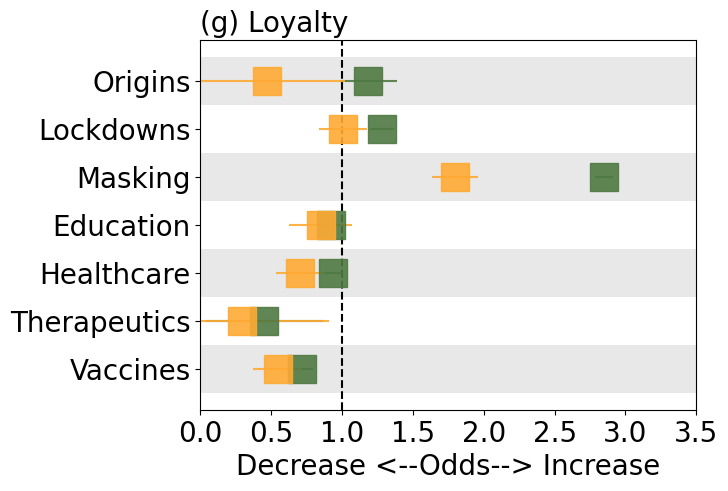

<ipython-input-298-5f6e24bf2d0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)


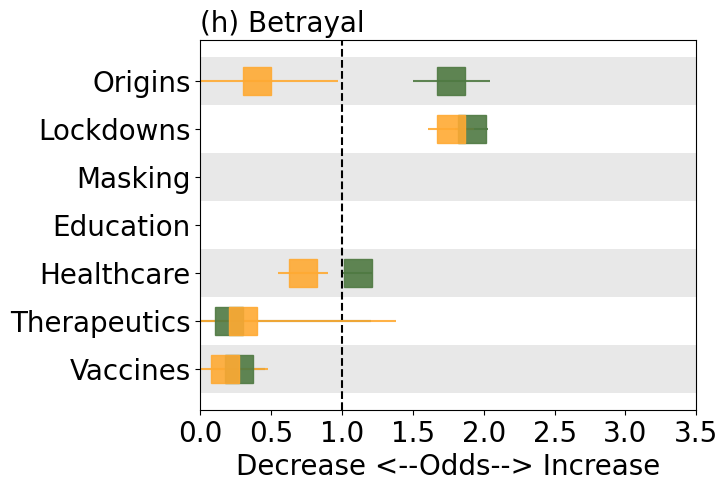

In [298]:
num=['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']
ct=0
for e in mfts:
    plt.title(num[ct]+' '+e.capitalize(),loc='left',fontsize=20)
    tmp=res[res['MFT']==e]
    tmp['Issue'] = pd.Categorical(tmp['Issue'],categories=order,ordered=True)
    tmp = tmp.sort_values('Issue')  
    tmp=tmp[tmp['Issue'].isin(order)][::-1]
    tmp['Issue']=tmp['Issue'].str.title()
    plt.axvline(1,linestyle='--',color='black')   
    plt.errorbar(tmp['PHE_Est'],tmp['Issue'],xerr=tmp['PHE_Std'],color='#4F7942',fmt='s',markersize=20,alpha=0.9,label='PHEs')
    plt.errorbar(tmp['Pseudo_Est'],tmp['Issue'],xerr=tmp['Pseudo_Std'],color='#FFAA33',fmt='s',markersize=20,alpha=0.9,label='Pseudo Experts')
    
    plt.xlim([0,3.5])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Decrease <--Odds--> Increase",fontsize=20)
    for i in range(0, len(tmp), 2):
        plt.axhspan(i-0.5, i+0.5, facecolor='lightgray', alpha=0.5)
    #plt.legend(loc=(0.2,1),ncols=2)
    
    #plt.legend(loc=(0,1.1),ncols=2,fontsize=20)
    ct+=1
    plt.savefig(e+'_regression_mft.pdf',dpi=300,bbox_inches='tight')
    plt.show()

## Emotion Boxplots

In [155]:
phe_aff_day=phe_aff[['str_date']+emotions+mfts].groupby('str_date').mean().reset_index()
pseudo_aff_day=pseudo_aff[['str_date']+emotions+mfts].groupby('str_date').mean().reset_index()

In [156]:
phe_aff_day['group']='PHE'
pseudo_aff_day['group']='Pseudo Experts'
res=pd.concat([phe_aff_day,pseudo_aff_day],ignore_index=False)
res['date']=res['str_date'].apply(pd.Timestamp)
del res['str_date']
del res['date']
box_df=pd.DataFrame()
res

anger  anticipation   disgust      fear       joy      love  optimism  \
0    0.000000      0.000000  0.000000  0.500000  0.000000  0.000000  0.000000   
1    0.034965      0.111888  0.090909  0.097902  0.069930  0.000000  0.055944   
2    0.103297      0.081319  0.158242  0.175824  0.063736  0.002198  0.076923   
3    0.069930      0.110723  0.152681  0.118881  0.069930  0.000000  0.047786   
4    0.086637      0.083700  0.208517  0.193833  0.070485  0.001468  0.060206   
..        ...           ...       ...       ...       ...       ...       ...   
359  0.171765      0.032941  0.292941  0.067059  0.080000  0.016471  0.214118   
360  0.188988      0.034226  0.305060  0.145833  0.072917  0.002976  0.098214   
361  0.286972      0.015845  0.427817  0.061620  0.058099  0.005282  0.073944   
362  0.283713      0.054291  0.432574  0.077058  0.075306  0.001751  0.085814   
363  0.263274      0.064159  0.389381  0.090708  0.092920  0.002212  0.106195   

     pessimism   sadness      care      harm  fairness  cheating   loyalty  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.006993  0.027972  0.167832  0.167832  0.006993  0.006993  0.000000   
2     0.008791  0.070330  0.098901  0.235165  0.002198  0.004396  0.021978   
3     0.002331  0.058275  0.089744  0.251748  0.003497  0.008159  0.015152   
4     0.000000  0.066079  0.110132  0.286344  0.005874  0.013216  0.016153   
..         ...       ...       ...       ...       ...       ...       ...   
359   0.003529  0.070588  0.147059  0.120000  0.004706  0.064706  0.025882   
360   0.010417  0.095238  0.197917  0.160714  0.016369  0.017857  0.022321   
361   0.008803  0.098592  0.112676  0.205986  0.012324  0.031690  0.015845   
362   0.007005  0.084063  0.134851  0.211909  0.008757  0.036778  0.021016   
363   0.008850  0.115044  0.123894  0.154867  0.011062  0.046460  0.019912   

     betrayal  authority  subversion    purity  degradation           group  
0    0.000000   0.000000    0.000000  0.000000     0.000000             PHE  
1    0.006993   0.006993    0.013986  0.006993     0.000000             PHE  
2    0.000000   0.013187    0.041758  0.006593     0.000000             PHE  
3    0.001166   0.009324    0.033800  0.004662     0.000000             PHE  
4    0.000000   0.019090    0.032305  0.005874     0.001468             PHE  
..        ...        ...         ...       ...          ...             ...  
359  0.020000   0.017647    0.060000  0.002353     0.002353  Pseudo Experts  
360  0.017857   0.014881    0.069940  0.008929     0.000000  Pseudo Experts  
361  0.015845   0.010563    0.066901  0.008803     0.000000  Pseudo Experts  
362  0.026270   0.014011    0.064799  0.015762     0.003503  Pseudo Experts  
363  0.017699   0.026549    0.066372  0.004425     0.000000  Pseudo Experts  

[729 rows x 20 columns]

In [157]:
for c in positive_emo+negative_emo+pos_mft+neg_mft:
    tmp=res[[c,'group']]
    tmp['affect']=c
    tmp=tmp.rename(columns={c:'value'})
    box_df=pd.concat([box_df,tmp])
box_df

<ipython-input-157-a93507b44ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['affect']=c
<ipython-input-157-a93507b44ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['affect']=c
<ipython-input-157-a93507b44ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

value           group        affect
0    0.000000             PHE  anticipation
1    0.111888             PHE  anticipation
2    0.081319             PHE  anticipation
3    0.110723             PHE  anticipation
4    0.083700             PHE  anticipation
..        ...             ...           ...
359  0.002353  Pseudo Experts   degradation
360  0.000000  Pseudo Experts   degradation
361  0.000000  Pseudo Experts   degradation
362  0.003503  Pseudo Experts   degradation
363  0.000000  Pseudo Experts   degradation

[13851 rows x 3 columns]

In [158]:
box_df['zip']=list(zip(box_df['affect'],box_df['group']))
pairs=list(set(box_df['zip'].tolist()))
pairs

[('loyalty', 'Pseudo Experts'),
 ('betrayal', 'Pseudo Experts'),
 ('pessimism', 'Pseudo Experts'),
 ('love', 'Pseudo Experts'),
 ('anticipation', 'Pseudo Experts'),
 ('degradation', 'PHE'),
 ('fear', 'Pseudo Experts'),
 ('harm', 'Pseudo Experts'),
 ('cheating', 'Pseudo Experts'),
 ('fairness', 'Pseudo Experts'),
 ('authority', 'Pseudo Experts'),
 ('purity', 'PHE'),
 ('sadness', 'PHE'),
 ('subversion', 'Pseudo Experts'),
 ('disgust', 'Pseudo Experts'),
 ('care', 'Pseudo Experts'),
 ('joy', 'PHE'),
 ('loyalty', 'PHE'),
 ('anger', 'Pseudo Experts'),
 ('betrayal', 'PHE'),
 ('love', 'PHE'),
 ('optimism', 'PHE'),
 ('pessimism', 'PHE'),
 ('anticipation', 'PHE'),
 ('degradation', 'Pseudo Experts'),
 ('fear', 'PHE'),
 ('cheating', 'PHE'),
 ('harm', 'PHE'),
 ('fairness', 'PHE'),
 ('authority', 'PHE'),
 ('disgust', 'PHE'),
 ('sadness', 'Pseudo Experts'),
 ('purity', 'Pseudo Experts'),
 ('subversion', 'PHE'),
 ('care', 'PHE'),
 ('joy', 'Pseudo Experts'),
 ('anger', 'PHE'),
 ('optimism', 'Pseudo Ex

In [159]:
box_df_emo=box_df[box_df['affect'].isin(positive_emo+negative_emo)]
box_df_mft=box_df[box_df['affect'].isin(pos_mft+neg_mft)]
mfts=['care',
      'harm',
      'fairness',
      'cheating',
      'authority',
      'subversion',
      'loyalty',
      'betrayal',
      'purity',
      'degradation'
]

box_df_mft['affect']=pd.Categorical(box_df_mft['affect'], categories=mfts, ordered=True)
box_df_mft = box_df_mft.sort_values(by='affect')
box_df_mft

<ipython-input-159-48f9ea189421>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df_mft['affect']=pd.Categorical(box_df_mft['affect'], categories=mfts, ordered=True)


value           group       affect                            zip
0    0.000000             PHE         care                    (care, PHE)
116  0.099099  Pseudo Experts         care         (care, Pseudo Experts)
117  0.150538  Pseudo Experts         care         (care, Pseudo Experts)
118  0.117647  Pseudo Experts         care         (care, Pseudo Experts)
119  0.148649  Pseudo Experts         care         (care, Pseudo Experts)
..        ...             ...          ...                            ...
245  0.000000             PHE  degradation             (degradation, PHE)
246  0.000994             PHE  degradation             (degradation, PHE)
247  0.000000             PHE  degradation             (degradation, PHE)
249  0.000000             PHE  degradation             (degradation, PHE)
363  0.000000  Pseudo Experts  degradation  (degradation, Pseudo Experts)

[7290 rows x 4 columns]

In [160]:
box_df_emo['affect']=box_df_emo['affect'].str.title()
box_df_mft['affect']=box_df_mft['affect'].str.title()

<ipython-input-160-04b785983b78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df_emo['affect']=box_df_emo['affect'].str.title()


In [161]:
emo_pairs=[]
for e in positive_emo+negative_emo:
    emo_pairs.append(((e.capitalize(),"PHE"),(e.capitalize(),'Pseudo Experts')))

In [162]:
mft_pairs=[]
for e in pos_mft+neg_mft:
    mft_pairs.append(((e.capitalize(),"PHE"),(e.capitalize(),'Pseudo Experts')))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Pessimism_PHE v.s. Pessimism_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.036e-35 U_stat=1.021e+05
Joy_PHE v.s. Joy_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.621e-80 U_stat=1.207e+05
Anticipation_PHE v.s. Anticipation_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.631e-110 U_stat=1.302e+05
Love_PHE v.s. Love_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.166e-20 U_stat=9.304e+04
Optimism_PHE v.s. Optimism_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.285e-97 U_stat=1.262e+05
Disgust_PHE v.s. Disgust_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.841e-76 U_stat=1.348e+04

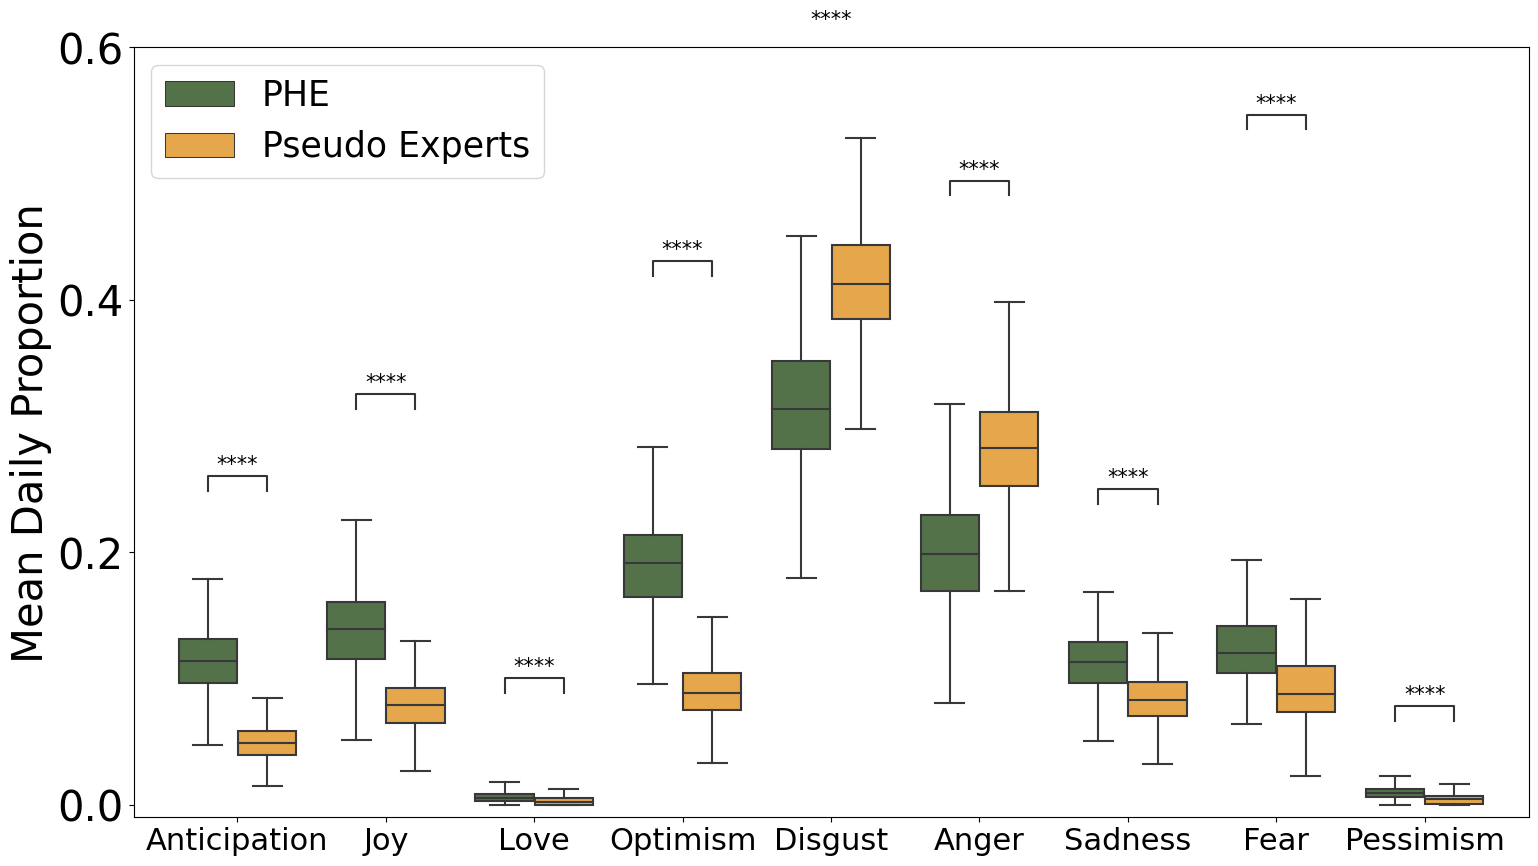

In [163]:
import seaborn as sns
from statannot import add_stat_annotation
box_pairs=emo_pairs
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=box_df_emo, x='affect', y='value', hue='group',showfliers=False,palette=['#4F7942','#FFAA33'])
add_stat_annotation(ax, data=box_df_emo, x='affect', y='value', hue='group', box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2,fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.legend(fontsize=25)
plt.yticks([0,0.2,0.4,0.6],fontsize=30)
plt.ylim((-0.01,0.6))
plt.xticks(fontsize=22)
plt.xlabel(None)
plt.ylabel('Mean Daily Proportion',fontsize=30)
plt.savefig('emotions_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Degradation_PHE v.s. Degradation_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.161e-06 U_stat=5.264e+04
Purity_PHE v.s. Purity_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.846e-06 U_stat=8.073e+04
Harm_PHE v.s. Harm_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.339e-49 U_stat=1.086e+05
Care_PHE v.s. Care_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.452e-88 U_stat=1.235e+05
Fairness_PHE v.s. Fairness_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=6.818e+04
Loyalty_PHE v.s. Loyalty_Pseudo Experts: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.419e-45 U_stat=1.069e+05
Author

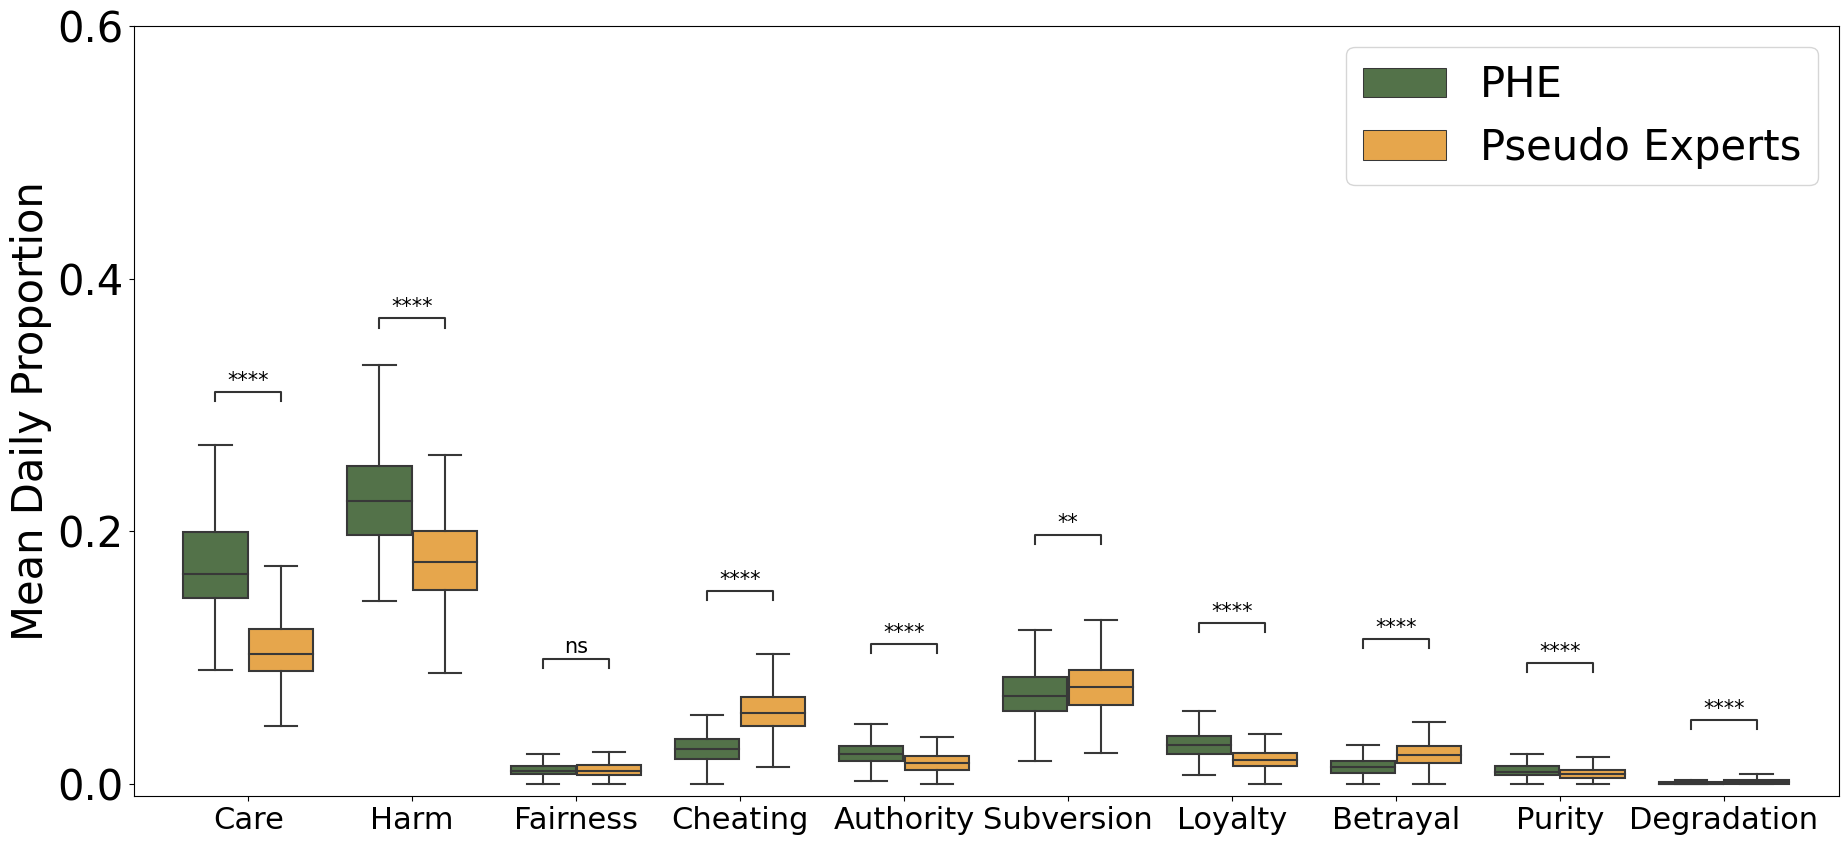

In [164]:
import seaborn as sns
from statannot import add_stat_annotation
box_pairs=mft_pairs
plt.figure(figsize=(22,10))
ax = sns.boxplot(data=box_df_mft, x='affect', y='value', hue='group',showfliers=False,palette=['#4F7942','#FFAA33'])
add_stat_annotation(ax, data=box_df_mft, x='affect', y='value', hue='group', box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2,fontsize=15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.legend(fontsize=30)
plt.yticks([0,0.2,0.4,0.6],fontsize=30)
plt.ylim((-0.01,0.60))
plt.xticks(fontsize=22)
plt.xlabel(None)
plt.ylabel('Mean Daily Proportion',fontsize=30)
plt.savefig('mft_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [215]:
from datetime import timedelta
data=[]
for d in event_dates:
    print(d)
    d=pd.Timestamp(d)
    low=d-timedelta(15)
    high=d+timedelta(15)
    before=phe_aff[(phe_aff['new_date']<d)&(phe_aff['new_date']>=low)]
    after=phe_aff[(phe_aff['new_date']>=d)&(phe_aff['new_date']<=high)]
    
    before_pseudo=pseudo_aff[(pseudo_aff['new_date']<d)&(pseudo_aff['new_date']>=low)]
    after_pseudo=pseudo_aff[(pseudo_aff['new_date']>=d)&(pseudo_aff['new_date']<=high)]
    for e in positive_emo+negative_emo:

        sub=[d,e,np.round(before[e].mean(),2),np.round(after[e].mean(),2),np.round(before_pseudo[e].mean(),2),np.round(after_pseudo[e].mean(),2)]
        try:
            a=after[after[e]==1].sample(n=25,random_state=23)['text'].tolist()
            a=[deep_clean(x) for x in a]
            a='. '.join(a)
        except:
            a = after[after[e]==1]['text'].tolist()
        try:
            b=before[before[e]==1].sample(n=25,random_state=23)['text'].tolist()
            b=[deep_clean(x) for x in b]
            b='. '.join(b)
        except:
            b = before[before[e]==1]['text'].tolist()
        try:
            a_pseudo=after_pseudo[after_pseudo[e]==1].sample(n=25,random_state=23)['text'].tolist()
            a_pseudo=[deep_clean(x) for x in a_pseudo]
            a_pseudo='. '.join(a_pseudo)
            
        except:
            a_pseudo=after_pseudo[after_pseudo[e]==1]['text'].tolist()
            
        try:
            b_pseudo=before_pseudo[before_pseudo[e]==1].sample(n=25,random_state=23)['text'].tolist()
            b_pseudo=[deep_clean(x) for x in b_pseudo]
            b_pseudo='. '.join(b_pseudo)
            
        except:
            b_pseudo=before_pseudo[before_pseudo[e]==1]['text'].tolist()
        data.append(sub+[b,a,b_pseudo,a_pseudo])

2020-03-15
2020-03-30
2020-04-24
2020-07-08
2020-11-09
2021-05-14
2021-05-23


In [216]:
event_data=pd.DataFrame(columns=['Date','Emotion','Before_PHE','After_PHE','Before_Pseudo','After_Pseudo','Before_Txt_PHE','After_Txt_PHE','Before_Txt_Pseudo','After_Txt_Pseudo'],data=data)
event_data

Date       Emotion  Before_PHE  After_PHE  Before_Pseudo  \
0  2020-03-15  anticipation        0.11       0.11           0.06   
1  2020-03-15           joy        0.10       0.16           0.06   
2  2020-03-15          love        0.00       0.01           0.00   
3  2020-03-15      optimism        0.13       0.22           0.07   
4  2020-03-15       disgust        0.27       0.31           0.31   
..        ...           ...         ...        ...            ...   
58 2021-05-23       disgust        0.24       0.25           0.38   
59 2021-05-23         anger        0.13       0.13           0.24   
60 2021-05-23       sadness        0.09       0.11           0.10   
61 2021-05-23          fear        0.09       0.11           0.11   
62 2021-05-23     pessimism        0.01       0.01           0.00   

    After_Pseudo                                     Before_Txt_PHE  \
0           0.07  A lot of talk about sequencing and tracking th...   
1           0.10  Looking forward to of-the-moment conversation ...   
2           0.00  Huge thanks to angierasmussen for making my da...   
3           0.10  A simple truth #Antibiotics dont treat viruses...   
4           0.41  A lot of ppl have been asking me about officia...   
..           ...                                                ...   
58          0.40  Breaking NBC News confirms The CDC will announ...   
59          0.28  "Just 12 people are responsible for the bulk o...   
60          0.07  "Women are dying at epidemic rates right now i...   
61          0.10  "If the importance of aerosol transmission had...   
62          0.00  #NewOnKHN One little-discussed long-term toll ...   

                                        After_Txt_PHE  \
0   Has anyone considered starting a virtual peer ...   
1   I wrote this just now   You should read it  Tr...   
2   [Sending all the best to all on @USNSComfort. ...   
3   Excellent and very informative thread for anyo...   
4   #COVID19 pandemic in the US to date  Hospitali...   
..                                                ...   
58  RT amymaxmen You have completely misrepresente...   
59  Bullshit   1 This is not an unknown virus Its ...   
60  Since the start of the pandemic very few adole...   
61  I don't understand why this is news  We've kno...   
62  This is what happens when I get an overnight b...   

                                    Before_Txt_Pseudo  \
0   We'll soon know if China is BS'ing us on their...   
1   Market roars back from coronavirus sell-off wi...   
2   [Love in the time of #COVIDー19 https://t.co/9H...   
3   DrSHIVA Choose WISELY in 2020Scientist or Lawy...   
4   New China cases keep dropping with each update...   
..                                                ...   
58  Child mental health crisis   This is what gove...   
59  Fauci says the pandemic showed the 'undeniable...   
60  Totalitarian and unjustifiable laws being cont...   
61  Doesnt the CDCgov know we are in the middle of...   
62  [We'll be wearing masks &amp; social distancin...   

                                     After_Txt_Pseudo  
0   [Quick selfie before venturing out to the shop...  
1   THIS IS A BRILLIANT IDEA - Trump Prepares Crit...  
2   [Morning Joe just loves having a China schill ...  
3   Thank you TVANews for ensuring all Tennesseans...  
4   Think about this  There is now over 8 000 dead...  
..                                                ...  
58  Award winning Susan Downs "Occupy Health" supp...  
59  #Fauci blocked all therapeutics as a treatment...  
60  So after having two of the jabby things people...  
61  In an open letter to the Medicines and Healthc...  
62  [There's a massive loneliness epidemic happeni...  

[63 rows x 10 columns]

In [217]:
event_data.to_csv('event_data.csv',index=False)

In [218]:
from datetime import timedelta
data=[]
for d in event_dates:
    print(d)
    d=pd.Timestamp(d)
    low=d-timedelta(15)
    high=d+timedelta(15)
    before=phe_aff[(phe_aff['new_date']<d)&(phe_aff['new_date']>=low)]
    after=phe_aff[(phe_aff['new_date']>=d)&(phe_aff['new_date']<=high)]
    
    before_pseudo=pseudo_aff[(pseudo_aff['new_date']<d)&(pseudo_aff['new_date']>=low)]
    after_pseudo=pseudo_aff[(pseudo_aff['new_date']>=d)&(pseudo_aff['new_date']<=high)]
    for e in pos_mft+neg_mft:

        sub=[d,e,np.round(before[e].mean(),2),np.round(after[e].mean(),2),np.round(before_pseudo[e].mean(),2),np.round(after_pseudo[e].mean(),2)]
        try:
            a=after[after[e]==1].sample(n=25,random_state=23)['text'].tolist()
            a=[deep_clean(x) for x in a]
            a='. '.join(a)
        except:
            a = after[after[e]==1]['text'].tolist()
        try:
            b=before[before[e]==1].sample(n=25,random_state=23)['text'].tolist()
            b=[deep_clean(x) for x in b]
            b='. '.join(b)
        except:
            b = before[before[e]==1]['text'].tolist()
        try:
            a_pseudo=after_pseudo[after_pseudo[e]==1].sample(n=25,random_state=23)['text'].tolist()
            a_pseudo=[deep_clean(x) for x in a_pseudo]
            a_pseudo='. '.join(a_pseudo)
            
        except:
            a_pseudo=after_pseudo[after_pseudo[e]==1]['text'].tolist()
            
        try:
            b_pseudo=before_pseudo[before_pseudo[e]==1].sample(n=25,random_state=23)['text'].tolist()
            b_pseudo=[deep_clean(x) for x in b_pseudo]
            b_pseudo='. '.join(b_pseudo)
            
        except:
            b_pseudo=before_pseudo[before_pseudo[e]==1]['text'].tolist()
        data.append(sub+[b,a,b_pseudo,a_pseudo])

2020-03-15
2020-03-30
2020-04-24
2020-07-08
2020-11-09
2021-05-14
2021-05-23


In [219]:
event_data=pd.DataFrame(columns=['Date','Emotion','Before_PHE','After_PHE','Before_Pseudo','After_Pseudo','Before_Txt_PHE','After_Txt_PHE','Before_Txt_Pseudo','After_Txt_Pseudo'],data=data)
event_data

Date      Emotion  Before_PHE  After_PHE  Before_Pseudo  \
0  2020-03-15         care        0.15       0.20           0.16   
1  2020-03-15      loyalty        0.02       0.05           0.01   
2  2020-03-15    authority        0.03       0.04           0.02   
3  2020-03-15       purity        0.01       0.01           0.01   
4  2020-03-15     fairness        0.01       0.01           0.00   
..        ...          ...         ...        ...            ...   
65 2021-05-23         harm        0.17       0.19           0.21   
66 2021-05-23   subversion        0.06       0.04           0.10   
67 2021-05-23     cheating        0.02       0.03           0.05   
68 2021-05-23     betrayal        0.01       0.01           0.02   
69 2021-05-23  degradation        0.00       0.00           0.00   

    After_Pseudo                                     Before_Txt_PHE  \
0           0.15  Covid-19 government advises UK public to carry...   
1           0.03  lovemycelica scoupsHag CharlesMBlow there's no...   
2           0.03  Tony Fauci tells the truth  He has to six Pres...   
3           0.01  I have spent the last few days trying to under...   
4           0.00  New York is among the first states to waive so...   
..           ...                                                ...   
65          0.19  Uneven vaccination rates across the US linked ...   
66          0.09  Breaking The USFDA has authorized the Pfizer-B...   
67          0.06  The White House has told staff they no longer ...   
68          0.02  NordicSunGod sulli1993 The places where the va...   
69          0.00  [Most of “The Premonition” covers the sickenin...   

                                        After_Txt_PHE  \
0   White House has second thoughts on plan to sup...   
1   Stay emotionally connected in the time of phys...   
2   14 I wish the CDC was clearly in the drivers s...   
3   RT DrHowardLiu This will be the Challenger exp...   
4   Only around a quarter of unemployed workers in...   
..                                                ...   
65  Just imagine seeing millions of new jobs added...   
66  RT EricBoehlert press really wants to ignore B...   
67  100 evil seems a fair characterization  #Merco...   
68  I just dont get why republicans are so angry a...   
69  [How many more prominent doctors will it take ...   

                                    Before_Txt_Pseudo  \
0   The RSB Show 3920 - Coronaworry Be Healthy Uta...   
1   [If our Country learns anything from this viru...   
2   [@TulsiGabbard on Coronavirus. True leadership...   
3   [Light Shabbat candles &amp; pray the holy fla...   
4   [A person fighting a confirmed case of the Cor...   
..                                                ...   
65  We will need to come to grips with the fact th...   
66  Vaccinated Bill Maher Caught COVID-19 Cancels ...   
67  This Administration works hard to make sure th...   
68  The "WHO Public Health Emergency of Internatio...   
69                                                 []   

                                     After_Txt_Pseudo  
0   Subscribe now to my FREE newsletter and get ac...  
1   [In awe of so many nurses &amp; doctors I know...  
2   [In awe of so many nurses &amp; doctors I know...  
3   [A-TEAM: @NBSaphierMD @devichechi @DrMarcSiege...  
4   [Thank you @TVANews for ensuring all Tennessea...  
..                                                ...  
65  This is frustrating the US CDC is still misrep...  
66  And Facebook acted as an agent of the governme...  
67  New Jersey update  Administrators of the three...  
68  The collusion of ALL political leaders amp par...  
69  [I didn't miss one day of work because over th...  

[70 rows x 10 columns]

In [220]:
event_data.to_csv('event_data_mft.csv',index=False)

In [12]:
def arrow(x):
    if x>0.02:
        return "uparrow"
    elif x<0.02 and x>=0:
        return "-"
    else:
        return "downarrow"

In [19]:
res=pd.read_excel('results.xlsx')
#res['Diff_PHE']=res['Diff_PHE'].apply(arrow)
#res['Diff_Pseudo']=res['Diff_Pseudo'].apply(arrow)
res

Date       Emotion  Before_PHE  After_PHE  Before_Pseudo  \
0  2020-03-15           joy        0.10       0.16           0.06   
1  2020-03-15      optimism        0.13       0.22           0.07   
2  2020-03-15       disgust        0.27       0.31           0.31   
3  2020-03-15         anger        0.17       0.20           0.18   
4  2020-03-30          fear        0.14       0.11           0.15   
5  2020-04-24  anticipation        0.11       0.05           0.08   
6  2020-04-24           joy        0.15       0.06           0.10   
7  2020-04-24      optimism        0.19       0.08           0.12   
8  2020-04-24       disgust        0.32       0.12           0.40   
9  2020-04-24         anger        0.22       0.07           0.25   
10 2020-04-24       sadness        0.11       0.04           0.06   
11 2020-04-24          fear        0.12       0.04           0.11   
12 2020-07-08       sadness        0.11       0.13           0.12   
13 2020-11-09  anticipation        0.11       0.14           0.05   
14 2020-11-09           joy        0.15       0.18           0.09   
15 2020-11-09      optimism        0.21       0.25           0.10   
16 2020-11-09       disgust        0.37       0.31           0.45   
17 2020-11-09         anger        0.26       0.19           0.33   
18 2020-11-09          fear        0.12       0.12           0.13   
19 2021-05-14      optimism        0.25       0.23           0.13   
20 2021-05-14       disgust        0.24       0.25           0.34   
21 2021-05-14         anger        0.13       0.14           0.22   
22 2021-05-23      optimism        0.25       0.22           0.12   
23 2021-05-23         anger        0.13       0.13           0.24   
24 2021-05-23       sadness        0.09       0.11           0.10   

    After_Pseudo  Diff_PHE  Diff_Pseudo  \
0           0.10      0.06         0.04   
1           0.10      0.09         0.02   
2           0.41      0.04         0.10   
3           0.29      0.03         0.11   
4           0.11     -0.03        -0.04   
5           0.07     -0.06        -0.01   
6           0.10     -0.09         0.00   
7           0.15     -0.11         0.03   
8           0.40     -0.20         0.00   
9           0.27     -0.15         0.02   
10          0.08     -0.07         0.02   
11          0.12     -0.08         0.01   
12          0.08      0.02        -0.04   
13          0.08      0.03         0.03   
14          0.09      0.03         0.00   
15          0.13      0.04         0.03   
16          0.38     -0.06        -0.07   
17          0.27     -0.07        -0.06   
18          0.10      0.00        -0.03   
19          0.10     -0.02        -0.03   
20          0.39      0.01         0.05   
21          0.25      0.01         0.03   
22          0.09     -0.03        -0.03   
23          0.28      0.00         0.04   
24          0.07      0.02        -0.03   

                                        After_Txt_PHE  \
0   I wrote this just now   You should read it  Tr...   
1   Excellent and very informative thread for anyo...   
2   #COVID19 pandemic in the US to date  Hospitali...   
3   I gotta say - fipradio is killing the lockdown...   
4   Trump is talking about migrant caravans now Th...   
5   Vice President Pence says the White House coro...   
6   It's great that we are seeing some consolidati...   
7   Out now JAMAcurrent TomBollyky Peggy Hamberg a...   
8   The line that infuriated Trump Theres mourning...   
9   Tom Toupin owner of whiteelectricRI coffee sho...   
10  About half of German companies say they'd be u...   
11  This shouldnt have to be said as its so obviou...   
12  Imagine that you have lost your jobyour health...   
13  If that headline really number really holds up...   
14  #Thanksgiving is coming up - a time for family...   
15  The arrival of a #vaccine in the next few mont...   
16  In order to do as much damage as possible on t...   
17  Trump supporters cult followers extremists etc...   
18  BREAKING

In [20]:
del res['Before_PHE']
del res['After_PHE']
del res['Before_Pseudo']
del res['After_Pseudo']
del res['After_Txt_PHE']
del res['After_Txt_Pseudo']

In [21]:
with pd.option_context("max_colwidth", 1000):
    print (res.to_latex())

\begin{tabular}{lllrrll}
\toprule
{} &       Date &       Emotion &  Diff\_PHE &  Diff\_Pseudo &                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Summary\_PHE &                                                                                                                                                                                                                                                                                     

<ipython-input-21-9284d3c2d029>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print (res.to_latex())


In [8]:
def arrow(x):
    if x>0.02:
        return "uparrow"
    elif x<0.02 and x>=0:
        return "-"
    else:
        return "downarrow"

In [13]:
res=pd.read_excel('results_mft.xlsx')
#res['Diff_PHE']=res['Diff_PHE'].apply(arrow)
#res['Diff_Pseudo']=res['Diff_Pseudo'].apply(arrow)
res['Delta_Health']=res['After_PHE']-res['Before_PHE']
res['Delta_Pseudo']=res['After_Pseudo']-res['Before_Pseudo']
res

Date         MFT  Before_PHE  After_PHE  Before_Pseudo  After_Pseudo  \
0 2020-03-15        care        0.15       0.20           0.16          0.15   
1 2020-03-15        harm        0.24       0.20           0.36          0.34   
2 2020-11-09        care        0.17       0.22           0.11          0.17   
3 2020-11-09        harm        0.26       0.22           0.24          0.21   
4 2021-05-14        care        0.27       0.23           0.14          0.12   
5 2021-05-14  subversion        0.05       0.06           0.08          0.11   

                                       After_Txt_PHE  \
0  White House has second thoughts on plan to sup...   
1  CA guidance on  risk to homeless pops during #...   
2  My Op Ed tonight on need for coordinated state...   
3  The number of new US coronavirus cases per day...   
4  Taking care of patients during a pandemic duri...   
5  Person familiar with White House thinking tell...   

                                    After_Txt_Pseudo  \
0  Subscribe now to my FREE newsletter and get ac...   
1  This individual will have such a massive legal...   
2  Based on studies and news reports you have see...   
3  Trump blinked on coronavirus and the DemMSM ra...   
4  The pandemic is over . Following the European ...   
5  Many new groups of professionals are now organ...   

                                        Summary\_PHE  \
0  They convey concern about governmental decisio...   
1                                                NaN   
2  Firstly, there's a call for coordinated state ...   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                     Summary\_Pseudo  Delta_Health  \
0                                                NaN          0.05   
1                                                NaN         -0.04   
2  Firstly, there's a focus on the approval of th...          0.05   
3                                                NaN         -0.04   
4                                                NaN         -0.04   
5  Critiques of government actions and alleged mi...          0.01   

   Delta_Pseudo  
0         -0.01  
1         -0.02  
2          0.06  
3         -0.03  
4         -0.02  
5          0.03

In [14]:
del res['Before_PHE']
del res['After_PHE']
del res['Before_Pseudo']
del res['After_Pseudo']
del res['After_Txt_PHE']
del res['After_Txt_Pseudo']

In [16]:
res

Date         MFT                                       Summary\_PHE  \
0 2020-03-15        care  They convey concern about governmental decisio...   
1 2020-03-15        harm                                                NaN   
2 2020-11-09        care  Firstly, there's a call for coordinated state ...   
3 2020-11-09        harm                                                NaN   
4 2021-05-14        care                                                NaN   
5 2021-05-14  subversion                                                NaN   

                                     Summary\_Pseudo  Delta_Health  \
0                                                NaN          0.05   
1                                                NaN         -0.04   
2  Firstly, there's a focus on the approval of th...          0.05   
3                                                NaN         -0.04   
4                                                NaN         -0.04   
5  Critiques of government actions and alleged mi...          0.01   

   Delta_Pseudo  
0         -0.01  
1         -0.02  
2          0.06  
3         -0.03  
4         -0.02  
5          0.03

In [17]:
res=res[['Date','MFT','Delta_Health','Delta_Pseudo','Summary\_PHE','Summary\_Pseudo']]
with pd.option_context("max_colwidth", 2500):
    print (res.to_latex())

\begin{tabular}{lllrrll}
\toprule
{} &       Date &         MFT &  Delta\_Health &  Delta\_Pseudo &                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

<ipython-input-17-968013b9839c>:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print (res.to_latex())


## URLS

In [43]:
def url(x):
    try:
        return ast.literal_eval(x)
    except:
        return None

In [44]:
import tldextract
def foo(url):
    ignore=['zoom.us','twitter.com','bit.ly','trib.al','youtu.be','youtube.com','fb.com','facebook.com','yahoo.com','dlvr.it','buff.ly','ow.ly','google.com','tinyurl.com','msn.com']
    #return '.'.join(tldextract.extract(url)[1:3])
    for x in ignore:
        if x in url:
            return None
    return url

In [45]:
import ast
tqdm.pandas()
phe_aff['urls_cleaned']=phe_aff['urls_list'].progress_apply(url)
pseudo_aff['urls_cleaned']=pseudo_aff['urls_list'].progress_apply(url)

100%|██████████| 330209/330209 [00:05<00:00, 56206.82it/s]
<ipython-input-45-03b90051b266>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_aff['urls_cleaned']=phe_aff['urls_list'].progress_apply(url)
100%|██████████| 173123/173123 [00:03<00:00, 52187.55it/s]
<ipython-input-45-03b90051b266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['urls_cleaned']=pseudo_aff['urls_list'].progress_apply(url)


In [46]:
phe_urls=[]
for u in tqdm(phe_aff['urls_cleaned'].tolist()):
    if u is not None and len(u)>0:
        tmp=[foo(x['expanded_url']) for x in u]
    phe_urls.extend(tmp)

100%|██████████| 330209/330209 [00:00<00:00, 926457.15it/s]


In [47]:
pseudo_urls=[]
for u in tqdm(pseudo_aff['urls_cleaned'].tolist()):
    if u is not None and len(u)>0:
        tmp=[foo(x['expanded_url']) for x in u]
    pseudo_urls.extend(tmp)

100%|██████████| 173123/173123 [00:00<00:00, 879541.96it/s]


In [48]:
from collections import Counter
phe_urls=[p for p in phe_urls if p!=None]
pseudo_urls=[p for p in pseudo_urls if p!=None]
phe_urls_ct=dict(Counter(phe_urls).most_common())
pseudo_urls_ct=dict(Counter(pseudo_urls).most_common())

In [49]:
import tldextract
def foo(url):
    ignore=['zoom.us','twitter.com','bit.ly','trib.al','youtu.be','youtube.com','fb.com','facebook.com','yahoo.com','dlvr.it','buff.ly','ow.ly','google.com','tinyurl.com','msn.com','wpri.com']
    return '.'.join(tldextract.extract(url)[1:3])
#     for x in ignore:
#         if x in url:
#             return None
#     return url

In [50]:
phe_urls=[foo(x) for x in phe_urls]
pseudo_urls=[foo(x) for x in pseudo_urls]

In [51]:
Counter(phe_urls).most_common(25)

[('nytimes.com', 26372),
 ('washingtonpost.com', 15183),
 ('cnn.com', 7474),
 ('cdc.gov', 6915),
 ('statnews.com', 6730),
 ('latimes.com', 5100),
 ('wsj.com', 4905),
 ('theatlantic.com', 4103),
 ('ja.ma', 3921),
 ('medicalxpress.com', 3614),
 ('theguardian.com', 3397),
 ('politico.com', 3168),
 ('bostonreview.net', 3094),
 ('sciencemag.org', 2863),
 ('buzzfeednews.com', 2742),
 ('nature.com', 2460),
 ('nbcnews.com', 2175),
 ('npr.org', 2100),
 ('apnews.com', 2026),
 ('bloomberg.com', 2011),
 ('vox.com', 2004),
 ('umn.edu', 1923),
 ('usatoday.com', 1908),
 ('reuters.com', 1847),
 ('jamanetwork.com', 1816)]

In [52]:
Counter(pseudo_urls).most_common(25)

[('globalresearch.ca', 14213),
 ('warroom.org', 5361),
 ('cdc.gov', 3893),
 ('nytimes.com', 2942),
 ('businessinsider.com', 2296),
 ('thegatewaypundit.com', 2119),
 ('nih.gov', 2109),
 ('childrenshealthdefense.org', 2034),
 ('zerohedge.com', 1574),
 ('nypost.com', 1287),
 ('cnn.com', 1284),
 ('pscp.tv', 1259),
 ('washingtonpost.com', 1241),
 ('theguardian.com', 1190),
 ('telegraph.co.uk', 1147),
 ('dailymail.co.uk', 1146),
 ('cnbc.com', 973),
 ('activistpost.com', 961),
 ('breitbart.com', 909),
 ('foxnews.com', 842),
 ('medrxiv.org', 825),
 ('wsj.com', 777),
 ('nomorefakenews.com', 761),
 ('sciencedirect.com', 732),
 ('aapsonline.org', 728)]

In [128]:
phe_urls=dict(Counter(phe_urls).most_common())
pseudo_urls=dict(Counter(pseudo_urls).most_common())

In [53]:
import numpy as np
phe_urls = {url: count for url, count in phe_urls.items() if count >= 50}
pseudo_urls = {url: count for url, count in pseudo_urls.items() if count >= 50}
total_phe = sum(phe_urls.values())
total_pseudo = sum(pseudo_urls.values())

phe_probs = {url: count / total_phe for url, count in phe_urls.items()}
pseudo_probs = {url: count / total_pseudo for url, count in pseudo_urls.items()}

log_odds = {}
for url in set(phe_probs.keys()).union(pseudo_probs.keys()):
    phe_prob = phe_probs.get(url, 0)
    pseudo_prob = pseudo_probs.get(url, 0)
    if phe_prob == 0:
        phe_prob = 0.0001
    if pseudo_prob == 0:
        pseudo_prob = 0.0001
    log_odds[url] = np.log(phe_prob / pseudo_prob)

AttributeError: 'list' object has no attribute 'items'

In [ ]:
top25 = sorted(log_odds.items(), key=lambda x: x[1], reverse=True)[:15]
bottom25 = sorted(log_odds.items(), key=lambda x: x[1])[:15]
top25

In [ ]:
colors = ['#4F7942' if log_odds_value >= 0 else '#FFAA33' for _, log_odds_value in bottom25 + top25[::-1]]
labels = [url for url, _ in bottom25 + top25[::-1]]
log_odds_values = [log_odds_value for _, log_odds_value in bottom25 + top25[::-1]]

# Create bar plot
plt.figure(figsize=(5, 9))
plt.barh(labels, log_odds_values, color=colors)
plt.ylabel('Domain Names',fontsize=20)
plt.xlabel('Log Odds',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.savefig('url_log_odds.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [54]:
leftdf=pd.read_csv('./MBFC/left.csv')
lcdf=pd.read_csv('./MBFC/Left-Center.csv')
centdf=pd.read_csv('./MBFC/Least%20Biased.csv')
rcdf=pd.read_csv('./MBFC/Right-Center.csv')
rightdf=pd.read_csv('./MBFC/right.csv')
scidf=pd.read_csv('./MBFC/pro-science.csv')
antiscidf=pd.read_csv('./MBFC/conspiracy-pseudoscience.csv')
qdf=pd.read_csv('./MBFC/Questionable%20Sources.csv')

leftdf=leftdf[leftdf['domain'].notna()]
lcdf=lcdf[lcdf['domain'].notna()]
centdf=centdf[centdf['domain'].notna()]
rcdf=rcdf[rcdf['domain'].notna()]
rightdf=rightdf[rightdf['domain'].notna()]
scidf=scidf[scidf['domain'].notna()]
antiscidf=antiscidf[antiscidf['domain'].notna()]
qdf=qdf[qdf['domain'].notna()]

for i in tqdm(range(len(leftdf['domain']))):
    if 'https://' in leftdf['domain'].iloc[i]:
        uri = tldextract.extract(leftdf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(leftdf['domain'].iloc[i].replace('http://',''))
    leftdf['domain'].iloc[i]='.'.join(uri[1:3])

for i in tqdm(range(len(lcdf['domain']))):
    if 'https://' in lcdf['domain'].iloc[i]:
        uri = tldextract.extract(lcdf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(lcdf['domain'].iloc[i].replace('http://',''))
    lcdf['domain'].iloc[i]='.'.join(uri[1:3])
    
for i in tqdm(range(len(centdf['domain']))):
    if 'https://' in centdf['domain'].iloc[i]:
        uri = tldextract.extract(centdf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(centdf['domain'].iloc[i].replace('http://',''))
    centdf['domain'].iloc[i]='.'.join(uri[1:3])

for i in tqdm(range(len(rcdf['domain']))):
    if 'https://' in rcdf['domain'].iloc[i]:
        uri = tldextract.extract(rcdf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(rcdf['domain'].iloc[i].replace('http://',''))
    rcdf['domain'].iloc[i]='.'.join(uri[1:3])

for i in tqdm(range(len(rightdf['domain']))):
    if 'https://' in rightdf['domain'].iloc[i]:
        uri = tldextract.extract(rightdf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(rightdf['domain'].iloc[i].replace('http://',''))
    rightdf['domain'].iloc[i]='.'.join(uri[1:3])

for i in tqdm(range(len(scidf['domain']))):
    if 'https://' in scidf['domain'].iloc[i]:
        uri = tldextract.extract(scidf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(scidf['domain'].iloc[i].replace('http://',''))
    scidf['domain'].iloc[i]='.'.join(uri[1:3])
for i in tqdm(range(len(antiscidf['domain']))):
    if 'https://' in antiscidf['domain'].iloc[i]:
        uri = tldextract.extract(antiscidf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(antiscidf['domain'].iloc[i].replace('http://',''))
    antiscidf['domain'].iloc[i]='.'.join(uri[1:3])
for i in tqdm(range(len(qdf['domain']))):
    if 'https://' in qdf['domain'].iloc[i]:
        uri = tldextract.extract(qdf['domain'].iloc[i].replace('https://',''))
    else:
        uri = tldextract.extract(qdf['domain'].iloc[i].replace('http://',''))
    qdf['domain'].iloc[i]='.'.join(uri[1:3])

100%|██████████| 965/965 [00:00<00:00, 6249.36it/s]


In [77]:
poldf=leftdf.append([lcdf,centdf,rcdf,rightdf,scidf,antiscidf,qdf])
poldf=poldf[['domain','factual']]
poldf=poldf[poldf.domain!='facebook.com']
poldic={'Low:':0,'Mixed':0.33,'Mostly Factual':0.66,'High':1}
poldf['fact_score']=poldf['factual'].map(poldic)
poldf=poldf[['domain','fact_score']]

<ipython-input-77-b45f8e7f120b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poldf=leftdf.append([lcdf,centdf,rcdf,rightdf,scidf,antiscidf,qdf])


In [78]:
iffy=pd.read_csv('iify_news.csv')
iffy=iffy[iffy['Domain name'].notna()]
iffy=iffy['Domain name'].tolist()
iffy_df=pd.DataFrame(columns=['domain','fact_score'])
iffy_df['domain']=iffy
iffy_df['fact_score']=0

In [79]:
poldf=pd.concat([poldf,iffy_df])
poldf

domain  fact_score
0           achnews.org        0.66
1                act.tv        0.66
2     addictinginfo.com        0.33
3        aftonbladet.se        0.33
4     akkadiantimes.com        1.00
...                 ...         ...
1799   yumastandard.com        0.00
1800         z3news.com        0.00
1801  zacatecaspost.com        0.00
1802        zenith.news        0.00
1803      zerohedge.com        0.00

[9310 rows x 2 columns]

In [80]:
for i in tqdm(range(len(poldf))):
    poldf['domain'].iloc[i]=poldf['domain'].iloc[i].strip()
poldf=poldf.drop_duplicates(subset='domain')
pol_dict=dict(poldf[['domain','fact_score']].values)
pol_dict['zerohedge.com']=0

  0%|          | 0/9310 [00:00<?, ?it/s]<ipython-input-80-0b43f324aa58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poldf['domain'].iloc[i]=poldf['domain'].iloc[i].strip()
100%|██████████| 9310/9310 [02:36<00:00, 59.34it/s]


In [81]:
phe_urls=phe_aff[['screen_name','urls_cleaned']].groupby('screen_name').sum().reset_index()
pseudo_urls=pseudo_aff[['screen_name','urls_cleaned']].groupby('screen_name').sum().reset_index()

In [82]:
import tldextract
def pol_foo(urls):
    urls=[u['expanded_url'] for u in urls]
    urls=['.'.join(tldextract.extract(url)[1:3]) for url in urls]
    urls=[pol_dict[u] for u in urls if u in pol_dict]
    if len(urls)>2:
        return urls
    return None

# import tldextract
# def iffy_foo(urls):
#     urls=[u['expanded_url'] for u in urls]
#     urls=['.'.join(tldextract.extract(url)[1:3]) for url in urls]
#     urls=[1 for u in urls if u in iffy]
#     if len(urls)>0:
#         return urls
#     return [0]

In [83]:
phe_urls['pol_urls']=phe_urls['urls_cleaned'].progress_apply(pol_foo)
#phe_urls['iffy_urls']=phe_urls['urls_cleaned'].progress_apply(iffy_foo)

100%|██████████| 485/485 [00:00<00:00, 625.31it/s]


In [84]:
pseudo_urls['pol_urls']=pseudo_urls['urls_cleaned'].progress_apply(pol_foo)
#pseudo_urls['iffy_urls']=pseudo_urls['urls_cleaned'].progress_apply(iffy_foo)

100%|██████████| 315/315 [00:00<00:00, 620.21it/s]


In [85]:
phe_urls_pol=phe_urls[phe_urls['pol_urls'].notna()]
pseudo_urls_pol=pseudo_urls[pseudo_urls['pol_urls'].notna()]

In [86]:
phe_urls_pol['pol_gen']=phe_urls_pol['pol_urls'].apply(np.mean)
pseudo_urls_pol['pol_gen']=pseudo_urls_pol['pol_urls'].apply(np.mean)

<ipython-input-86-655aebdafc42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phe_urls_pol['pol_gen']=phe_urls_pol['pol_urls'].apply(np.mean)
<ipython-input-86-655aebdafc42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_urls_pol['pol_gen']=pseudo_urls_pol['pol_urls'].apply(np.mean)


In [87]:
# phe_urls_iffy=phe_urls[phe_urls['iffy_urls'].notna()]
# pseudo_urls_iffy=pseudo_urls[pseudo_urls['iffy_urls'].notna()]

# phe_urls_iffy['iffy_gen']=phe_urls_iffy['iffy_urls'].progress_apply(np.mean)
# pseudo_urls_iffy['iffy_gen']=pseudo_urls_iffy['iffy_urls'].progress_apply(np.mean)

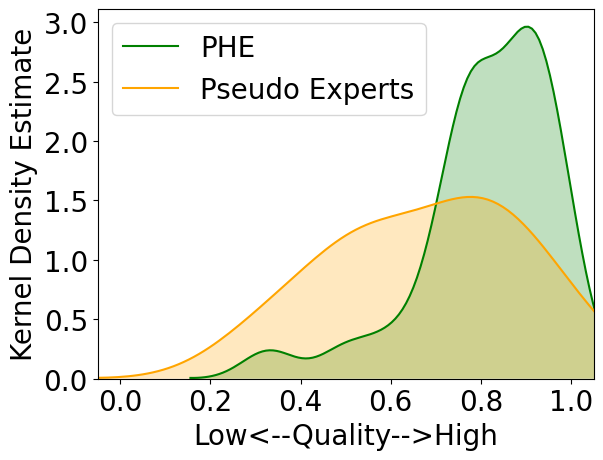

In [89]:
sns.distplot(phe_urls_pol['pol_gen'], label='PHE', kde=True, hist=False,color='green',kde_kws={'shade': True,'clip': (0, 1)})
sns.distplot(pseudo_urls_pol['pol_gen'], label='Pseudo Experts', kde=True,hist=False, color='orange',kde_kws={'shade': True,'clip': (0, 1)})
plt.ylabel('Kernel Density Estimate',fontsize=20)
plt.xlabel('Low<--Quality-->High',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-0.05, 1.05])
plt.legend(fontsize=20)
#plt.savefig('phe_pseudo_ideo.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Hashtags and URLs

In [106]:
import ast

In [107]:
def convert(x):
    try:
        return ast.literal_eval(x)
    except:
        return None

In [108]:
phe_aff['hashtag']=phe_aff['hashtag'].progress_apply(convert)
pseudo_aff['hashtag']=pseudo_aff['hashtag'].progress_apply(convert)

100%|██████████| 51568/51568 [00:00<00:00, 96573.40it/s]
<ipython-input-108-640b64e0b892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_aff['hashtag']=pseudo_aff['hashtag'].progress_apply(convert)


In [100]:
import re
import geonamescache

gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
cities= gc.get_cities()
# print countries dictionary
names=[countries[x]['name'].lower() for x in countries]
names1=[cities[x]['name'].lower() for x in cities]
names.extend(names1)
irrelevant_chars="~?!./\:;+=&^%$@(,)[]_*"
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

from string import digits
def deep_clean(x):
    x=x.lower()
    x=re.sub(r'http\S+', '', x)
    remove_digits = str.maketrans(' ', ' ', digits)
    remove_chars = str.maketrans(' ', ' ', irrelevant_chars)
    x = x.translate(remove_digits)
    x = x.translate(remove_chars)
    x = emoji_pattern.sub(r'', x)
    if x not in names:
        return x
    return None

In [101]:
common=['breaking','rt','covid','corona','coronavirus','ncov','covidー']

In [102]:
phe_hashtags=phe_aff['hashtag'].tolist()
phe_hashtags=[b for b in phe_hashtags if b!=None]
phe_hashtags=[deep_clean(b.lower()) for a in phe_hashtags for b in a]
phe_hashtags=[lemmatize(x) for x in phe_hashtags if x!=None and x not in common and len(x)>3]

pseudo_hashtags=pseudo_aff['hashtag'].tolist()
pseudo_hashtags=[b for b in pseudo_hashtags if b!=None]
pseudo_hashtags=[deep_clean(b.lower()) for a in pseudo_hashtags for b in a]
pseudo_hashtags=[lemmatize(x) for x in pseudo_hashtags if x!=None and x not in common and len(x)>3]

In [103]:
from collections import Counter

In [104]:
phe_hashtags=dict(Counter(phe_hashtags).most_common())
pseudo_hashtags=dict(Counter(pseudo_hashtags).most_common())

In [195]:
s=np.sum(list(phe_hashtags.values()))
for h in phe_hashtags:
    phe_hashtags[h]=phe_hashtags[h]/s

In [196]:
s=np.sum(list(pseudo_hashtags.values()))
for h in pseudo_hashtags:
    pseudo_hashtags[h]=pseudo_hashtags[h]/s

In [ ]:
log_odds={}
for h in phe_hashtags:
    if h in pseudo_hashtags:
        log_odds[h]=np.log10((phe_hashtags[h]+0.00001)/(pseudo_hashtags[h]+0.00001))
    else:
        log_odds[h]=np.log10((phe_hashtags[h]+0.00001)/0.000001)
for h in pseudo_hashtags:
    if h not in phe_hashtags:
        log_odds[h]=np.log10(0.00001/(pseudo_hashtags[h]+0.00001))

In [198]:
top_phe=dict(Counter(phe_hashtags).most_common()[:100])

In [199]:
top_pseudo=dict(Counter(pseudo_hashtags).most_common()[:100])

In [201]:
top_pseudo

{'vaccine': 0.07691454555537071,
 'informedconsent': 0.029889646758720124,
 'learntherisk': 0.029279653967725836,
 'medtwitter': 0.02051793933344424,
 'thedefender': 0.018965230410913327,
 'wsjwhatsnow': 0.01780069871901514,
 'study': 0.01719070592802085,
 'vaccinefreedom': 0.01425164975323019,
 'nvic': 0.013198025841512782,
 'autism': 0.012698940830699274,
 'measle': 0.012310763600066544,
 'pandemic': 0.012144401929795375,
 'sarscov': 0.012033494149614596,
 'vaccination': 0.011201685798258748,
 'lockdown': 0.009205345755004713,
 'vaccineinjury': 0.008262629623468087,
 'wakeup': 0.008262629623468087,
 'billgatesbioterrorist': 0.008040814063106527,
 'screenbvaccine': 0.007985360173016137,
 'fauci': 0.007375367382021849,
 'fauciliedpeopledie': 0.007319913491931459,
 'wakeupamerica': 0.007264459601841069,
 'covidfoam': 0.00704264404147951,
 'hydroxychloroquine': 0.006377197360394831,
 'pulmcc': 0.006210835690123662,
 'covidvaccine': 0.006099927909942882,
 'tipsfornewdocs': 0.0060999279099

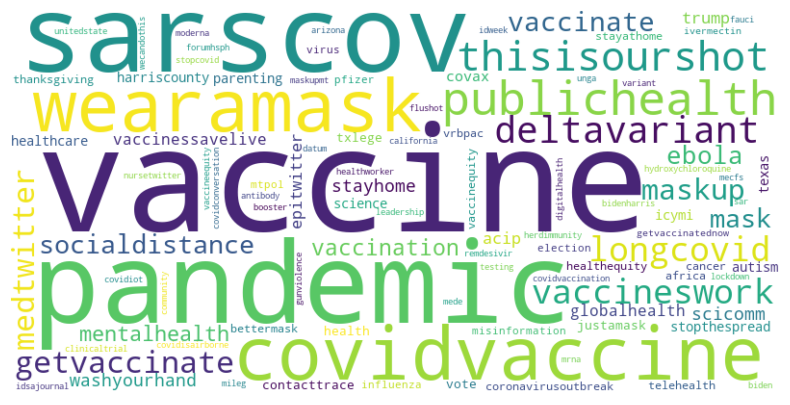

In [211]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_phe)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('phe_hashtags.pdf',dpi=300,bbox_inches='tight')
plt.show()

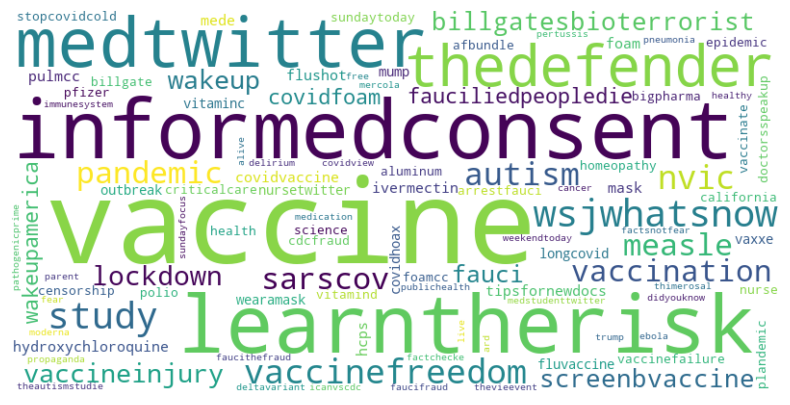

In [212]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_pseudo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('pseudo_hashtags.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [254]:
tmp

issue emotion    str_date     value  group group_issue
3260   Vaccines   anger  2020-01-22  0.000000      0   Vaccines0
3261   Vaccines   anger  2020-01-23  0.000000      0   Vaccines0
3262   Vaccines   anger  2020-01-24  0.062500      0   Vaccines0
3263   Vaccines   anger  2020-01-25  0.000000      0   Vaccines0
3264   Vaccines   anger  2020-01-26  0.043478      0   Vaccines0
...         ...     ...         ...       ...    ...         ...
77131   Origins   anger  2021-10-31  0.000000      1    Origins1
77132   Origins   anger  2021-11-01  0.500000      1    Origins1
77133   Origins   anger  2021-11-02  1.000000      1    Origins1
77134   Origins   anger  2021-11-03  0.200000      1    Origins1
77135   Origins   anger  2021-11-04  0.166667      1    Origins1

[8763 rows x 6 columns]